In [1]:
import pandas as pd
import glob
import os
import re
import seaborn as sns
from datetime import datetime, timedelta
from haversine import haversine, Unit
import metpy
from matplotlib.colors import TwoSlopeNorm, Normalize
import metpy.constants as mpconst
import metpy.units as units
from matplotlib.patches import Rectangle
from scipy.interpolate import interp1d
from scipy.optimize import bisect
import numpy as np
import pickle
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import pint
import xarray as xr
import netCDF4 as nc
import re
import matplotlib.pyplot as plt
from numpy import load
from numpy import asarray
from numpy import save
import pytz
from scipy import stats
from sklearn.linear_model import LinearRegression
from collections import Counter
import pymannkendall as mk
from pydoc import help
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [11]:
with open('soundings_fig2&3.pdkl', 'rb') as file:
    
    soundings = pickle.load(file)

In [3]:
sgp = (36.607322, -97.487643)

path = "../../data/rong3/annie"

# Create a list of file names using list comprehension and year ranges
file_paths = [
    
    os.path.join(path, f"ERA5-sgp-mfc-{start}-{end}.nc")
    
    for start, end in [(2001, 2003), (2004, 2006), (2007, 2009), (2010, 2012), (2013, 2015), (2016, 2018)]
]

# Use open_mfdataset to load all datasets into a single xarray.Dataset
quv = xr.open_mfdataset(file_paths, combine='by_coords')

In [4]:
lon = quv['longitude'].data[2]

lat = quv['latitude'].data[1]

# Get all time points
all_times = quv['time'].data

# Initialize a list to store the data
data_list = []

# Loop over all time points
for time in all_times:
    
    print(time)
    
    # Select the u and v values for the given time, latitude, and longitude
    u_values = quv['u'].sel(time=time, latitude=lat, longitude=lon).values
    
    v_values = quv['v'].sel(time=time, latitude=lat, longitude=lon).values
    
    q_values = quv['q'].sel(time=time, latitude=lat, longitude=lon).values
    
    # Append the data as a dictionary to the list
    data_list.append({
        
        'time': time,
        
        'latitude': lat,
        
        'longitude': lon,
        
        'u_profiles': u_values,
        
        'v_profiles': v_values, 
        
        'q_profiles': q_values
    })

# Create a DataFrame from the list of dictionaries
quvdf = pd.DataFrame(data_list)

2001-01-01T00:00:00.000000000
2001-01-01T03:00:00.000000000
2001-01-01T06:00:00.000000000
2001-01-01T09:00:00.000000000
2001-01-01T12:00:00.000000000
2001-01-01T15:00:00.000000000
2001-01-01T18:00:00.000000000
2001-01-01T21:00:00.000000000
2001-01-02T00:00:00.000000000
2001-01-02T03:00:00.000000000
2001-01-02T06:00:00.000000000
2001-01-02T09:00:00.000000000
2001-01-02T12:00:00.000000000
2001-01-02T15:00:00.000000000
2001-01-02T18:00:00.000000000
2001-01-02T21:00:00.000000000
2001-01-03T00:00:00.000000000
2001-01-03T03:00:00.000000000
2001-01-03T06:00:00.000000000
2001-01-03T09:00:00.000000000
2001-01-03T12:00:00.000000000
2001-01-03T15:00:00.000000000
2001-01-03T18:00:00.000000000
2001-01-03T21:00:00.000000000
2001-01-04T00:00:00.000000000
2001-01-04T03:00:00.000000000
2001-01-04T06:00:00.000000000
2001-01-04T09:00:00.000000000
2001-01-04T12:00:00.000000000
2001-01-04T15:00:00.000000000
2001-01-04T18:00:00.000000000
2001-01-04T21:00:00.000000000
2001-01-05T00:00:00.000000000
2001-01-05

2001-02-08T06:00:00.000000000
2001-02-08T09:00:00.000000000
2001-02-08T12:00:00.000000000
2001-02-08T15:00:00.000000000
2001-02-08T18:00:00.000000000
2001-02-08T21:00:00.000000000
2001-02-09T00:00:00.000000000
2001-02-09T03:00:00.000000000
2001-02-09T06:00:00.000000000
2001-02-09T09:00:00.000000000
2001-02-09T12:00:00.000000000
2001-02-09T15:00:00.000000000
2001-02-09T18:00:00.000000000
2001-02-09T21:00:00.000000000
2001-02-10T00:00:00.000000000
2001-02-10T03:00:00.000000000
2001-02-10T06:00:00.000000000
2001-02-10T09:00:00.000000000
2001-02-10T12:00:00.000000000
2001-02-10T15:00:00.000000000
2001-02-10T18:00:00.000000000
2001-02-10T21:00:00.000000000
2001-02-11T00:00:00.000000000
2001-02-11T03:00:00.000000000
2001-02-11T06:00:00.000000000
2001-02-11T09:00:00.000000000
2001-02-11T12:00:00.000000000
2001-02-11T15:00:00.000000000
2001-02-11T18:00:00.000000000
2001-02-11T21:00:00.000000000
2001-02-12T00:00:00.000000000
2001-02-12T03:00:00.000000000
2001-02-12T06:00:00.000000000
2001-02-12

2001-03-18T06:00:00.000000000
2001-03-18T09:00:00.000000000
2001-03-18T12:00:00.000000000
2001-03-18T15:00:00.000000000
2001-03-18T18:00:00.000000000
2001-03-18T21:00:00.000000000
2001-03-19T00:00:00.000000000
2001-03-19T03:00:00.000000000
2001-03-19T06:00:00.000000000
2001-03-19T09:00:00.000000000
2001-03-19T12:00:00.000000000
2001-03-19T15:00:00.000000000
2001-03-19T18:00:00.000000000
2001-03-19T21:00:00.000000000
2001-03-20T00:00:00.000000000
2001-03-20T03:00:00.000000000
2001-03-20T06:00:00.000000000
2001-03-20T09:00:00.000000000
2001-03-20T12:00:00.000000000
2001-03-20T15:00:00.000000000
2001-03-20T18:00:00.000000000
2001-03-20T21:00:00.000000000
2001-03-21T00:00:00.000000000
2001-03-21T03:00:00.000000000
2001-03-21T06:00:00.000000000
2001-03-21T09:00:00.000000000
2001-03-21T12:00:00.000000000
2001-03-21T15:00:00.000000000
2001-03-21T18:00:00.000000000
2001-03-21T21:00:00.000000000
2001-03-22T00:00:00.000000000
2001-03-22T03:00:00.000000000
2001-03-22T06:00:00.000000000
2001-03-22

2001-04-22T03:00:00.000000000
2001-04-22T06:00:00.000000000
2001-04-22T09:00:00.000000000
2001-04-22T12:00:00.000000000
2001-04-22T15:00:00.000000000
2001-04-22T18:00:00.000000000
2001-04-22T21:00:00.000000000
2001-04-23T00:00:00.000000000
2001-04-23T03:00:00.000000000
2001-04-23T06:00:00.000000000
2001-04-23T09:00:00.000000000
2001-04-23T12:00:00.000000000
2001-04-23T15:00:00.000000000
2001-04-23T18:00:00.000000000
2001-04-23T21:00:00.000000000
2001-04-24T00:00:00.000000000
2001-04-24T03:00:00.000000000
2001-04-24T06:00:00.000000000
2001-04-24T09:00:00.000000000
2001-04-24T12:00:00.000000000
2001-04-24T15:00:00.000000000
2001-04-24T18:00:00.000000000
2001-04-24T21:00:00.000000000
2001-04-25T00:00:00.000000000
2001-04-25T03:00:00.000000000
2001-04-25T06:00:00.000000000
2001-04-25T09:00:00.000000000
2001-04-25T12:00:00.000000000
2001-04-25T15:00:00.000000000
2001-04-25T18:00:00.000000000
2001-04-25T21:00:00.000000000
2001-04-26T00:00:00.000000000
2001-04-26T03:00:00.000000000
2001-04-26

2001-05-26T12:00:00.000000000
2001-05-26T15:00:00.000000000
2001-05-26T18:00:00.000000000
2001-05-26T21:00:00.000000000
2001-05-27T00:00:00.000000000
2001-05-27T03:00:00.000000000
2001-05-27T06:00:00.000000000
2001-05-27T09:00:00.000000000
2001-05-27T12:00:00.000000000
2001-05-27T15:00:00.000000000
2001-05-27T18:00:00.000000000
2001-05-27T21:00:00.000000000
2001-05-28T00:00:00.000000000
2001-05-28T03:00:00.000000000
2001-05-28T06:00:00.000000000
2001-05-28T09:00:00.000000000
2001-05-28T12:00:00.000000000
2001-05-28T15:00:00.000000000
2001-05-28T18:00:00.000000000
2001-05-28T21:00:00.000000000
2001-05-29T00:00:00.000000000
2001-05-29T03:00:00.000000000
2001-05-29T06:00:00.000000000
2001-05-29T09:00:00.000000000
2001-05-29T12:00:00.000000000
2001-05-29T15:00:00.000000000
2001-05-29T18:00:00.000000000
2001-05-29T21:00:00.000000000
2001-05-30T00:00:00.000000000
2001-05-30T03:00:00.000000000
2001-05-30T06:00:00.000000000
2001-05-30T09:00:00.000000000
2001-05-30T12:00:00.000000000
2001-05-30

2001-06-30T12:00:00.000000000
2001-06-30T15:00:00.000000000
2001-06-30T18:00:00.000000000
2001-06-30T21:00:00.000000000
2001-07-01T00:00:00.000000000
2001-07-01T03:00:00.000000000
2001-07-01T06:00:00.000000000
2001-07-01T09:00:00.000000000
2001-07-01T12:00:00.000000000
2001-07-01T15:00:00.000000000
2001-07-01T18:00:00.000000000
2001-07-01T21:00:00.000000000
2001-07-02T00:00:00.000000000
2001-07-02T03:00:00.000000000
2001-07-02T06:00:00.000000000
2001-07-02T09:00:00.000000000
2001-07-02T12:00:00.000000000
2001-07-02T15:00:00.000000000
2001-07-02T18:00:00.000000000
2001-07-02T21:00:00.000000000
2001-07-03T00:00:00.000000000
2001-07-03T03:00:00.000000000
2001-07-03T06:00:00.000000000
2001-07-03T09:00:00.000000000
2001-07-03T12:00:00.000000000
2001-07-03T15:00:00.000000000
2001-07-03T18:00:00.000000000
2001-07-03T21:00:00.000000000
2001-07-04T00:00:00.000000000
2001-07-04T03:00:00.000000000
2001-07-04T06:00:00.000000000
2001-07-04T09:00:00.000000000
2001-07-04T12:00:00.000000000
2001-07-04

2001-08-04T12:00:00.000000000
2001-08-04T15:00:00.000000000
2001-08-04T18:00:00.000000000
2001-08-04T21:00:00.000000000
2001-08-05T00:00:00.000000000
2001-08-05T03:00:00.000000000
2001-08-05T06:00:00.000000000
2001-08-05T09:00:00.000000000
2001-08-05T12:00:00.000000000
2001-08-05T15:00:00.000000000
2001-08-05T18:00:00.000000000
2001-08-05T21:00:00.000000000
2001-08-06T00:00:00.000000000
2001-08-06T03:00:00.000000000
2001-08-06T06:00:00.000000000
2001-08-06T09:00:00.000000000
2001-08-06T12:00:00.000000000
2001-08-06T15:00:00.000000000
2001-08-06T18:00:00.000000000
2001-08-06T21:00:00.000000000
2001-08-07T00:00:00.000000000
2001-08-07T03:00:00.000000000
2001-08-07T06:00:00.000000000
2001-08-07T09:00:00.000000000
2001-08-07T12:00:00.000000000
2001-08-07T15:00:00.000000000
2001-08-07T18:00:00.000000000
2001-08-07T21:00:00.000000000
2001-08-08T00:00:00.000000000
2001-08-08T03:00:00.000000000
2001-08-08T06:00:00.000000000
2001-08-08T09:00:00.000000000
2001-08-08T12:00:00.000000000
2001-08-08

2001-09-08T12:00:00.000000000
2001-09-08T15:00:00.000000000
2001-09-08T18:00:00.000000000
2001-09-08T21:00:00.000000000
2001-09-09T00:00:00.000000000
2001-09-09T03:00:00.000000000
2001-09-09T06:00:00.000000000
2001-09-09T09:00:00.000000000
2001-09-09T12:00:00.000000000
2001-09-09T15:00:00.000000000
2001-09-09T18:00:00.000000000
2001-09-09T21:00:00.000000000
2001-09-10T00:00:00.000000000
2001-09-10T03:00:00.000000000
2001-09-10T06:00:00.000000000
2001-09-10T09:00:00.000000000
2001-09-10T12:00:00.000000000
2001-09-10T15:00:00.000000000
2001-09-10T18:00:00.000000000
2001-09-10T21:00:00.000000000
2001-09-11T00:00:00.000000000
2001-09-11T03:00:00.000000000
2001-09-11T06:00:00.000000000
2001-09-11T09:00:00.000000000
2001-09-11T12:00:00.000000000
2001-09-11T15:00:00.000000000
2001-09-11T18:00:00.000000000
2001-09-11T21:00:00.000000000
2001-09-12T00:00:00.000000000
2001-09-12T03:00:00.000000000
2001-09-12T06:00:00.000000000
2001-09-12T09:00:00.000000000
2001-09-12T12:00:00.000000000
2001-09-12

2001-10-13T03:00:00.000000000
2001-10-13T06:00:00.000000000
2001-10-13T09:00:00.000000000
2001-10-13T12:00:00.000000000
2001-10-13T15:00:00.000000000
2001-10-13T18:00:00.000000000
2001-10-13T21:00:00.000000000
2001-10-14T00:00:00.000000000
2001-10-14T03:00:00.000000000
2001-10-14T06:00:00.000000000
2001-10-14T09:00:00.000000000
2001-10-14T12:00:00.000000000
2001-10-14T15:00:00.000000000
2001-10-14T18:00:00.000000000
2001-10-14T21:00:00.000000000
2001-10-15T00:00:00.000000000
2001-10-15T03:00:00.000000000
2001-10-15T06:00:00.000000000
2001-10-15T09:00:00.000000000
2001-10-15T12:00:00.000000000
2001-10-15T15:00:00.000000000
2001-10-15T18:00:00.000000000
2001-10-15T21:00:00.000000000
2001-10-16T00:00:00.000000000
2001-10-16T03:00:00.000000000
2001-10-16T06:00:00.000000000
2001-10-16T09:00:00.000000000
2001-10-16T12:00:00.000000000
2001-10-16T15:00:00.000000000
2001-10-16T18:00:00.000000000
2001-10-16T21:00:00.000000000
2001-10-17T00:00:00.000000000
2001-10-17T03:00:00.000000000
2001-10-17

2001-11-16T09:00:00.000000000
2001-11-16T12:00:00.000000000
2001-11-16T15:00:00.000000000
2001-11-16T18:00:00.000000000
2001-11-16T21:00:00.000000000
2001-11-17T00:00:00.000000000
2001-11-17T03:00:00.000000000
2001-11-17T06:00:00.000000000
2001-11-17T09:00:00.000000000
2001-11-17T12:00:00.000000000
2001-11-17T15:00:00.000000000
2001-11-17T18:00:00.000000000
2001-11-17T21:00:00.000000000
2001-11-18T00:00:00.000000000
2001-11-18T03:00:00.000000000
2001-11-18T06:00:00.000000000
2001-11-18T09:00:00.000000000
2001-11-18T12:00:00.000000000
2001-11-18T15:00:00.000000000
2001-11-18T18:00:00.000000000
2001-11-18T21:00:00.000000000
2001-11-19T00:00:00.000000000
2001-11-19T03:00:00.000000000
2001-11-19T06:00:00.000000000
2001-11-19T09:00:00.000000000
2001-11-19T12:00:00.000000000
2001-11-19T15:00:00.000000000
2001-11-19T18:00:00.000000000
2001-11-19T21:00:00.000000000
2001-11-20T00:00:00.000000000
2001-11-20T03:00:00.000000000
2001-11-20T06:00:00.000000000
2001-11-20T09:00:00.000000000
2001-11-20

2001-12-24T12:00:00.000000000
2001-12-24T15:00:00.000000000
2001-12-24T18:00:00.000000000
2001-12-24T21:00:00.000000000
2001-12-25T00:00:00.000000000
2001-12-25T03:00:00.000000000
2001-12-25T06:00:00.000000000
2001-12-25T09:00:00.000000000
2001-12-25T12:00:00.000000000
2001-12-25T15:00:00.000000000
2001-12-25T18:00:00.000000000
2001-12-25T21:00:00.000000000
2001-12-26T00:00:00.000000000
2001-12-26T03:00:00.000000000
2001-12-26T06:00:00.000000000
2001-12-26T09:00:00.000000000
2001-12-26T12:00:00.000000000
2001-12-26T15:00:00.000000000
2001-12-26T18:00:00.000000000
2001-12-26T21:00:00.000000000
2001-12-27T00:00:00.000000000
2001-12-27T03:00:00.000000000
2001-12-27T06:00:00.000000000
2001-12-27T09:00:00.000000000
2001-12-27T12:00:00.000000000
2001-12-27T15:00:00.000000000
2001-12-27T18:00:00.000000000
2001-12-27T21:00:00.000000000
2001-12-28T00:00:00.000000000
2001-12-28T03:00:00.000000000
2001-12-28T06:00:00.000000000
2001-12-28T09:00:00.000000000
2001-12-28T12:00:00.000000000
2001-12-28

2002-01-31T18:00:00.000000000
2002-01-31T21:00:00.000000000
2002-02-01T00:00:00.000000000
2002-02-01T03:00:00.000000000
2002-02-01T06:00:00.000000000
2002-02-01T09:00:00.000000000
2002-02-01T12:00:00.000000000
2002-02-01T15:00:00.000000000
2002-02-01T18:00:00.000000000
2002-02-01T21:00:00.000000000
2002-02-02T00:00:00.000000000
2002-02-02T03:00:00.000000000
2002-02-02T06:00:00.000000000
2002-02-02T09:00:00.000000000
2002-02-02T12:00:00.000000000
2002-02-02T15:00:00.000000000
2002-02-02T18:00:00.000000000
2002-02-02T21:00:00.000000000
2002-02-03T00:00:00.000000000
2002-02-03T03:00:00.000000000
2002-02-03T06:00:00.000000000
2002-02-03T09:00:00.000000000
2002-02-03T12:00:00.000000000
2002-02-03T15:00:00.000000000
2002-02-03T18:00:00.000000000
2002-02-03T21:00:00.000000000
2002-02-04T00:00:00.000000000
2002-02-04T03:00:00.000000000
2002-02-04T06:00:00.000000000
2002-02-04T09:00:00.000000000
2002-02-04T12:00:00.000000000
2002-02-04T15:00:00.000000000
2002-02-04T18:00:00.000000000
2002-02-04

2002-03-10T21:00:00.000000000
2002-03-11T00:00:00.000000000
2002-03-11T03:00:00.000000000
2002-03-11T06:00:00.000000000
2002-03-11T09:00:00.000000000
2002-03-11T12:00:00.000000000
2002-03-11T15:00:00.000000000
2002-03-11T18:00:00.000000000
2002-03-11T21:00:00.000000000
2002-03-12T00:00:00.000000000
2002-03-12T03:00:00.000000000
2002-03-12T06:00:00.000000000
2002-03-12T09:00:00.000000000
2002-03-12T12:00:00.000000000
2002-03-12T15:00:00.000000000
2002-03-12T18:00:00.000000000
2002-03-12T21:00:00.000000000
2002-03-13T00:00:00.000000000
2002-03-13T03:00:00.000000000
2002-03-13T06:00:00.000000000
2002-03-13T09:00:00.000000000
2002-03-13T12:00:00.000000000
2002-03-13T15:00:00.000000000
2002-03-13T18:00:00.000000000
2002-03-13T21:00:00.000000000
2002-03-14T00:00:00.000000000
2002-03-14T03:00:00.000000000
2002-03-14T06:00:00.000000000
2002-03-14T09:00:00.000000000
2002-03-14T12:00:00.000000000
2002-03-14T15:00:00.000000000
2002-03-14T18:00:00.000000000
2002-03-14T21:00:00.000000000
2002-03-15

2002-04-17T12:00:00.000000000
2002-04-17T15:00:00.000000000
2002-04-17T18:00:00.000000000
2002-04-17T21:00:00.000000000
2002-04-18T00:00:00.000000000
2002-04-18T03:00:00.000000000
2002-04-18T06:00:00.000000000
2002-04-18T09:00:00.000000000
2002-04-18T12:00:00.000000000
2002-04-18T15:00:00.000000000
2002-04-18T18:00:00.000000000
2002-04-18T21:00:00.000000000
2002-04-19T00:00:00.000000000
2002-04-19T03:00:00.000000000
2002-04-19T06:00:00.000000000
2002-04-19T09:00:00.000000000
2002-04-19T12:00:00.000000000
2002-04-19T15:00:00.000000000
2002-04-19T18:00:00.000000000
2002-04-19T21:00:00.000000000
2002-04-20T00:00:00.000000000
2002-04-20T03:00:00.000000000
2002-04-20T06:00:00.000000000
2002-04-20T09:00:00.000000000
2002-04-20T12:00:00.000000000
2002-04-20T15:00:00.000000000
2002-04-20T18:00:00.000000000
2002-04-20T21:00:00.000000000
2002-04-21T00:00:00.000000000
2002-04-21T03:00:00.000000000
2002-04-21T06:00:00.000000000
2002-04-21T09:00:00.000000000
2002-04-21T12:00:00.000000000
2002-04-21

2002-05-25T18:00:00.000000000
2002-05-25T21:00:00.000000000
2002-05-26T00:00:00.000000000
2002-05-26T03:00:00.000000000
2002-05-26T06:00:00.000000000
2002-05-26T09:00:00.000000000
2002-05-26T12:00:00.000000000
2002-05-26T15:00:00.000000000
2002-05-26T18:00:00.000000000
2002-05-26T21:00:00.000000000
2002-05-27T00:00:00.000000000
2002-05-27T03:00:00.000000000
2002-05-27T06:00:00.000000000
2002-05-27T09:00:00.000000000
2002-05-27T12:00:00.000000000
2002-05-27T15:00:00.000000000
2002-05-27T18:00:00.000000000
2002-05-27T21:00:00.000000000
2002-05-28T00:00:00.000000000
2002-05-28T03:00:00.000000000
2002-05-28T06:00:00.000000000
2002-05-28T09:00:00.000000000
2002-05-28T12:00:00.000000000
2002-05-28T15:00:00.000000000
2002-05-28T18:00:00.000000000
2002-05-28T21:00:00.000000000
2002-05-29T00:00:00.000000000
2002-05-29T03:00:00.000000000
2002-05-29T06:00:00.000000000
2002-05-29T09:00:00.000000000
2002-05-29T12:00:00.000000000
2002-05-29T15:00:00.000000000
2002-05-29T18:00:00.000000000
2002-05-29

2002-06-29T00:00:00.000000000
2002-06-29T03:00:00.000000000
2002-06-29T06:00:00.000000000
2002-06-29T09:00:00.000000000
2002-06-29T12:00:00.000000000
2002-06-29T15:00:00.000000000
2002-06-29T18:00:00.000000000
2002-06-29T21:00:00.000000000
2002-06-30T00:00:00.000000000
2002-06-30T03:00:00.000000000
2002-06-30T06:00:00.000000000
2002-06-30T09:00:00.000000000
2002-06-30T12:00:00.000000000
2002-06-30T15:00:00.000000000
2002-06-30T18:00:00.000000000
2002-06-30T21:00:00.000000000
2002-07-01T00:00:00.000000000
2002-07-01T03:00:00.000000000
2002-07-01T06:00:00.000000000
2002-07-01T09:00:00.000000000
2002-07-01T12:00:00.000000000
2002-07-01T15:00:00.000000000
2002-07-01T18:00:00.000000000
2002-07-01T21:00:00.000000000
2002-07-02T00:00:00.000000000
2002-07-02T03:00:00.000000000
2002-07-02T06:00:00.000000000
2002-07-02T09:00:00.000000000
2002-07-02T12:00:00.000000000
2002-07-02T15:00:00.000000000
2002-07-02T18:00:00.000000000
2002-07-02T21:00:00.000000000
2002-07-03T00:00:00.000000000
2002-07-03

2002-08-06T09:00:00.000000000
2002-08-06T12:00:00.000000000
2002-08-06T15:00:00.000000000
2002-08-06T18:00:00.000000000
2002-08-06T21:00:00.000000000
2002-08-07T00:00:00.000000000
2002-08-07T03:00:00.000000000
2002-08-07T06:00:00.000000000
2002-08-07T09:00:00.000000000
2002-08-07T12:00:00.000000000
2002-08-07T15:00:00.000000000
2002-08-07T18:00:00.000000000
2002-08-07T21:00:00.000000000
2002-08-08T00:00:00.000000000
2002-08-08T03:00:00.000000000
2002-08-08T06:00:00.000000000
2002-08-08T09:00:00.000000000
2002-08-08T12:00:00.000000000
2002-08-08T15:00:00.000000000
2002-08-08T18:00:00.000000000
2002-08-08T21:00:00.000000000
2002-08-09T00:00:00.000000000
2002-08-09T03:00:00.000000000
2002-08-09T06:00:00.000000000
2002-08-09T09:00:00.000000000
2002-08-09T12:00:00.000000000
2002-08-09T15:00:00.000000000
2002-08-09T18:00:00.000000000
2002-08-09T21:00:00.000000000
2002-08-10T00:00:00.000000000
2002-08-10T03:00:00.000000000
2002-08-10T06:00:00.000000000
2002-08-10T09:00:00.000000000
2002-08-10

2002-09-13T15:00:00.000000000
2002-09-13T18:00:00.000000000
2002-09-13T21:00:00.000000000
2002-09-14T00:00:00.000000000
2002-09-14T03:00:00.000000000
2002-09-14T06:00:00.000000000
2002-09-14T09:00:00.000000000
2002-09-14T12:00:00.000000000
2002-09-14T15:00:00.000000000
2002-09-14T18:00:00.000000000
2002-09-14T21:00:00.000000000
2002-09-15T00:00:00.000000000
2002-09-15T03:00:00.000000000
2002-09-15T06:00:00.000000000
2002-09-15T09:00:00.000000000
2002-09-15T12:00:00.000000000
2002-09-15T15:00:00.000000000
2002-09-15T18:00:00.000000000
2002-09-15T21:00:00.000000000
2002-09-16T00:00:00.000000000
2002-09-16T03:00:00.000000000
2002-09-16T06:00:00.000000000
2002-09-16T09:00:00.000000000
2002-09-16T12:00:00.000000000
2002-09-16T15:00:00.000000000
2002-09-16T18:00:00.000000000
2002-09-16T21:00:00.000000000
2002-09-17T00:00:00.000000000
2002-09-17T03:00:00.000000000
2002-09-17T06:00:00.000000000
2002-09-17T09:00:00.000000000
2002-09-17T12:00:00.000000000
2002-09-17T15:00:00.000000000
2002-09-17

2002-10-18T15:00:00.000000000
2002-10-18T18:00:00.000000000
2002-10-18T21:00:00.000000000
2002-10-19T00:00:00.000000000
2002-10-19T03:00:00.000000000
2002-10-19T06:00:00.000000000
2002-10-19T09:00:00.000000000
2002-10-19T12:00:00.000000000
2002-10-19T15:00:00.000000000
2002-10-19T18:00:00.000000000
2002-10-19T21:00:00.000000000
2002-10-20T00:00:00.000000000
2002-10-20T03:00:00.000000000
2002-10-20T06:00:00.000000000
2002-10-20T09:00:00.000000000
2002-10-20T12:00:00.000000000
2002-10-20T15:00:00.000000000
2002-10-20T18:00:00.000000000
2002-10-20T21:00:00.000000000
2002-10-21T00:00:00.000000000
2002-10-21T03:00:00.000000000
2002-10-21T06:00:00.000000000
2002-10-21T09:00:00.000000000
2002-10-21T12:00:00.000000000
2002-10-21T15:00:00.000000000
2002-10-21T18:00:00.000000000
2002-10-21T21:00:00.000000000
2002-10-22T00:00:00.000000000
2002-10-22T03:00:00.000000000
2002-10-22T06:00:00.000000000
2002-10-22T09:00:00.000000000
2002-10-22T12:00:00.000000000
2002-10-22T15:00:00.000000000
2002-10-22

2002-11-25T21:00:00.000000000
2002-11-26T00:00:00.000000000
2002-11-26T03:00:00.000000000
2002-11-26T06:00:00.000000000
2002-11-26T09:00:00.000000000
2002-11-26T12:00:00.000000000
2002-11-26T15:00:00.000000000
2002-11-26T18:00:00.000000000
2002-11-26T21:00:00.000000000
2002-11-27T00:00:00.000000000
2002-11-27T03:00:00.000000000
2002-11-27T06:00:00.000000000
2002-11-27T09:00:00.000000000
2002-11-27T12:00:00.000000000
2002-11-27T15:00:00.000000000
2002-11-27T18:00:00.000000000
2002-11-27T21:00:00.000000000
2002-11-28T00:00:00.000000000
2002-11-28T03:00:00.000000000
2002-11-28T06:00:00.000000000
2002-11-28T09:00:00.000000000
2002-11-28T12:00:00.000000000
2002-11-28T15:00:00.000000000
2002-11-28T18:00:00.000000000
2002-11-28T21:00:00.000000000
2002-11-29T00:00:00.000000000
2002-11-29T03:00:00.000000000
2002-11-29T06:00:00.000000000
2002-11-29T09:00:00.000000000
2002-11-29T12:00:00.000000000
2002-11-29T15:00:00.000000000
2002-11-29T18:00:00.000000000
2002-11-29T21:00:00.000000000
2002-11-30

2002-12-30T03:00:00.000000000
2002-12-30T06:00:00.000000000
2002-12-30T09:00:00.000000000
2002-12-30T12:00:00.000000000
2002-12-30T15:00:00.000000000
2002-12-30T18:00:00.000000000
2002-12-30T21:00:00.000000000
2002-12-31T00:00:00.000000000
2002-12-31T03:00:00.000000000
2002-12-31T06:00:00.000000000
2002-12-31T09:00:00.000000000
2002-12-31T12:00:00.000000000
2002-12-31T15:00:00.000000000
2002-12-31T18:00:00.000000000
2002-12-31T21:00:00.000000000
2003-01-01T00:00:00.000000000
2003-01-01T03:00:00.000000000
2003-01-01T06:00:00.000000000
2003-01-01T09:00:00.000000000
2003-01-01T12:00:00.000000000
2003-01-01T15:00:00.000000000
2003-01-01T18:00:00.000000000
2003-01-01T21:00:00.000000000
2003-01-02T00:00:00.000000000
2003-01-02T03:00:00.000000000
2003-01-02T06:00:00.000000000
2003-01-02T09:00:00.000000000
2003-01-02T12:00:00.000000000
2003-01-02T15:00:00.000000000
2003-01-02T18:00:00.000000000
2003-01-02T21:00:00.000000000
2003-01-03T00:00:00.000000000
2003-01-03T03:00:00.000000000
2003-01-03

2003-02-03T03:00:00.000000000
2003-02-03T06:00:00.000000000
2003-02-03T09:00:00.000000000
2003-02-03T12:00:00.000000000
2003-02-03T15:00:00.000000000
2003-02-03T18:00:00.000000000
2003-02-03T21:00:00.000000000
2003-02-04T00:00:00.000000000
2003-02-04T03:00:00.000000000
2003-02-04T06:00:00.000000000
2003-02-04T09:00:00.000000000
2003-02-04T12:00:00.000000000
2003-02-04T15:00:00.000000000
2003-02-04T18:00:00.000000000
2003-02-04T21:00:00.000000000
2003-02-05T00:00:00.000000000
2003-02-05T03:00:00.000000000
2003-02-05T06:00:00.000000000
2003-02-05T09:00:00.000000000
2003-02-05T12:00:00.000000000
2003-02-05T15:00:00.000000000
2003-02-05T18:00:00.000000000
2003-02-05T21:00:00.000000000
2003-02-06T00:00:00.000000000
2003-02-06T03:00:00.000000000
2003-02-06T06:00:00.000000000
2003-02-06T09:00:00.000000000
2003-02-06T12:00:00.000000000
2003-02-06T15:00:00.000000000
2003-02-06T18:00:00.000000000
2003-02-06T21:00:00.000000000
2003-02-07T00:00:00.000000000
2003-02-07T03:00:00.000000000
2003-02-07

2003-03-13T12:00:00.000000000
2003-03-13T15:00:00.000000000
2003-03-13T18:00:00.000000000
2003-03-13T21:00:00.000000000
2003-03-14T00:00:00.000000000
2003-03-14T03:00:00.000000000
2003-03-14T06:00:00.000000000
2003-03-14T09:00:00.000000000
2003-03-14T12:00:00.000000000
2003-03-14T15:00:00.000000000
2003-03-14T18:00:00.000000000
2003-03-14T21:00:00.000000000
2003-03-15T00:00:00.000000000
2003-03-15T03:00:00.000000000
2003-03-15T06:00:00.000000000
2003-03-15T09:00:00.000000000
2003-03-15T12:00:00.000000000
2003-03-15T15:00:00.000000000
2003-03-15T18:00:00.000000000
2003-03-15T21:00:00.000000000
2003-03-16T00:00:00.000000000
2003-03-16T03:00:00.000000000
2003-03-16T06:00:00.000000000
2003-03-16T09:00:00.000000000
2003-03-16T12:00:00.000000000
2003-03-16T15:00:00.000000000
2003-03-16T18:00:00.000000000
2003-03-16T21:00:00.000000000
2003-03-17T00:00:00.000000000
2003-03-17T03:00:00.000000000
2003-03-17T06:00:00.000000000
2003-03-17T09:00:00.000000000
2003-03-17T12:00:00.000000000
2003-03-17

2003-04-17T00:00:00.000000000
2003-04-17T03:00:00.000000000
2003-04-17T06:00:00.000000000
2003-04-17T09:00:00.000000000
2003-04-17T12:00:00.000000000
2003-04-17T15:00:00.000000000
2003-04-17T18:00:00.000000000
2003-04-17T21:00:00.000000000
2003-04-18T00:00:00.000000000
2003-04-18T03:00:00.000000000
2003-04-18T06:00:00.000000000
2003-04-18T09:00:00.000000000
2003-04-18T12:00:00.000000000
2003-04-18T15:00:00.000000000
2003-04-18T18:00:00.000000000
2003-04-18T21:00:00.000000000
2003-04-19T00:00:00.000000000
2003-04-19T03:00:00.000000000
2003-04-19T06:00:00.000000000
2003-04-19T09:00:00.000000000
2003-04-19T12:00:00.000000000
2003-04-19T15:00:00.000000000
2003-04-19T18:00:00.000000000
2003-04-19T21:00:00.000000000
2003-04-20T00:00:00.000000000
2003-04-20T03:00:00.000000000
2003-04-20T06:00:00.000000000
2003-04-20T09:00:00.000000000
2003-04-20T12:00:00.000000000
2003-04-20T15:00:00.000000000
2003-04-20T18:00:00.000000000
2003-04-20T21:00:00.000000000
2003-04-21T00:00:00.000000000
2003-04-21

2003-05-21T06:00:00.000000000
2003-05-21T09:00:00.000000000
2003-05-21T12:00:00.000000000
2003-05-21T15:00:00.000000000
2003-05-21T18:00:00.000000000
2003-05-21T21:00:00.000000000
2003-05-22T00:00:00.000000000
2003-05-22T03:00:00.000000000
2003-05-22T06:00:00.000000000
2003-05-22T09:00:00.000000000
2003-05-22T12:00:00.000000000
2003-05-22T15:00:00.000000000
2003-05-22T18:00:00.000000000
2003-05-22T21:00:00.000000000
2003-05-23T00:00:00.000000000
2003-05-23T03:00:00.000000000
2003-05-23T06:00:00.000000000
2003-05-23T09:00:00.000000000
2003-05-23T12:00:00.000000000
2003-05-23T15:00:00.000000000
2003-05-23T18:00:00.000000000
2003-05-23T21:00:00.000000000
2003-05-24T00:00:00.000000000
2003-05-24T03:00:00.000000000
2003-05-24T06:00:00.000000000
2003-05-24T09:00:00.000000000
2003-05-24T12:00:00.000000000
2003-05-24T15:00:00.000000000
2003-05-24T18:00:00.000000000
2003-05-24T21:00:00.000000000
2003-05-25T00:00:00.000000000
2003-05-25T03:00:00.000000000
2003-05-25T06:00:00.000000000
2003-05-25

2003-06-28T12:00:00.000000000
2003-06-28T15:00:00.000000000
2003-06-28T18:00:00.000000000
2003-06-28T21:00:00.000000000
2003-06-29T00:00:00.000000000
2003-06-29T03:00:00.000000000
2003-06-29T06:00:00.000000000
2003-06-29T09:00:00.000000000
2003-06-29T12:00:00.000000000
2003-06-29T15:00:00.000000000
2003-06-29T18:00:00.000000000
2003-06-29T21:00:00.000000000
2003-06-30T00:00:00.000000000
2003-06-30T03:00:00.000000000
2003-06-30T06:00:00.000000000
2003-06-30T09:00:00.000000000
2003-06-30T12:00:00.000000000
2003-06-30T15:00:00.000000000
2003-06-30T18:00:00.000000000
2003-06-30T21:00:00.000000000
2003-07-01T00:00:00.000000000
2003-07-01T03:00:00.000000000
2003-07-01T06:00:00.000000000
2003-07-01T09:00:00.000000000
2003-07-01T12:00:00.000000000
2003-07-01T15:00:00.000000000
2003-07-01T18:00:00.000000000
2003-07-01T21:00:00.000000000
2003-07-02T00:00:00.000000000
2003-07-02T03:00:00.000000000
2003-07-02T06:00:00.000000000
2003-07-02T09:00:00.000000000
2003-07-02T12:00:00.000000000
2003-07-02

2003-08-01T18:00:00.000000000
2003-08-01T21:00:00.000000000
2003-08-02T00:00:00.000000000
2003-08-02T03:00:00.000000000
2003-08-02T06:00:00.000000000
2003-08-02T09:00:00.000000000
2003-08-02T12:00:00.000000000
2003-08-02T15:00:00.000000000
2003-08-02T18:00:00.000000000
2003-08-02T21:00:00.000000000
2003-08-03T00:00:00.000000000
2003-08-03T03:00:00.000000000
2003-08-03T06:00:00.000000000
2003-08-03T09:00:00.000000000
2003-08-03T12:00:00.000000000
2003-08-03T15:00:00.000000000
2003-08-03T18:00:00.000000000
2003-08-03T21:00:00.000000000
2003-08-04T00:00:00.000000000
2003-08-04T03:00:00.000000000
2003-08-04T06:00:00.000000000
2003-08-04T09:00:00.000000000
2003-08-04T12:00:00.000000000
2003-08-04T15:00:00.000000000
2003-08-04T18:00:00.000000000
2003-08-04T21:00:00.000000000
2003-08-05T00:00:00.000000000
2003-08-05T03:00:00.000000000
2003-08-05T06:00:00.000000000
2003-08-05T09:00:00.000000000
2003-08-05T12:00:00.000000000
2003-08-05T15:00:00.000000000
2003-08-05T18:00:00.000000000
2003-08-05

2003-09-05T00:00:00.000000000
2003-09-05T03:00:00.000000000
2003-09-05T06:00:00.000000000
2003-09-05T09:00:00.000000000
2003-09-05T12:00:00.000000000
2003-09-05T15:00:00.000000000
2003-09-05T18:00:00.000000000
2003-09-05T21:00:00.000000000
2003-09-06T00:00:00.000000000
2003-09-06T03:00:00.000000000
2003-09-06T06:00:00.000000000
2003-09-06T09:00:00.000000000
2003-09-06T12:00:00.000000000
2003-09-06T15:00:00.000000000
2003-09-06T18:00:00.000000000
2003-09-06T21:00:00.000000000
2003-09-07T00:00:00.000000000
2003-09-07T03:00:00.000000000
2003-09-07T06:00:00.000000000
2003-09-07T09:00:00.000000000
2003-09-07T12:00:00.000000000
2003-09-07T15:00:00.000000000
2003-09-07T18:00:00.000000000
2003-09-07T21:00:00.000000000
2003-09-08T00:00:00.000000000
2003-09-08T03:00:00.000000000
2003-09-08T06:00:00.000000000
2003-09-08T09:00:00.000000000
2003-09-08T12:00:00.000000000
2003-09-08T15:00:00.000000000
2003-09-08T18:00:00.000000000
2003-09-08T21:00:00.000000000
2003-09-09T00:00:00.000000000
2003-09-09

2003-10-13T00:00:00.000000000
2003-10-13T03:00:00.000000000
2003-10-13T06:00:00.000000000
2003-10-13T09:00:00.000000000
2003-10-13T12:00:00.000000000
2003-10-13T15:00:00.000000000
2003-10-13T18:00:00.000000000
2003-10-13T21:00:00.000000000
2003-10-14T00:00:00.000000000
2003-10-14T03:00:00.000000000
2003-10-14T06:00:00.000000000
2003-10-14T09:00:00.000000000
2003-10-14T12:00:00.000000000
2003-10-14T15:00:00.000000000
2003-10-14T18:00:00.000000000
2003-10-14T21:00:00.000000000
2003-10-15T00:00:00.000000000
2003-10-15T03:00:00.000000000
2003-10-15T06:00:00.000000000
2003-10-15T09:00:00.000000000
2003-10-15T12:00:00.000000000
2003-10-15T15:00:00.000000000
2003-10-15T18:00:00.000000000
2003-10-15T21:00:00.000000000
2003-10-16T00:00:00.000000000
2003-10-16T03:00:00.000000000
2003-10-16T06:00:00.000000000
2003-10-16T09:00:00.000000000
2003-10-16T12:00:00.000000000
2003-10-16T15:00:00.000000000
2003-10-16T18:00:00.000000000
2003-10-16T21:00:00.000000000
2003-10-17T00:00:00.000000000
2003-10-17

2003-11-19T18:00:00.000000000
2003-11-19T21:00:00.000000000
2003-11-20T00:00:00.000000000
2003-11-20T03:00:00.000000000
2003-11-20T06:00:00.000000000
2003-11-20T09:00:00.000000000
2003-11-20T12:00:00.000000000
2003-11-20T15:00:00.000000000
2003-11-20T18:00:00.000000000
2003-11-20T21:00:00.000000000
2003-11-21T00:00:00.000000000
2003-11-21T03:00:00.000000000
2003-11-21T06:00:00.000000000
2003-11-21T09:00:00.000000000
2003-11-21T12:00:00.000000000
2003-11-21T15:00:00.000000000
2003-11-21T18:00:00.000000000
2003-11-21T21:00:00.000000000
2003-11-22T00:00:00.000000000
2003-11-22T03:00:00.000000000
2003-11-22T06:00:00.000000000
2003-11-22T09:00:00.000000000
2003-11-22T12:00:00.000000000
2003-11-22T15:00:00.000000000
2003-11-22T18:00:00.000000000
2003-11-22T21:00:00.000000000
2003-11-23T00:00:00.000000000
2003-11-23T03:00:00.000000000
2003-11-23T06:00:00.000000000
2003-11-23T09:00:00.000000000
2003-11-23T12:00:00.000000000
2003-11-23T15:00:00.000000000
2003-11-23T18:00:00.000000000
2003-11-23

2003-12-26T03:00:00.000000000
2003-12-26T06:00:00.000000000
2003-12-26T09:00:00.000000000
2003-12-26T12:00:00.000000000
2003-12-26T15:00:00.000000000
2003-12-26T18:00:00.000000000
2003-12-26T21:00:00.000000000
2003-12-27T00:00:00.000000000
2003-12-27T03:00:00.000000000
2003-12-27T06:00:00.000000000
2003-12-27T09:00:00.000000000
2003-12-27T12:00:00.000000000
2003-12-27T15:00:00.000000000
2003-12-27T18:00:00.000000000
2003-12-27T21:00:00.000000000
2003-12-28T00:00:00.000000000
2003-12-28T03:00:00.000000000
2003-12-28T06:00:00.000000000
2003-12-28T09:00:00.000000000
2003-12-28T12:00:00.000000000
2003-12-28T15:00:00.000000000
2003-12-28T18:00:00.000000000
2003-12-28T21:00:00.000000000
2003-12-29T00:00:00.000000000
2003-12-29T03:00:00.000000000
2003-12-29T06:00:00.000000000
2003-12-29T09:00:00.000000000
2003-12-29T12:00:00.000000000
2003-12-29T15:00:00.000000000
2003-12-29T18:00:00.000000000
2003-12-29T21:00:00.000000000
2003-12-30T00:00:00.000000000
2003-12-30T03:00:00.000000000
2003-12-30

2004-02-02T00:00:00.000000000
2004-02-02T03:00:00.000000000
2004-02-02T06:00:00.000000000
2004-02-02T09:00:00.000000000
2004-02-02T12:00:00.000000000
2004-02-02T15:00:00.000000000
2004-02-02T18:00:00.000000000
2004-02-02T21:00:00.000000000
2004-02-03T00:00:00.000000000
2004-02-03T03:00:00.000000000
2004-02-03T06:00:00.000000000
2004-02-03T09:00:00.000000000
2004-02-03T12:00:00.000000000
2004-02-03T15:00:00.000000000
2004-02-03T18:00:00.000000000
2004-02-03T21:00:00.000000000
2004-02-04T00:00:00.000000000
2004-02-04T03:00:00.000000000
2004-02-04T06:00:00.000000000
2004-02-04T09:00:00.000000000
2004-02-04T12:00:00.000000000
2004-02-04T15:00:00.000000000
2004-02-04T18:00:00.000000000
2004-02-04T21:00:00.000000000
2004-02-05T00:00:00.000000000
2004-02-05T03:00:00.000000000
2004-02-05T06:00:00.000000000
2004-02-05T09:00:00.000000000
2004-02-05T12:00:00.000000000
2004-02-05T15:00:00.000000000
2004-02-05T18:00:00.000000000
2004-02-05T21:00:00.000000000
2004-02-06T00:00:00.000000000
2004-02-06

2004-03-07T06:00:00.000000000
2004-03-07T09:00:00.000000000
2004-03-07T12:00:00.000000000
2004-03-07T15:00:00.000000000
2004-03-07T18:00:00.000000000
2004-03-07T21:00:00.000000000
2004-03-08T00:00:00.000000000
2004-03-08T03:00:00.000000000
2004-03-08T06:00:00.000000000
2004-03-08T09:00:00.000000000
2004-03-08T12:00:00.000000000
2004-03-08T15:00:00.000000000
2004-03-08T18:00:00.000000000
2004-03-08T21:00:00.000000000
2004-03-09T00:00:00.000000000
2004-03-09T03:00:00.000000000
2004-03-09T06:00:00.000000000
2004-03-09T09:00:00.000000000
2004-03-09T12:00:00.000000000
2004-03-09T15:00:00.000000000
2004-03-09T18:00:00.000000000
2004-03-09T21:00:00.000000000
2004-03-10T00:00:00.000000000
2004-03-10T03:00:00.000000000
2004-03-10T06:00:00.000000000
2004-03-10T09:00:00.000000000
2004-03-10T12:00:00.000000000
2004-03-10T15:00:00.000000000
2004-03-10T18:00:00.000000000
2004-03-10T21:00:00.000000000
2004-03-11T00:00:00.000000000
2004-03-11T03:00:00.000000000
2004-03-11T06:00:00.000000000
2004-03-11

2004-04-14T09:00:00.000000000
2004-04-14T12:00:00.000000000
2004-04-14T15:00:00.000000000
2004-04-14T18:00:00.000000000
2004-04-14T21:00:00.000000000
2004-04-15T00:00:00.000000000
2004-04-15T03:00:00.000000000
2004-04-15T06:00:00.000000000
2004-04-15T09:00:00.000000000
2004-04-15T12:00:00.000000000
2004-04-15T15:00:00.000000000
2004-04-15T18:00:00.000000000
2004-04-15T21:00:00.000000000
2004-04-16T00:00:00.000000000
2004-04-16T03:00:00.000000000
2004-04-16T06:00:00.000000000
2004-04-16T09:00:00.000000000
2004-04-16T12:00:00.000000000
2004-04-16T15:00:00.000000000
2004-04-16T18:00:00.000000000
2004-04-16T21:00:00.000000000
2004-04-17T00:00:00.000000000
2004-04-17T03:00:00.000000000
2004-04-17T06:00:00.000000000
2004-04-17T09:00:00.000000000
2004-04-17T12:00:00.000000000
2004-04-17T15:00:00.000000000
2004-04-17T18:00:00.000000000
2004-04-17T21:00:00.000000000
2004-04-18T00:00:00.000000000
2004-04-18T03:00:00.000000000
2004-04-18T06:00:00.000000000
2004-04-18T09:00:00.000000000
2004-04-18

2004-05-22T06:00:00.000000000
2004-05-22T09:00:00.000000000
2004-05-22T12:00:00.000000000
2004-05-22T15:00:00.000000000
2004-05-22T18:00:00.000000000
2004-05-22T21:00:00.000000000
2004-05-23T00:00:00.000000000
2004-05-23T03:00:00.000000000
2004-05-23T06:00:00.000000000
2004-05-23T09:00:00.000000000
2004-05-23T12:00:00.000000000
2004-05-23T15:00:00.000000000
2004-05-23T18:00:00.000000000
2004-05-23T21:00:00.000000000
2004-05-24T00:00:00.000000000
2004-05-24T03:00:00.000000000
2004-05-24T06:00:00.000000000
2004-05-24T09:00:00.000000000
2004-05-24T12:00:00.000000000
2004-05-24T15:00:00.000000000
2004-05-24T18:00:00.000000000
2004-05-24T21:00:00.000000000
2004-05-25T00:00:00.000000000
2004-05-25T03:00:00.000000000
2004-05-25T06:00:00.000000000
2004-05-25T09:00:00.000000000
2004-05-25T12:00:00.000000000
2004-05-25T15:00:00.000000000
2004-05-25T18:00:00.000000000
2004-05-25T21:00:00.000000000
2004-05-26T00:00:00.000000000
2004-05-26T03:00:00.000000000
2004-05-26T06:00:00.000000000
2004-05-26

2004-06-29T12:00:00.000000000
2004-06-29T15:00:00.000000000
2004-06-29T18:00:00.000000000
2004-06-29T21:00:00.000000000
2004-06-30T00:00:00.000000000
2004-06-30T03:00:00.000000000
2004-06-30T06:00:00.000000000
2004-06-30T09:00:00.000000000
2004-06-30T12:00:00.000000000
2004-06-30T15:00:00.000000000
2004-06-30T18:00:00.000000000
2004-06-30T21:00:00.000000000
2004-07-01T00:00:00.000000000
2004-07-01T03:00:00.000000000
2004-07-01T06:00:00.000000000
2004-07-01T09:00:00.000000000
2004-07-01T12:00:00.000000000
2004-07-01T15:00:00.000000000
2004-07-01T18:00:00.000000000
2004-07-01T21:00:00.000000000
2004-07-02T00:00:00.000000000
2004-07-02T03:00:00.000000000
2004-07-02T06:00:00.000000000
2004-07-02T09:00:00.000000000
2004-07-02T12:00:00.000000000
2004-07-02T15:00:00.000000000
2004-07-02T18:00:00.000000000
2004-07-02T21:00:00.000000000
2004-07-03T00:00:00.000000000
2004-07-03T03:00:00.000000000
2004-07-03T06:00:00.000000000
2004-07-03T09:00:00.000000000
2004-07-03T12:00:00.000000000
2004-07-03

2004-08-03T00:00:00.000000000
2004-08-03T03:00:00.000000000
2004-08-03T06:00:00.000000000
2004-08-03T09:00:00.000000000
2004-08-03T12:00:00.000000000
2004-08-03T15:00:00.000000000
2004-08-03T18:00:00.000000000
2004-08-03T21:00:00.000000000
2004-08-04T00:00:00.000000000
2004-08-04T03:00:00.000000000
2004-08-04T06:00:00.000000000
2004-08-04T09:00:00.000000000
2004-08-04T12:00:00.000000000
2004-08-04T15:00:00.000000000
2004-08-04T18:00:00.000000000
2004-08-04T21:00:00.000000000
2004-08-05T00:00:00.000000000
2004-08-05T03:00:00.000000000
2004-08-05T06:00:00.000000000
2004-08-05T09:00:00.000000000
2004-08-05T12:00:00.000000000
2004-08-05T15:00:00.000000000
2004-08-05T18:00:00.000000000
2004-08-05T21:00:00.000000000
2004-08-06T00:00:00.000000000
2004-08-06T03:00:00.000000000
2004-08-06T06:00:00.000000000
2004-08-06T09:00:00.000000000
2004-08-06T12:00:00.000000000
2004-08-06T15:00:00.000000000
2004-08-06T18:00:00.000000000
2004-08-06T21:00:00.000000000
2004-08-07T00:00:00.000000000
2004-08-07

2004-09-06T06:00:00.000000000
2004-09-06T09:00:00.000000000
2004-09-06T12:00:00.000000000
2004-09-06T15:00:00.000000000
2004-09-06T18:00:00.000000000
2004-09-06T21:00:00.000000000
2004-09-07T00:00:00.000000000
2004-09-07T03:00:00.000000000
2004-09-07T06:00:00.000000000
2004-09-07T09:00:00.000000000
2004-09-07T12:00:00.000000000
2004-09-07T15:00:00.000000000
2004-09-07T18:00:00.000000000
2004-09-07T21:00:00.000000000
2004-09-08T00:00:00.000000000
2004-09-08T03:00:00.000000000
2004-09-08T06:00:00.000000000
2004-09-08T09:00:00.000000000
2004-09-08T12:00:00.000000000
2004-09-08T15:00:00.000000000
2004-09-08T18:00:00.000000000
2004-09-08T21:00:00.000000000
2004-09-09T00:00:00.000000000
2004-09-09T03:00:00.000000000
2004-09-09T06:00:00.000000000
2004-09-09T09:00:00.000000000
2004-09-09T12:00:00.000000000
2004-09-09T15:00:00.000000000
2004-09-09T18:00:00.000000000
2004-09-09T21:00:00.000000000
2004-09-10T00:00:00.000000000
2004-09-10T03:00:00.000000000
2004-09-10T06:00:00.000000000
2004-09-10

2004-10-13T21:00:00.000000000
2004-10-14T00:00:00.000000000
2004-10-14T03:00:00.000000000
2004-10-14T06:00:00.000000000
2004-10-14T09:00:00.000000000
2004-10-14T12:00:00.000000000
2004-10-14T15:00:00.000000000
2004-10-14T18:00:00.000000000
2004-10-14T21:00:00.000000000
2004-10-15T00:00:00.000000000
2004-10-15T03:00:00.000000000
2004-10-15T06:00:00.000000000
2004-10-15T09:00:00.000000000
2004-10-15T12:00:00.000000000
2004-10-15T15:00:00.000000000
2004-10-15T18:00:00.000000000
2004-10-15T21:00:00.000000000
2004-10-16T00:00:00.000000000
2004-10-16T03:00:00.000000000
2004-10-16T06:00:00.000000000
2004-10-16T09:00:00.000000000
2004-10-16T12:00:00.000000000
2004-10-16T15:00:00.000000000
2004-10-16T18:00:00.000000000
2004-10-16T21:00:00.000000000
2004-10-17T00:00:00.000000000
2004-10-17T03:00:00.000000000
2004-10-17T06:00:00.000000000
2004-10-17T09:00:00.000000000
2004-10-17T12:00:00.000000000
2004-10-17T15:00:00.000000000
2004-10-17T18:00:00.000000000
2004-10-17T21:00:00.000000000
2004-10-18

2004-11-21T03:00:00.000000000
2004-11-21T06:00:00.000000000
2004-11-21T09:00:00.000000000
2004-11-21T12:00:00.000000000
2004-11-21T15:00:00.000000000
2004-11-21T18:00:00.000000000
2004-11-21T21:00:00.000000000
2004-11-22T00:00:00.000000000
2004-11-22T03:00:00.000000000
2004-11-22T06:00:00.000000000
2004-11-22T09:00:00.000000000
2004-11-22T12:00:00.000000000
2004-11-22T15:00:00.000000000
2004-11-22T18:00:00.000000000
2004-11-22T21:00:00.000000000
2004-11-23T00:00:00.000000000
2004-11-23T03:00:00.000000000
2004-11-23T06:00:00.000000000
2004-11-23T09:00:00.000000000
2004-11-23T12:00:00.000000000
2004-11-23T15:00:00.000000000
2004-11-23T18:00:00.000000000
2004-11-23T21:00:00.000000000
2004-11-24T00:00:00.000000000
2004-11-24T03:00:00.000000000
2004-11-24T06:00:00.000000000
2004-11-24T09:00:00.000000000
2004-11-24T12:00:00.000000000
2004-11-24T15:00:00.000000000
2004-11-24T18:00:00.000000000
2004-11-24T21:00:00.000000000
2004-11-25T00:00:00.000000000
2004-11-25T03:00:00.000000000
2004-11-25

2004-12-26T09:00:00.000000000
2004-12-26T12:00:00.000000000
2004-12-26T15:00:00.000000000
2004-12-26T18:00:00.000000000
2004-12-26T21:00:00.000000000
2004-12-27T00:00:00.000000000
2004-12-27T03:00:00.000000000
2004-12-27T06:00:00.000000000
2004-12-27T09:00:00.000000000
2004-12-27T12:00:00.000000000
2004-12-27T15:00:00.000000000
2004-12-27T18:00:00.000000000
2004-12-27T21:00:00.000000000
2004-12-28T00:00:00.000000000
2004-12-28T03:00:00.000000000
2004-12-28T06:00:00.000000000
2004-12-28T09:00:00.000000000
2004-12-28T12:00:00.000000000
2004-12-28T15:00:00.000000000
2004-12-28T18:00:00.000000000
2004-12-28T21:00:00.000000000
2004-12-29T00:00:00.000000000
2004-12-29T03:00:00.000000000
2004-12-29T06:00:00.000000000
2004-12-29T09:00:00.000000000
2004-12-29T12:00:00.000000000
2004-12-29T15:00:00.000000000
2004-12-29T18:00:00.000000000
2004-12-29T21:00:00.000000000
2004-12-30T00:00:00.000000000
2004-12-30T03:00:00.000000000
2004-12-30T06:00:00.000000000
2004-12-30T09:00:00.000000000
2004-12-30

2005-02-02T12:00:00.000000000
2005-02-02T15:00:00.000000000
2005-02-02T18:00:00.000000000
2005-02-02T21:00:00.000000000
2005-02-03T00:00:00.000000000
2005-02-03T03:00:00.000000000
2005-02-03T06:00:00.000000000
2005-02-03T09:00:00.000000000
2005-02-03T12:00:00.000000000
2005-02-03T15:00:00.000000000
2005-02-03T18:00:00.000000000
2005-02-03T21:00:00.000000000
2005-02-04T00:00:00.000000000
2005-02-04T03:00:00.000000000
2005-02-04T06:00:00.000000000
2005-02-04T09:00:00.000000000
2005-02-04T12:00:00.000000000
2005-02-04T15:00:00.000000000
2005-02-04T18:00:00.000000000
2005-02-04T21:00:00.000000000
2005-02-05T00:00:00.000000000
2005-02-05T03:00:00.000000000
2005-02-05T06:00:00.000000000
2005-02-05T09:00:00.000000000
2005-02-05T12:00:00.000000000
2005-02-05T15:00:00.000000000
2005-02-05T18:00:00.000000000
2005-02-05T21:00:00.000000000
2005-02-06T00:00:00.000000000
2005-02-06T03:00:00.000000000
2005-02-06T06:00:00.000000000
2005-02-06T09:00:00.000000000
2005-02-06T12:00:00.000000000
2005-02-06

2005-03-12T21:00:00.000000000
2005-03-13T00:00:00.000000000
2005-03-13T03:00:00.000000000
2005-03-13T06:00:00.000000000
2005-03-13T09:00:00.000000000
2005-03-13T12:00:00.000000000
2005-03-13T15:00:00.000000000
2005-03-13T18:00:00.000000000
2005-03-13T21:00:00.000000000
2005-03-14T00:00:00.000000000
2005-03-14T03:00:00.000000000
2005-03-14T06:00:00.000000000
2005-03-14T09:00:00.000000000
2005-03-14T12:00:00.000000000
2005-03-14T15:00:00.000000000
2005-03-14T18:00:00.000000000
2005-03-14T21:00:00.000000000
2005-03-15T00:00:00.000000000
2005-03-15T03:00:00.000000000
2005-03-15T06:00:00.000000000
2005-03-15T09:00:00.000000000
2005-03-15T12:00:00.000000000
2005-03-15T15:00:00.000000000
2005-03-15T18:00:00.000000000
2005-03-15T21:00:00.000000000
2005-03-16T00:00:00.000000000
2005-03-16T03:00:00.000000000
2005-03-16T06:00:00.000000000
2005-03-16T09:00:00.000000000
2005-03-16T12:00:00.000000000
2005-03-16T15:00:00.000000000
2005-03-16T18:00:00.000000000
2005-03-16T21:00:00.000000000
2005-03-17

2005-04-17T21:00:00.000000000
2005-04-18T00:00:00.000000000
2005-04-18T03:00:00.000000000
2005-04-18T06:00:00.000000000
2005-04-18T09:00:00.000000000
2005-04-18T12:00:00.000000000
2005-04-18T15:00:00.000000000
2005-04-18T18:00:00.000000000
2005-04-18T21:00:00.000000000
2005-04-19T00:00:00.000000000
2005-04-19T03:00:00.000000000
2005-04-19T06:00:00.000000000
2005-04-19T09:00:00.000000000
2005-04-19T12:00:00.000000000
2005-04-19T15:00:00.000000000
2005-04-19T18:00:00.000000000
2005-04-19T21:00:00.000000000
2005-04-20T00:00:00.000000000
2005-04-20T03:00:00.000000000
2005-04-20T06:00:00.000000000
2005-04-20T09:00:00.000000000
2005-04-20T12:00:00.000000000
2005-04-20T15:00:00.000000000
2005-04-20T18:00:00.000000000
2005-04-20T21:00:00.000000000
2005-04-21T00:00:00.000000000
2005-04-21T03:00:00.000000000
2005-04-21T06:00:00.000000000
2005-04-21T09:00:00.000000000
2005-04-21T12:00:00.000000000
2005-04-21T15:00:00.000000000
2005-04-21T18:00:00.000000000
2005-04-21T21:00:00.000000000
2005-04-22

2005-05-22T03:00:00.000000000
2005-05-22T06:00:00.000000000
2005-05-22T09:00:00.000000000
2005-05-22T12:00:00.000000000
2005-05-22T15:00:00.000000000
2005-05-22T18:00:00.000000000
2005-05-22T21:00:00.000000000
2005-05-23T00:00:00.000000000
2005-05-23T03:00:00.000000000
2005-05-23T06:00:00.000000000
2005-05-23T09:00:00.000000000
2005-05-23T12:00:00.000000000
2005-05-23T15:00:00.000000000
2005-05-23T18:00:00.000000000
2005-05-23T21:00:00.000000000
2005-05-24T00:00:00.000000000
2005-05-24T03:00:00.000000000
2005-05-24T06:00:00.000000000
2005-05-24T09:00:00.000000000
2005-05-24T12:00:00.000000000
2005-05-24T15:00:00.000000000
2005-05-24T18:00:00.000000000
2005-05-24T21:00:00.000000000
2005-05-25T00:00:00.000000000
2005-05-25T03:00:00.000000000
2005-05-25T06:00:00.000000000
2005-05-25T09:00:00.000000000
2005-05-25T12:00:00.000000000
2005-05-25T15:00:00.000000000
2005-05-25T18:00:00.000000000
2005-05-25T21:00:00.000000000
2005-05-26T00:00:00.000000000
2005-05-26T03:00:00.000000000
2005-05-26

2005-06-29T06:00:00.000000000
2005-06-29T09:00:00.000000000
2005-06-29T12:00:00.000000000
2005-06-29T15:00:00.000000000
2005-06-29T18:00:00.000000000
2005-06-29T21:00:00.000000000
2005-06-30T00:00:00.000000000
2005-06-30T03:00:00.000000000
2005-06-30T06:00:00.000000000
2005-06-30T09:00:00.000000000
2005-06-30T12:00:00.000000000
2005-06-30T15:00:00.000000000
2005-06-30T18:00:00.000000000
2005-06-30T21:00:00.000000000
2005-07-01T00:00:00.000000000
2005-07-01T03:00:00.000000000
2005-07-01T06:00:00.000000000
2005-07-01T09:00:00.000000000
2005-07-01T12:00:00.000000000
2005-07-01T15:00:00.000000000
2005-07-01T18:00:00.000000000
2005-07-01T21:00:00.000000000
2005-07-02T00:00:00.000000000
2005-07-02T03:00:00.000000000
2005-07-02T06:00:00.000000000
2005-07-02T09:00:00.000000000
2005-07-02T12:00:00.000000000
2005-07-02T15:00:00.000000000
2005-07-02T18:00:00.000000000
2005-07-02T21:00:00.000000000
2005-07-03T00:00:00.000000000
2005-07-03T03:00:00.000000000
2005-07-03T06:00:00.000000000
2005-07-03

2005-08-05T18:00:00.000000000
2005-08-05T21:00:00.000000000
2005-08-06T00:00:00.000000000
2005-08-06T03:00:00.000000000
2005-08-06T06:00:00.000000000
2005-08-06T09:00:00.000000000
2005-08-06T12:00:00.000000000
2005-08-06T15:00:00.000000000
2005-08-06T18:00:00.000000000
2005-08-06T21:00:00.000000000
2005-08-07T00:00:00.000000000
2005-08-07T03:00:00.000000000
2005-08-07T06:00:00.000000000
2005-08-07T09:00:00.000000000
2005-08-07T12:00:00.000000000
2005-08-07T15:00:00.000000000
2005-08-07T18:00:00.000000000
2005-08-07T21:00:00.000000000
2005-08-08T00:00:00.000000000
2005-08-08T03:00:00.000000000
2005-08-08T06:00:00.000000000
2005-08-08T09:00:00.000000000
2005-08-08T12:00:00.000000000
2005-08-08T15:00:00.000000000
2005-08-08T18:00:00.000000000
2005-08-08T21:00:00.000000000
2005-08-09T00:00:00.000000000
2005-08-09T03:00:00.000000000
2005-08-09T06:00:00.000000000
2005-08-09T09:00:00.000000000
2005-08-09T12:00:00.000000000
2005-08-09T15:00:00.000000000
2005-08-09T18:00:00.000000000
2005-08-09

2005-09-13T00:00:00.000000000
2005-09-13T03:00:00.000000000
2005-09-13T06:00:00.000000000
2005-09-13T09:00:00.000000000
2005-09-13T12:00:00.000000000
2005-09-13T15:00:00.000000000
2005-09-13T18:00:00.000000000
2005-09-13T21:00:00.000000000
2005-09-14T00:00:00.000000000
2005-09-14T03:00:00.000000000
2005-09-14T06:00:00.000000000
2005-09-14T09:00:00.000000000
2005-09-14T12:00:00.000000000
2005-09-14T15:00:00.000000000
2005-09-14T18:00:00.000000000
2005-09-14T21:00:00.000000000
2005-09-15T00:00:00.000000000
2005-09-15T03:00:00.000000000
2005-09-15T06:00:00.000000000
2005-09-15T09:00:00.000000000
2005-09-15T12:00:00.000000000
2005-09-15T15:00:00.000000000
2005-09-15T18:00:00.000000000
2005-09-15T21:00:00.000000000
2005-09-16T00:00:00.000000000
2005-09-16T03:00:00.000000000
2005-09-16T06:00:00.000000000
2005-09-16T09:00:00.000000000
2005-09-16T12:00:00.000000000
2005-09-16T15:00:00.000000000
2005-09-16T18:00:00.000000000
2005-09-16T21:00:00.000000000
2005-09-17T00:00:00.000000000
2005-09-17

2005-10-17T12:00:00.000000000
2005-10-17T15:00:00.000000000
2005-10-17T18:00:00.000000000
2005-10-17T21:00:00.000000000
2005-10-18T00:00:00.000000000
2005-10-18T03:00:00.000000000
2005-10-18T06:00:00.000000000
2005-10-18T09:00:00.000000000
2005-10-18T12:00:00.000000000
2005-10-18T15:00:00.000000000
2005-10-18T18:00:00.000000000
2005-10-18T21:00:00.000000000
2005-10-19T00:00:00.000000000
2005-10-19T03:00:00.000000000
2005-10-19T06:00:00.000000000
2005-10-19T09:00:00.000000000
2005-10-19T12:00:00.000000000
2005-10-19T15:00:00.000000000
2005-10-19T18:00:00.000000000
2005-10-19T21:00:00.000000000
2005-10-20T00:00:00.000000000
2005-10-20T03:00:00.000000000
2005-10-20T06:00:00.000000000
2005-10-20T09:00:00.000000000
2005-10-20T12:00:00.000000000
2005-10-20T15:00:00.000000000
2005-10-20T18:00:00.000000000
2005-10-20T21:00:00.000000000
2005-10-21T00:00:00.000000000
2005-10-21T03:00:00.000000000
2005-10-21T06:00:00.000000000
2005-10-21T09:00:00.000000000
2005-10-21T12:00:00.000000000
2005-10-21

2005-11-20T18:00:00.000000000
2005-11-20T21:00:00.000000000
2005-11-21T00:00:00.000000000
2005-11-21T03:00:00.000000000
2005-11-21T06:00:00.000000000
2005-11-21T09:00:00.000000000
2005-11-21T12:00:00.000000000
2005-11-21T15:00:00.000000000
2005-11-21T18:00:00.000000000
2005-11-21T21:00:00.000000000
2005-11-22T00:00:00.000000000
2005-11-22T03:00:00.000000000
2005-11-22T06:00:00.000000000
2005-11-22T09:00:00.000000000
2005-11-22T12:00:00.000000000
2005-11-22T15:00:00.000000000
2005-11-22T18:00:00.000000000
2005-11-22T21:00:00.000000000
2005-11-23T00:00:00.000000000
2005-11-23T03:00:00.000000000
2005-11-23T06:00:00.000000000
2005-11-23T09:00:00.000000000
2005-11-23T12:00:00.000000000
2005-11-23T15:00:00.000000000
2005-11-23T18:00:00.000000000
2005-11-23T21:00:00.000000000
2005-11-24T00:00:00.000000000
2005-11-24T03:00:00.000000000
2005-11-24T06:00:00.000000000
2005-11-24T09:00:00.000000000
2005-11-24T12:00:00.000000000
2005-11-24T15:00:00.000000000
2005-11-24T18:00:00.000000000
2005-11-24

2005-12-28T21:00:00.000000000
2005-12-29T00:00:00.000000000
2005-12-29T03:00:00.000000000
2005-12-29T06:00:00.000000000
2005-12-29T09:00:00.000000000
2005-12-29T12:00:00.000000000
2005-12-29T15:00:00.000000000
2005-12-29T18:00:00.000000000
2005-12-29T21:00:00.000000000
2005-12-30T00:00:00.000000000
2005-12-30T03:00:00.000000000
2005-12-30T06:00:00.000000000
2005-12-30T09:00:00.000000000
2005-12-30T12:00:00.000000000
2005-12-30T15:00:00.000000000
2005-12-30T18:00:00.000000000
2005-12-30T21:00:00.000000000
2005-12-31T00:00:00.000000000
2005-12-31T03:00:00.000000000
2005-12-31T06:00:00.000000000
2005-12-31T09:00:00.000000000
2005-12-31T12:00:00.000000000
2005-12-31T15:00:00.000000000
2005-12-31T18:00:00.000000000
2005-12-31T21:00:00.000000000
2006-01-01T00:00:00.000000000
2006-01-01T03:00:00.000000000
2006-01-01T06:00:00.000000000
2006-01-01T09:00:00.000000000
2006-01-01T12:00:00.000000000
2006-01-01T15:00:00.000000000
2006-01-01T18:00:00.000000000
2006-01-01T21:00:00.000000000
2006-01-02

2006-02-04T15:00:00.000000000
2006-02-04T18:00:00.000000000
2006-02-04T21:00:00.000000000
2006-02-05T00:00:00.000000000
2006-02-05T03:00:00.000000000
2006-02-05T06:00:00.000000000
2006-02-05T09:00:00.000000000
2006-02-05T12:00:00.000000000
2006-02-05T15:00:00.000000000
2006-02-05T18:00:00.000000000
2006-02-05T21:00:00.000000000
2006-02-06T00:00:00.000000000
2006-02-06T03:00:00.000000000
2006-02-06T06:00:00.000000000
2006-02-06T09:00:00.000000000
2006-02-06T12:00:00.000000000
2006-02-06T15:00:00.000000000
2006-02-06T18:00:00.000000000
2006-02-06T21:00:00.000000000
2006-02-07T00:00:00.000000000
2006-02-07T03:00:00.000000000
2006-02-07T06:00:00.000000000
2006-02-07T09:00:00.000000000
2006-02-07T12:00:00.000000000
2006-02-07T15:00:00.000000000
2006-02-07T18:00:00.000000000
2006-02-07T21:00:00.000000000
2006-02-08T00:00:00.000000000
2006-02-08T03:00:00.000000000
2006-02-08T06:00:00.000000000
2006-02-08T09:00:00.000000000
2006-02-08T12:00:00.000000000
2006-02-08T15:00:00.000000000
2006-02-08

2006-03-14T09:00:00.000000000
2006-03-14T12:00:00.000000000
2006-03-14T15:00:00.000000000
2006-03-14T18:00:00.000000000
2006-03-14T21:00:00.000000000
2006-03-15T00:00:00.000000000
2006-03-15T03:00:00.000000000
2006-03-15T06:00:00.000000000
2006-03-15T09:00:00.000000000
2006-03-15T12:00:00.000000000
2006-03-15T15:00:00.000000000
2006-03-15T18:00:00.000000000
2006-03-15T21:00:00.000000000
2006-03-16T00:00:00.000000000
2006-03-16T03:00:00.000000000
2006-03-16T06:00:00.000000000
2006-03-16T09:00:00.000000000
2006-03-16T12:00:00.000000000
2006-03-16T15:00:00.000000000
2006-03-16T18:00:00.000000000
2006-03-16T21:00:00.000000000
2006-03-17T00:00:00.000000000
2006-03-17T03:00:00.000000000
2006-03-17T06:00:00.000000000
2006-03-17T09:00:00.000000000
2006-03-17T12:00:00.000000000
2006-03-17T15:00:00.000000000
2006-03-17T18:00:00.000000000
2006-03-17T21:00:00.000000000
2006-03-18T00:00:00.000000000
2006-03-18T03:00:00.000000000
2006-03-18T06:00:00.000000000
2006-03-18T09:00:00.000000000
2006-03-18

2006-04-20T12:00:00.000000000
2006-04-20T15:00:00.000000000
2006-04-20T18:00:00.000000000
2006-04-20T21:00:00.000000000
2006-04-21T00:00:00.000000000
2006-04-21T03:00:00.000000000
2006-04-21T06:00:00.000000000
2006-04-21T09:00:00.000000000
2006-04-21T12:00:00.000000000
2006-04-21T15:00:00.000000000
2006-04-21T18:00:00.000000000
2006-04-21T21:00:00.000000000
2006-04-22T00:00:00.000000000
2006-04-22T03:00:00.000000000
2006-04-22T06:00:00.000000000
2006-04-22T09:00:00.000000000
2006-04-22T12:00:00.000000000
2006-04-22T15:00:00.000000000
2006-04-22T18:00:00.000000000
2006-04-22T21:00:00.000000000
2006-04-23T00:00:00.000000000
2006-04-23T03:00:00.000000000
2006-04-23T06:00:00.000000000
2006-04-23T09:00:00.000000000
2006-04-23T12:00:00.000000000
2006-04-23T15:00:00.000000000
2006-04-23T18:00:00.000000000
2006-04-23T21:00:00.000000000
2006-04-24T00:00:00.000000000
2006-04-24T03:00:00.000000000
2006-04-24T06:00:00.000000000
2006-04-24T09:00:00.000000000
2006-04-24T12:00:00.000000000
2006-04-24

2006-05-27T09:00:00.000000000
2006-05-27T12:00:00.000000000
2006-05-27T15:00:00.000000000
2006-05-27T18:00:00.000000000
2006-05-27T21:00:00.000000000
2006-05-28T00:00:00.000000000
2006-05-28T03:00:00.000000000
2006-05-28T06:00:00.000000000
2006-05-28T09:00:00.000000000
2006-05-28T12:00:00.000000000
2006-05-28T15:00:00.000000000
2006-05-28T18:00:00.000000000
2006-05-28T21:00:00.000000000
2006-05-29T00:00:00.000000000
2006-05-29T03:00:00.000000000
2006-05-29T06:00:00.000000000
2006-05-29T09:00:00.000000000
2006-05-29T12:00:00.000000000
2006-05-29T15:00:00.000000000
2006-05-29T18:00:00.000000000
2006-05-29T21:00:00.000000000
2006-05-30T00:00:00.000000000
2006-05-30T03:00:00.000000000
2006-05-30T06:00:00.000000000
2006-05-30T09:00:00.000000000
2006-05-30T12:00:00.000000000
2006-05-30T15:00:00.000000000
2006-05-30T18:00:00.000000000
2006-05-30T21:00:00.000000000
2006-05-31T00:00:00.000000000
2006-05-31T03:00:00.000000000
2006-05-31T06:00:00.000000000
2006-05-31T09:00:00.000000000
2006-05-31

2006-07-03T00:00:00.000000000
2006-07-03T03:00:00.000000000
2006-07-03T06:00:00.000000000
2006-07-03T09:00:00.000000000
2006-07-03T12:00:00.000000000
2006-07-03T15:00:00.000000000
2006-07-03T18:00:00.000000000
2006-07-03T21:00:00.000000000
2006-07-04T00:00:00.000000000
2006-07-04T03:00:00.000000000
2006-07-04T06:00:00.000000000
2006-07-04T09:00:00.000000000
2006-07-04T12:00:00.000000000
2006-07-04T15:00:00.000000000
2006-07-04T18:00:00.000000000
2006-07-04T21:00:00.000000000
2006-07-05T00:00:00.000000000
2006-07-05T03:00:00.000000000
2006-07-05T06:00:00.000000000
2006-07-05T09:00:00.000000000
2006-07-05T12:00:00.000000000
2006-07-05T15:00:00.000000000
2006-07-05T18:00:00.000000000
2006-07-05T21:00:00.000000000
2006-07-06T00:00:00.000000000
2006-07-06T03:00:00.000000000
2006-07-06T06:00:00.000000000
2006-07-06T09:00:00.000000000
2006-07-06T12:00:00.000000000
2006-07-06T15:00:00.000000000
2006-07-06T18:00:00.000000000
2006-07-06T21:00:00.000000000
2006-07-07T00:00:00.000000000
2006-07-07

2006-08-08T00:00:00.000000000
2006-08-08T03:00:00.000000000
2006-08-08T06:00:00.000000000
2006-08-08T09:00:00.000000000
2006-08-08T12:00:00.000000000
2006-08-08T15:00:00.000000000
2006-08-08T18:00:00.000000000
2006-08-08T21:00:00.000000000
2006-08-09T00:00:00.000000000
2006-08-09T03:00:00.000000000
2006-08-09T06:00:00.000000000
2006-08-09T09:00:00.000000000
2006-08-09T12:00:00.000000000
2006-08-09T15:00:00.000000000
2006-08-09T18:00:00.000000000
2006-08-09T21:00:00.000000000
2006-08-10T00:00:00.000000000
2006-08-10T03:00:00.000000000
2006-08-10T06:00:00.000000000
2006-08-10T09:00:00.000000000
2006-08-10T12:00:00.000000000
2006-08-10T15:00:00.000000000
2006-08-10T18:00:00.000000000
2006-08-10T21:00:00.000000000
2006-08-11T00:00:00.000000000
2006-08-11T03:00:00.000000000
2006-08-11T06:00:00.000000000
2006-08-11T09:00:00.000000000
2006-08-11T12:00:00.000000000
2006-08-11T15:00:00.000000000
2006-08-11T18:00:00.000000000
2006-08-11T21:00:00.000000000
2006-08-12T00:00:00.000000000
2006-08-12

2006-09-12T15:00:00.000000000
2006-09-12T18:00:00.000000000
2006-09-12T21:00:00.000000000
2006-09-13T00:00:00.000000000
2006-09-13T03:00:00.000000000
2006-09-13T06:00:00.000000000
2006-09-13T09:00:00.000000000
2006-09-13T12:00:00.000000000
2006-09-13T15:00:00.000000000
2006-09-13T18:00:00.000000000
2006-09-13T21:00:00.000000000
2006-09-14T00:00:00.000000000
2006-09-14T03:00:00.000000000
2006-09-14T06:00:00.000000000
2006-09-14T09:00:00.000000000
2006-09-14T12:00:00.000000000
2006-09-14T15:00:00.000000000
2006-09-14T18:00:00.000000000
2006-09-14T21:00:00.000000000
2006-09-15T00:00:00.000000000
2006-09-15T03:00:00.000000000
2006-09-15T06:00:00.000000000
2006-09-15T09:00:00.000000000
2006-09-15T12:00:00.000000000
2006-09-15T15:00:00.000000000
2006-09-15T18:00:00.000000000
2006-09-15T21:00:00.000000000
2006-09-16T00:00:00.000000000
2006-09-16T03:00:00.000000000
2006-09-16T06:00:00.000000000
2006-09-16T09:00:00.000000000
2006-09-16T12:00:00.000000000
2006-09-16T15:00:00.000000000
2006-09-16

2006-10-19T18:00:00.000000000
2006-10-19T21:00:00.000000000
2006-10-20T00:00:00.000000000
2006-10-20T03:00:00.000000000
2006-10-20T06:00:00.000000000
2006-10-20T09:00:00.000000000
2006-10-20T12:00:00.000000000
2006-10-20T15:00:00.000000000
2006-10-20T18:00:00.000000000
2006-10-20T21:00:00.000000000
2006-10-21T00:00:00.000000000
2006-10-21T03:00:00.000000000
2006-10-21T06:00:00.000000000
2006-10-21T09:00:00.000000000
2006-10-21T12:00:00.000000000
2006-10-21T15:00:00.000000000
2006-10-21T18:00:00.000000000
2006-10-21T21:00:00.000000000
2006-10-22T00:00:00.000000000
2006-10-22T03:00:00.000000000
2006-10-22T06:00:00.000000000
2006-10-22T09:00:00.000000000
2006-10-22T12:00:00.000000000
2006-10-22T15:00:00.000000000
2006-10-22T18:00:00.000000000
2006-10-22T21:00:00.000000000
2006-10-23T00:00:00.000000000
2006-10-23T03:00:00.000000000
2006-10-23T06:00:00.000000000
2006-10-23T09:00:00.000000000
2006-10-23T12:00:00.000000000
2006-10-23T15:00:00.000000000
2006-10-23T18:00:00.000000000
2006-10-23

2006-11-25T12:00:00.000000000
2006-11-25T15:00:00.000000000
2006-11-25T18:00:00.000000000
2006-11-25T21:00:00.000000000
2006-11-26T00:00:00.000000000
2006-11-26T03:00:00.000000000
2006-11-26T06:00:00.000000000
2006-11-26T09:00:00.000000000
2006-11-26T12:00:00.000000000
2006-11-26T15:00:00.000000000
2006-11-26T18:00:00.000000000
2006-11-26T21:00:00.000000000
2006-11-27T00:00:00.000000000
2006-11-27T03:00:00.000000000
2006-11-27T06:00:00.000000000
2006-11-27T09:00:00.000000000
2006-11-27T12:00:00.000000000
2006-11-27T15:00:00.000000000
2006-11-27T18:00:00.000000000
2006-11-27T21:00:00.000000000
2006-11-28T00:00:00.000000000
2006-11-28T03:00:00.000000000
2006-11-28T06:00:00.000000000
2006-11-28T09:00:00.000000000
2006-11-28T12:00:00.000000000
2006-11-28T15:00:00.000000000
2006-11-28T18:00:00.000000000
2006-11-28T21:00:00.000000000
2006-11-29T00:00:00.000000000
2006-11-29T03:00:00.000000000
2006-11-29T06:00:00.000000000
2006-11-29T09:00:00.000000000
2006-11-29T12:00:00.000000000
2006-11-29

2007-01-01T06:00:00.000000000
2007-01-01T09:00:00.000000000
2007-01-01T12:00:00.000000000
2007-01-01T15:00:00.000000000
2007-01-01T18:00:00.000000000
2007-01-01T21:00:00.000000000
2007-01-02T00:00:00.000000000
2007-01-02T03:00:00.000000000
2007-01-02T06:00:00.000000000
2007-01-02T09:00:00.000000000
2007-01-02T12:00:00.000000000
2007-01-02T15:00:00.000000000
2007-01-02T18:00:00.000000000
2007-01-02T21:00:00.000000000
2007-01-03T00:00:00.000000000
2007-01-03T03:00:00.000000000
2007-01-03T06:00:00.000000000
2007-01-03T09:00:00.000000000
2007-01-03T12:00:00.000000000
2007-01-03T15:00:00.000000000
2007-01-03T18:00:00.000000000
2007-01-03T21:00:00.000000000
2007-01-04T00:00:00.000000000
2007-01-04T03:00:00.000000000
2007-01-04T06:00:00.000000000
2007-01-04T09:00:00.000000000
2007-01-04T12:00:00.000000000
2007-01-04T15:00:00.000000000
2007-01-04T18:00:00.000000000
2007-01-04T21:00:00.000000000
2007-01-05T00:00:00.000000000
2007-01-05T03:00:00.000000000
2007-01-05T06:00:00.000000000
2007-01-05

2007-02-04T12:00:00.000000000
2007-02-04T15:00:00.000000000
2007-02-04T18:00:00.000000000
2007-02-04T21:00:00.000000000
2007-02-05T00:00:00.000000000
2007-02-05T03:00:00.000000000
2007-02-05T06:00:00.000000000
2007-02-05T09:00:00.000000000
2007-02-05T12:00:00.000000000
2007-02-05T15:00:00.000000000
2007-02-05T18:00:00.000000000
2007-02-05T21:00:00.000000000
2007-02-06T00:00:00.000000000
2007-02-06T03:00:00.000000000
2007-02-06T06:00:00.000000000
2007-02-06T09:00:00.000000000
2007-02-06T12:00:00.000000000
2007-02-06T15:00:00.000000000
2007-02-06T18:00:00.000000000
2007-02-06T21:00:00.000000000
2007-02-07T00:00:00.000000000
2007-02-07T03:00:00.000000000
2007-02-07T06:00:00.000000000
2007-02-07T09:00:00.000000000
2007-02-07T12:00:00.000000000
2007-02-07T15:00:00.000000000
2007-02-07T18:00:00.000000000
2007-02-07T21:00:00.000000000
2007-02-08T00:00:00.000000000
2007-02-08T03:00:00.000000000
2007-02-08T06:00:00.000000000
2007-02-08T09:00:00.000000000
2007-02-08T12:00:00.000000000
2007-02-08

2007-03-11T03:00:00.000000000
2007-03-11T06:00:00.000000000
2007-03-11T09:00:00.000000000
2007-03-11T12:00:00.000000000
2007-03-11T15:00:00.000000000
2007-03-11T18:00:00.000000000
2007-03-11T21:00:00.000000000
2007-03-12T00:00:00.000000000
2007-03-12T03:00:00.000000000
2007-03-12T06:00:00.000000000
2007-03-12T09:00:00.000000000
2007-03-12T12:00:00.000000000
2007-03-12T15:00:00.000000000
2007-03-12T18:00:00.000000000
2007-03-12T21:00:00.000000000
2007-03-13T00:00:00.000000000
2007-03-13T03:00:00.000000000
2007-03-13T06:00:00.000000000
2007-03-13T09:00:00.000000000
2007-03-13T12:00:00.000000000
2007-03-13T15:00:00.000000000
2007-03-13T18:00:00.000000000
2007-03-13T21:00:00.000000000
2007-03-14T00:00:00.000000000
2007-03-14T03:00:00.000000000
2007-03-14T06:00:00.000000000
2007-03-14T09:00:00.000000000
2007-03-14T12:00:00.000000000
2007-03-14T15:00:00.000000000
2007-03-14T18:00:00.000000000
2007-03-14T21:00:00.000000000
2007-03-15T00:00:00.000000000
2007-03-15T03:00:00.000000000
2007-03-15

2007-04-18T00:00:00.000000000
2007-04-18T03:00:00.000000000
2007-04-18T06:00:00.000000000
2007-04-18T09:00:00.000000000
2007-04-18T12:00:00.000000000
2007-04-18T15:00:00.000000000
2007-04-18T18:00:00.000000000
2007-04-18T21:00:00.000000000
2007-04-19T00:00:00.000000000
2007-04-19T03:00:00.000000000
2007-04-19T06:00:00.000000000
2007-04-19T09:00:00.000000000
2007-04-19T12:00:00.000000000
2007-04-19T15:00:00.000000000
2007-04-19T18:00:00.000000000
2007-04-19T21:00:00.000000000
2007-04-20T00:00:00.000000000
2007-04-20T03:00:00.000000000
2007-04-20T06:00:00.000000000
2007-04-20T09:00:00.000000000
2007-04-20T12:00:00.000000000
2007-04-20T15:00:00.000000000
2007-04-20T18:00:00.000000000
2007-04-20T21:00:00.000000000
2007-04-21T00:00:00.000000000
2007-04-21T03:00:00.000000000
2007-04-21T06:00:00.000000000
2007-04-21T09:00:00.000000000
2007-04-21T12:00:00.000000000
2007-04-21T15:00:00.000000000
2007-04-21T18:00:00.000000000
2007-04-21T21:00:00.000000000
2007-04-22T00:00:00.000000000
2007-04-22

2007-05-25T09:00:00.000000000
2007-05-25T12:00:00.000000000
2007-05-25T15:00:00.000000000
2007-05-25T18:00:00.000000000
2007-05-25T21:00:00.000000000
2007-05-26T00:00:00.000000000
2007-05-26T03:00:00.000000000
2007-05-26T06:00:00.000000000
2007-05-26T09:00:00.000000000
2007-05-26T12:00:00.000000000
2007-05-26T15:00:00.000000000
2007-05-26T18:00:00.000000000
2007-05-26T21:00:00.000000000
2007-05-27T00:00:00.000000000
2007-05-27T03:00:00.000000000
2007-05-27T06:00:00.000000000
2007-05-27T09:00:00.000000000
2007-05-27T12:00:00.000000000
2007-05-27T15:00:00.000000000
2007-05-27T18:00:00.000000000
2007-05-27T21:00:00.000000000
2007-05-28T00:00:00.000000000
2007-05-28T03:00:00.000000000
2007-05-28T06:00:00.000000000
2007-05-28T09:00:00.000000000
2007-05-28T12:00:00.000000000
2007-05-28T15:00:00.000000000
2007-05-28T18:00:00.000000000
2007-05-28T21:00:00.000000000
2007-05-29T00:00:00.000000000
2007-05-29T03:00:00.000000000
2007-05-29T06:00:00.000000000
2007-05-29T09:00:00.000000000
2007-05-29

2007-07-01T09:00:00.000000000
2007-07-01T12:00:00.000000000
2007-07-01T15:00:00.000000000
2007-07-01T18:00:00.000000000
2007-07-01T21:00:00.000000000
2007-07-02T00:00:00.000000000
2007-07-02T03:00:00.000000000
2007-07-02T06:00:00.000000000
2007-07-02T09:00:00.000000000
2007-07-02T12:00:00.000000000
2007-07-02T15:00:00.000000000
2007-07-02T18:00:00.000000000
2007-07-02T21:00:00.000000000
2007-07-03T00:00:00.000000000
2007-07-03T03:00:00.000000000
2007-07-03T06:00:00.000000000
2007-07-03T09:00:00.000000000
2007-07-03T12:00:00.000000000
2007-07-03T15:00:00.000000000
2007-07-03T18:00:00.000000000
2007-07-03T21:00:00.000000000
2007-07-04T00:00:00.000000000
2007-07-04T03:00:00.000000000
2007-07-04T06:00:00.000000000
2007-07-04T09:00:00.000000000
2007-07-04T12:00:00.000000000
2007-07-04T15:00:00.000000000
2007-07-04T18:00:00.000000000
2007-07-04T21:00:00.000000000
2007-07-05T00:00:00.000000000
2007-07-05T03:00:00.000000000
2007-07-05T06:00:00.000000000
2007-07-05T09:00:00.000000000
2007-07-05

2007-08-08T12:00:00.000000000
2007-08-08T15:00:00.000000000
2007-08-08T18:00:00.000000000
2007-08-08T21:00:00.000000000
2007-08-09T00:00:00.000000000
2007-08-09T03:00:00.000000000
2007-08-09T06:00:00.000000000
2007-08-09T09:00:00.000000000
2007-08-09T12:00:00.000000000
2007-08-09T15:00:00.000000000
2007-08-09T18:00:00.000000000
2007-08-09T21:00:00.000000000
2007-08-10T00:00:00.000000000
2007-08-10T03:00:00.000000000
2007-08-10T06:00:00.000000000
2007-08-10T09:00:00.000000000
2007-08-10T12:00:00.000000000
2007-08-10T15:00:00.000000000
2007-08-10T18:00:00.000000000
2007-08-10T21:00:00.000000000
2007-08-11T00:00:00.000000000
2007-08-11T03:00:00.000000000
2007-08-11T06:00:00.000000000
2007-08-11T09:00:00.000000000
2007-08-11T12:00:00.000000000
2007-08-11T15:00:00.000000000
2007-08-11T18:00:00.000000000
2007-08-11T21:00:00.000000000
2007-08-12T00:00:00.000000000
2007-08-12T03:00:00.000000000
2007-08-12T06:00:00.000000000
2007-08-12T09:00:00.000000000
2007-08-12T12:00:00.000000000
2007-08-12

2007-09-11T18:00:00.000000000
2007-09-11T21:00:00.000000000
2007-09-12T00:00:00.000000000
2007-09-12T03:00:00.000000000
2007-09-12T06:00:00.000000000
2007-09-12T09:00:00.000000000
2007-09-12T12:00:00.000000000
2007-09-12T15:00:00.000000000
2007-09-12T18:00:00.000000000
2007-09-12T21:00:00.000000000
2007-09-13T00:00:00.000000000
2007-09-13T03:00:00.000000000
2007-09-13T06:00:00.000000000
2007-09-13T09:00:00.000000000
2007-09-13T12:00:00.000000000
2007-09-13T15:00:00.000000000
2007-09-13T18:00:00.000000000
2007-09-13T21:00:00.000000000
2007-09-14T00:00:00.000000000
2007-09-14T03:00:00.000000000
2007-09-14T06:00:00.000000000
2007-09-14T09:00:00.000000000
2007-09-14T12:00:00.000000000
2007-09-14T15:00:00.000000000
2007-09-14T18:00:00.000000000
2007-09-14T21:00:00.000000000
2007-09-15T00:00:00.000000000
2007-09-15T03:00:00.000000000
2007-09-15T06:00:00.000000000
2007-09-15T09:00:00.000000000
2007-09-15T12:00:00.000000000
2007-09-15T15:00:00.000000000
2007-09-15T18:00:00.000000000
2007-09-15

2007-10-18T12:00:00.000000000
2007-10-18T15:00:00.000000000
2007-10-18T18:00:00.000000000
2007-10-18T21:00:00.000000000
2007-10-19T00:00:00.000000000
2007-10-19T03:00:00.000000000
2007-10-19T06:00:00.000000000
2007-10-19T09:00:00.000000000
2007-10-19T12:00:00.000000000
2007-10-19T15:00:00.000000000
2007-10-19T18:00:00.000000000
2007-10-19T21:00:00.000000000
2007-10-20T00:00:00.000000000
2007-10-20T03:00:00.000000000
2007-10-20T06:00:00.000000000
2007-10-20T09:00:00.000000000
2007-10-20T12:00:00.000000000
2007-10-20T15:00:00.000000000
2007-10-20T18:00:00.000000000
2007-10-20T21:00:00.000000000
2007-10-21T00:00:00.000000000
2007-10-21T03:00:00.000000000
2007-10-21T06:00:00.000000000
2007-10-21T09:00:00.000000000
2007-10-21T12:00:00.000000000
2007-10-21T15:00:00.000000000
2007-10-21T18:00:00.000000000
2007-10-21T21:00:00.000000000
2007-10-22T00:00:00.000000000
2007-10-22T03:00:00.000000000
2007-10-22T06:00:00.000000000
2007-10-22T09:00:00.000000000
2007-10-22T12:00:00.000000000
2007-10-22

2007-11-25T18:00:00.000000000
2007-11-25T21:00:00.000000000
2007-11-26T00:00:00.000000000
2007-11-26T03:00:00.000000000
2007-11-26T06:00:00.000000000
2007-11-26T09:00:00.000000000
2007-11-26T12:00:00.000000000
2007-11-26T15:00:00.000000000
2007-11-26T18:00:00.000000000
2007-11-26T21:00:00.000000000
2007-11-27T00:00:00.000000000
2007-11-27T03:00:00.000000000
2007-11-27T06:00:00.000000000
2007-11-27T09:00:00.000000000
2007-11-27T12:00:00.000000000
2007-11-27T15:00:00.000000000
2007-11-27T18:00:00.000000000
2007-11-27T21:00:00.000000000
2007-11-28T00:00:00.000000000
2007-11-28T03:00:00.000000000
2007-11-28T06:00:00.000000000
2007-11-28T09:00:00.000000000
2007-11-28T12:00:00.000000000
2007-11-28T15:00:00.000000000
2007-11-28T18:00:00.000000000
2007-11-28T21:00:00.000000000
2007-11-29T00:00:00.000000000
2007-11-29T03:00:00.000000000
2007-11-29T06:00:00.000000000
2007-11-29T09:00:00.000000000
2007-11-29T12:00:00.000000000
2007-11-29T15:00:00.000000000
2007-11-29T18:00:00.000000000
2007-11-29

2008-01-02T21:00:00.000000000
2008-01-03T00:00:00.000000000
2008-01-03T03:00:00.000000000
2008-01-03T06:00:00.000000000
2008-01-03T09:00:00.000000000
2008-01-03T12:00:00.000000000
2008-01-03T15:00:00.000000000
2008-01-03T18:00:00.000000000
2008-01-03T21:00:00.000000000
2008-01-04T00:00:00.000000000
2008-01-04T03:00:00.000000000
2008-01-04T06:00:00.000000000
2008-01-04T09:00:00.000000000
2008-01-04T12:00:00.000000000
2008-01-04T15:00:00.000000000
2008-01-04T18:00:00.000000000
2008-01-04T21:00:00.000000000
2008-01-05T00:00:00.000000000
2008-01-05T03:00:00.000000000
2008-01-05T06:00:00.000000000
2008-01-05T09:00:00.000000000
2008-01-05T12:00:00.000000000
2008-01-05T15:00:00.000000000
2008-01-05T18:00:00.000000000
2008-01-05T21:00:00.000000000
2008-01-06T00:00:00.000000000
2008-01-06T03:00:00.000000000
2008-01-06T06:00:00.000000000
2008-01-06T09:00:00.000000000
2008-01-06T12:00:00.000000000
2008-01-06T15:00:00.000000000
2008-01-06T18:00:00.000000000
2008-01-06T21:00:00.000000000
2008-01-07

2008-02-09T03:00:00.000000000
2008-02-09T06:00:00.000000000
2008-02-09T09:00:00.000000000
2008-02-09T12:00:00.000000000
2008-02-09T15:00:00.000000000
2008-02-09T18:00:00.000000000
2008-02-09T21:00:00.000000000
2008-02-10T00:00:00.000000000
2008-02-10T03:00:00.000000000
2008-02-10T06:00:00.000000000
2008-02-10T09:00:00.000000000
2008-02-10T12:00:00.000000000
2008-02-10T15:00:00.000000000
2008-02-10T18:00:00.000000000
2008-02-10T21:00:00.000000000
2008-02-11T00:00:00.000000000
2008-02-11T03:00:00.000000000
2008-02-11T06:00:00.000000000
2008-02-11T09:00:00.000000000
2008-02-11T12:00:00.000000000
2008-02-11T15:00:00.000000000
2008-02-11T18:00:00.000000000
2008-02-11T21:00:00.000000000
2008-02-12T00:00:00.000000000
2008-02-12T03:00:00.000000000
2008-02-12T06:00:00.000000000
2008-02-12T09:00:00.000000000
2008-02-12T12:00:00.000000000
2008-02-12T15:00:00.000000000
2008-02-12T18:00:00.000000000
2008-02-12T21:00:00.000000000
2008-02-13T00:00:00.000000000
2008-02-13T03:00:00.000000000
2008-02-13

2008-03-18T09:00:00.000000000
2008-03-18T12:00:00.000000000
2008-03-18T15:00:00.000000000
2008-03-18T18:00:00.000000000
2008-03-18T21:00:00.000000000
2008-03-19T00:00:00.000000000
2008-03-19T03:00:00.000000000
2008-03-19T06:00:00.000000000
2008-03-19T09:00:00.000000000
2008-03-19T12:00:00.000000000
2008-03-19T15:00:00.000000000
2008-03-19T18:00:00.000000000
2008-03-19T21:00:00.000000000
2008-03-20T00:00:00.000000000
2008-03-20T03:00:00.000000000
2008-03-20T06:00:00.000000000
2008-03-20T09:00:00.000000000
2008-03-20T12:00:00.000000000
2008-03-20T15:00:00.000000000
2008-03-20T18:00:00.000000000
2008-03-20T21:00:00.000000000
2008-03-21T00:00:00.000000000
2008-03-21T03:00:00.000000000
2008-03-21T06:00:00.000000000
2008-03-21T09:00:00.000000000
2008-03-21T12:00:00.000000000
2008-03-21T15:00:00.000000000
2008-03-21T18:00:00.000000000
2008-03-21T21:00:00.000000000
2008-03-22T00:00:00.000000000
2008-03-22T03:00:00.000000000
2008-03-22T06:00:00.000000000
2008-03-22T09:00:00.000000000
2008-03-22

2008-04-21T18:00:00.000000000
2008-04-21T21:00:00.000000000
2008-04-22T00:00:00.000000000
2008-04-22T03:00:00.000000000
2008-04-22T06:00:00.000000000
2008-04-22T09:00:00.000000000
2008-04-22T12:00:00.000000000
2008-04-22T15:00:00.000000000
2008-04-22T18:00:00.000000000
2008-04-22T21:00:00.000000000
2008-04-23T00:00:00.000000000
2008-04-23T03:00:00.000000000
2008-04-23T06:00:00.000000000
2008-04-23T09:00:00.000000000
2008-04-23T12:00:00.000000000
2008-04-23T15:00:00.000000000
2008-04-23T18:00:00.000000000
2008-04-23T21:00:00.000000000
2008-04-24T00:00:00.000000000
2008-04-24T03:00:00.000000000
2008-04-24T06:00:00.000000000
2008-04-24T09:00:00.000000000
2008-04-24T12:00:00.000000000
2008-04-24T15:00:00.000000000
2008-04-24T18:00:00.000000000
2008-04-24T21:00:00.000000000
2008-04-25T00:00:00.000000000
2008-04-25T03:00:00.000000000
2008-04-25T06:00:00.000000000
2008-04-25T09:00:00.000000000
2008-04-25T12:00:00.000000000
2008-04-25T15:00:00.000000000
2008-04-25T18:00:00.000000000
2008-04-25

2008-05-30T00:00:00.000000000
2008-05-30T03:00:00.000000000
2008-05-30T06:00:00.000000000
2008-05-30T09:00:00.000000000
2008-05-30T12:00:00.000000000
2008-05-30T15:00:00.000000000
2008-05-30T18:00:00.000000000
2008-05-30T21:00:00.000000000
2008-05-31T00:00:00.000000000
2008-05-31T03:00:00.000000000
2008-05-31T06:00:00.000000000
2008-05-31T09:00:00.000000000
2008-05-31T12:00:00.000000000
2008-05-31T15:00:00.000000000
2008-05-31T18:00:00.000000000
2008-05-31T21:00:00.000000000
2008-06-01T00:00:00.000000000
2008-06-01T03:00:00.000000000
2008-06-01T06:00:00.000000000
2008-06-01T09:00:00.000000000
2008-06-01T12:00:00.000000000
2008-06-01T15:00:00.000000000
2008-06-01T18:00:00.000000000
2008-06-01T21:00:00.000000000
2008-06-02T00:00:00.000000000
2008-06-02T03:00:00.000000000
2008-06-02T06:00:00.000000000
2008-06-02T09:00:00.000000000
2008-06-02T12:00:00.000000000
2008-06-02T15:00:00.000000000
2008-06-02T18:00:00.000000000
2008-06-02T21:00:00.000000000
2008-06-03T00:00:00.000000000
2008-06-03

2008-07-07T12:00:00.000000000
2008-07-07T15:00:00.000000000
2008-07-07T18:00:00.000000000
2008-07-07T21:00:00.000000000
2008-07-08T00:00:00.000000000
2008-07-08T03:00:00.000000000
2008-07-08T06:00:00.000000000
2008-07-08T09:00:00.000000000
2008-07-08T12:00:00.000000000
2008-07-08T15:00:00.000000000
2008-07-08T18:00:00.000000000
2008-07-08T21:00:00.000000000
2008-07-09T00:00:00.000000000
2008-07-09T03:00:00.000000000
2008-07-09T06:00:00.000000000
2008-07-09T09:00:00.000000000
2008-07-09T12:00:00.000000000
2008-07-09T15:00:00.000000000
2008-07-09T18:00:00.000000000
2008-07-09T21:00:00.000000000
2008-07-10T00:00:00.000000000
2008-07-10T03:00:00.000000000
2008-07-10T06:00:00.000000000
2008-07-10T09:00:00.000000000
2008-07-10T12:00:00.000000000
2008-07-10T15:00:00.000000000
2008-07-10T18:00:00.000000000
2008-07-10T21:00:00.000000000
2008-07-11T00:00:00.000000000
2008-07-11T03:00:00.000000000
2008-07-11T06:00:00.000000000
2008-07-11T09:00:00.000000000
2008-07-11T12:00:00.000000000
2008-07-11

2008-08-14T21:00:00.000000000
2008-08-15T00:00:00.000000000
2008-08-15T03:00:00.000000000
2008-08-15T06:00:00.000000000
2008-08-15T09:00:00.000000000
2008-08-15T12:00:00.000000000
2008-08-15T15:00:00.000000000
2008-08-15T18:00:00.000000000
2008-08-15T21:00:00.000000000
2008-08-16T00:00:00.000000000
2008-08-16T03:00:00.000000000
2008-08-16T06:00:00.000000000
2008-08-16T09:00:00.000000000
2008-08-16T12:00:00.000000000
2008-08-16T15:00:00.000000000
2008-08-16T18:00:00.000000000
2008-08-16T21:00:00.000000000
2008-08-17T00:00:00.000000000
2008-08-17T03:00:00.000000000
2008-08-17T06:00:00.000000000
2008-08-17T09:00:00.000000000
2008-08-17T12:00:00.000000000
2008-08-17T15:00:00.000000000
2008-08-17T18:00:00.000000000
2008-08-17T21:00:00.000000000
2008-08-18T00:00:00.000000000
2008-08-18T03:00:00.000000000
2008-08-18T06:00:00.000000000
2008-08-18T09:00:00.000000000
2008-08-18T12:00:00.000000000
2008-08-18T15:00:00.000000000
2008-08-18T18:00:00.000000000
2008-08-18T21:00:00.000000000
2008-08-19

2008-09-18T21:00:00.000000000
2008-09-19T00:00:00.000000000
2008-09-19T03:00:00.000000000
2008-09-19T06:00:00.000000000
2008-09-19T09:00:00.000000000
2008-09-19T12:00:00.000000000
2008-09-19T15:00:00.000000000
2008-09-19T18:00:00.000000000
2008-09-19T21:00:00.000000000
2008-09-20T00:00:00.000000000
2008-09-20T03:00:00.000000000
2008-09-20T06:00:00.000000000
2008-09-20T09:00:00.000000000
2008-09-20T12:00:00.000000000
2008-09-20T15:00:00.000000000
2008-09-20T18:00:00.000000000
2008-09-20T21:00:00.000000000
2008-09-21T00:00:00.000000000
2008-09-21T03:00:00.000000000
2008-09-21T06:00:00.000000000
2008-09-21T09:00:00.000000000
2008-09-21T12:00:00.000000000
2008-09-21T15:00:00.000000000
2008-09-21T18:00:00.000000000
2008-09-21T21:00:00.000000000
2008-09-22T00:00:00.000000000
2008-09-22T03:00:00.000000000
2008-09-22T06:00:00.000000000
2008-09-22T09:00:00.000000000
2008-09-22T12:00:00.000000000
2008-09-22T15:00:00.000000000
2008-09-22T18:00:00.000000000
2008-09-22T21:00:00.000000000
2008-09-23

2008-10-24T12:00:00.000000000
2008-10-24T15:00:00.000000000
2008-10-24T18:00:00.000000000
2008-10-24T21:00:00.000000000
2008-10-25T00:00:00.000000000
2008-10-25T03:00:00.000000000
2008-10-25T06:00:00.000000000
2008-10-25T09:00:00.000000000
2008-10-25T12:00:00.000000000
2008-10-25T15:00:00.000000000
2008-10-25T18:00:00.000000000
2008-10-25T21:00:00.000000000
2008-10-26T00:00:00.000000000
2008-10-26T03:00:00.000000000
2008-10-26T06:00:00.000000000
2008-10-26T09:00:00.000000000
2008-10-26T12:00:00.000000000
2008-10-26T15:00:00.000000000
2008-10-26T18:00:00.000000000
2008-10-26T21:00:00.000000000
2008-10-27T00:00:00.000000000
2008-10-27T03:00:00.000000000
2008-10-27T06:00:00.000000000
2008-10-27T09:00:00.000000000
2008-10-27T12:00:00.000000000
2008-10-27T15:00:00.000000000
2008-10-27T18:00:00.000000000
2008-10-27T21:00:00.000000000
2008-10-28T00:00:00.000000000
2008-10-28T03:00:00.000000000
2008-10-28T06:00:00.000000000
2008-10-28T09:00:00.000000000
2008-10-28T12:00:00.000000000
2008-10-28

2008-11-28T21:00:00.000000000
2008-11-29T00:00:00.000000000
2008-11-29T03:00:00.000000000
2008-11-29T06:00:00.000000000
2008-11-29T09:00:00.000000000
2008-11-29T12:00:00.000000000
2008-11-29T15:00:00.000000000
2008-11-29T18:00:00.000000000
2008-11-29T21:00:00.000000000
2008-11-30T00:00:00.000000000
2008-11-30T03:00:00.000000000
2008-11-30T06:00:00.000000000
2008-11-30T09:00:00.000000000
2008-11-30T12:00:00.000000000
2008-11-30T15:00:00.000000000
2008-11-30T18:00:00.000000000
2008-11-30T21:00:00.000000000
2008-12-01T00:00:00.000000000
2008-12-01T03:00:00.000000000
2008-12-01T06:00:00.000000000
2008-12-01T09:00:00.000000000
2008-12-01T12:00:00.000000000
2008-12-01T15:00:00.000000000
2008-12-01T18:00:00.000000000
2008-12-01T21:00:00.000000000
2008-12-02T00:00:00.000000000
2008-12-02T03:00:00.000000000
2008-12-02T06:00:00.000000000
2008-12-02T09:00:00.000000000
2008-12-02T12:00:00.000000000
2008-12-02T15:00:00.000000000
2008-12-02T18:00:00.000000000
2008-12-02T21:00:00.000000000
2008-12-03

2009-01-02T21:00:00.000000000
2009-01-03T00:00:00.000000000
2009-01-03T03:00:00.000000000
2009-01-03T06:00:00.000000000
2009-01-03T09:00:00.000000000
2009-01-03T12:00:00.000000000
2009-01-03T15:00:00.000000000
2009-01-03T18:00:00.000000000
2009-01-03T21:00:00.000000000
2009-01-04T00:00:00.000000000
2009-01-04T03:00:00.000000000
2009-01-04T06:00:00.000000000
2009-01-04T09:00:00.000000000
2009-01-04T12:00:00.000000000
2009-01-04T15:00:00.000000000
2009-01-04T18:00:00.000000000
2009-01-04T21:00:00.000000000
2009-01-05T00:00:00.000000000
2009-01-05T03:00:00.000000000
2009-01-05T06:00:00.000000000
2009-01-05T09:00:00.000000000
2009-01-05T12:00:00.000000000
2009-01-05T15:00:00.000000000
2009-01-05T18:00:00.000000000
2009-01-05T21:00:00.000000000
2009-01-06T00:00:00.000000000
2009-01-06T03:00:00.000000000
2009-01-06T06:00:00.000000000
2009-01-06T09:00:00.000000000
2009-01-06T12:00:00.000000000
2009-01-06T15:00:00.000000000
2009-01-06T18:00:00.000000000
2009-01-06T21:00:00.000000000
2009-01-07

2009-02-09T00:00:00.000000000
2009-02-09T03:00:00.000000000
2009-02-09T06:00:00.000000000
2009-02-09T09:00:00.000000000
2009-02-09T12:00:00.000000000
2009-02-09T15:00:00.000000000
2009-02-09T18:00:00.000000000
2009-02-09T21:00:00.000000000
2009-02-10T00:00:00.000000000
2009-02-10T03:00:00.000000000
2009-02-10T06:00:00.000000000
2009-02-10T09:00:00.000000000
2009-02-10T12:00:00.000000000
2009-02-10T15:00:00.000000000
2009-02-10T18:00:00.000000000
2009-02-10T21:00:00.000000000
2009-02-11T00:00:00.000000000
2009-02-11T03:00:00.000000000
2009-02-11T06:00:00.000000000
2009-02-11T09:00:00.000000000
2009-02-11T12:00:00.000000000
2009-02-11T15:00:00.000000000
2009-02-11T18:00:00.000000000
2009-02-11T21:00:00.000000000
2009-02-12T00:00:00.000000000
2009-02-12T03:00:00.000000000
2009-02-12T06:00:00.000000000
2009-02-12T09:00:00.000000000
2009-02-12T12:00:00.000000000
2009-02-12T15:00:00.000000000
2009-02-12T18:00:00.000000000
2009-02-12T21:00:00.000000000
2009-02-13T00:00:00.000000000
2009-02-13

2009-03-17T09:00:00.000000000
2009-03-17T12:00:00.000000000
2009-03-17T15:00:00.000000000
2009-03-17T18:00:00.000000000
2009-03-17T21:00:00.000000000
2009-03-18T00:00:00.000000000
2009-03-18T03:00:00.000000000
2009-03-18T06:00:00.000000000
2009-03-18T09:00:00.000000000
2009-03-18T12:00:00.000000000
2009-03-18T15:00:00.000000000
2009-03-18T18:00:00.000000000
2009-03-18T21:00:00.000000000
2009-03-19T00:00:00.000000000
2009-03-19T03:00:00.000000000
2009-03-19T06:00:00.000000000
2009-03-19T09:00:00.000000000
2009-03-19T12:00:00.000000000
2009-03-19T15:00:00.000000000
2009-03-19T18:00:00.000000000
2009-03-19T21:00:00.000000000
2009-03-20T00:00:00.000000000
2009-03-20T03:00:00.000000000
2009-03-20T06:00:00.000000000
2009-03-20T09:00:00.000000000
2009-03-20T12:00:00.000000000
2009-03-20T15:00:00.000000000
2009-03-20T18:00:00.000000000
2009-03-20T21:00:00.000000000
2009-03-21T00:00:00.000000000
2009-03-21T03:00:00.000000000
2009-03-21T06:00:00.000000000
2009-03-21T09:00:00.000000000
2009-03-21

2009-04-23T15:00:00.000000000
2009-04-23T18:00:00.000000000
2009-04-23T21:00:00.000000000
2009-04-24T00:00:00.000000000
2009-04-24T03:00:00.000000000
2009-04-24T06:00:00.000000000
2009-04-24T09:00:00.000000000
2009-04-24T12:00:00.000000000
2009-04-24T15:00:00.000000000
2009-04-24T18:00:00.000000000
2009-04-24T21:00:00.000000000
2009-04-25T00:00:00.000000000
2009-04-25T03:00:00.000000000
2009-04-25T06:00:00.000000000
2009-04-25T09:00:00.000000000
2009-04-25T12:00:00.000000000
2009-04-25T15:00:00.000000000
2009-04-25T18:00:00.000000000
2009-04-25T21:00:00.000000000
2009-04-26T00:00:00.000000000
2009-04-26T03:00:00.000000000
2009-04-26T06:00:00.000000000
2009-04-26T09:00:00.000000000
2009-04-26T12:00:00.000000000
2009-04-26T15:00:00.000000000
2009-04-26T18:00:00.000000000
2009-04-26T21:00:00.000000000
2009-04-27T00:00:00.000000000
2009-04-27T03:00:00.000000000
2009-04-27T06:00:00.000000000
2009-04-27T09:00:00.000000000
2009-04-27T12:00:00.000000000
2009-04-27T15:00:00.000000000
2009-04-27

2009-05-31T12:00:00.000000000
2009-05-31T15:00:00.000000000
2009-05-31T18:00:00.000000000
2009-05-31T21:00:00.000000000
2009-06-01T00:00:00.000000000
2009-06-01T03:00:00.000000000
2009-06-01T06:00:00.000000000
2009-06-01T09:00:00.000000000
2009-06-01T12:00:00.000000000
2009-06-01T15:00:00.000000000
2009-06-01T18:00:00.000000000
2009-06-01T21:00:00.000000000
2009-06-02T00:00:00.000000000
2009-06-02T03:00:00.000000000
2009-06-02T06:00:00.000000000
2009-06-02T09:00:00.000000000
2009-06-02T12:00:00.000000000
2009-06-02T15:00:00.000000000
2009-06-02T18:00:00.000000000
2009-06-02T21:00:00.000000000
2009-06-03T00:00:00.000000000
2009-06-03T03:00:00.000000000
2009-06-03T06:00:00.000000000
2009-06-03T09:00:00.000000000
2009-06-03T12:00:00.000000000
2009-06-03T15:00:00.000000000
2009-06-03T18:00:00.000000000
2009-06-03T21:00:00.000000000
2009-06-04T00:00:00.000000000
2009-06-04T03:00:00.000000000
2009-06-04T06:00:00.000000000
2009-06-04T09:00:00.000000000
2009-06-04T12:00:00.000000000
2009-06-04

2009-07-08T15:00:00.000000000
2009-07-08T18:00:00.000000000
2009-07-08T21:00:00.000000000
2009-07-09T00:00:00.000000000
2009-07-09T03:00:00.000000000
2009-07-09T06:00:00.000000000
2009-07-09T09:00:00.000000000
2009-07-09T12:00:00.000000000
2009-07-09T15:00:00.000000000
2009-07-09T18:00:00.000000000
2009-07-09T21:00:00.000000000
2009-07-10T00:00:00.000000000
2009-07-10T03:00:00.000000000
2009-07-10T06:00:00.000000000
2009-07-10T09:00:00.000000000
2009-07-10T12:00:00.000000000
2009-07-10T15:00:00.000000000
2009-07-10T18:00:00.000000000
2009-07-10T21:00:00.000000000
2009-07-11T00:00:00.000000000
2009-07-11T03:00:00.000000000
2009-07-11T06:00:00.000000000
2009-07-11T09:00:00.000000000
2009-07-11T12:00:00.000000000
2009-07-11T15:00:00.000000000
2009-07-11T18:00:00.000000000
2009-07-11T21:00:00.000000000
2009-07-12T00:00:00.000000000
2009-07-12T03:00:00.000000000
2009-07-12T06:00:00.000000000
2009-07-12T09:00:00.000000000
2009-07-12T12:00:00.000000000
2009-07-12T15:00:00.000000000
2009-07-12

2009-08-12T06:00:00.000000000
2009-08-12T09:00:00.000000000
2009-08-12T12:00:00.000000000
2009-08-12T15:00:00.000000000
2009-08-12T18:00:00.000000000
2009-08-12T21:00:00.000000000
2009-08-13T00:00:00.000000000
2009-08-13T03:00:00.000000000
2009-08-13T06:00:00.000000000
2009-08-13T09:00:00.000000000
2009-08-13T12:00:00.000000000
2009-08-13T15:00:00.000000000
2009-08-13T18:00:00.000000000
2009-08-13T21:00:00.000000000
2009-08-14T00:00:00.000000000
2009-08-14T03:00:00.000000000
2009-08-14T06:00:00.000000000
2009-08-14T09:00:00.000000000
2009-08-14T12:00:00.000000000
2009-08-14T15:00:00.000000000
2009-08-14T18:00:00.000000000
2009-08-14T21:00:00.000000000
2009-08-15T00:00:00.000000000
2009-08-15T03:00:00.000000000
2009-08-15T06:00:00.000000000
2009-08-15T09:00:00.000000000
2009-08-15T12:00:00.000000000
2009-08-15T15:00:00.000000000
2009-08-15T18:00:00.000000000
2009-08-15T21:00:00.000000000
2009-08-16T00:00:00.000000000
2009-08-16T03:00:00.000000000
2009-08-16T06:00:00.000000000
2009-08-16

2009-09-16T09:00:00.000000000
2009-09-16T12:00:00.000000000
2009-09-16T15:00:00.000000000
2009-09-16T18:00:00.000000000
2009-09-16T21:00:00.000000000
2009-09-17T00:00:00.000000000
2009-09-17T03:00:00.000000000
2009-09-17T06:00:00.000000000
2009-09-17T09:00:00.000000000
2009-09-17T12:00:00.000000000
2009-09-17T15:00:00.000000000
2009-09-17T18:00:00.000000000
2009-09-17T21:00:00.000000000
2009-09-18T00:00:00.000000000
2009-09-18T03:00:00.000000000
2009-09-18T06:00:00.000000000
2009-09-18T09:00:00.000000000
2009-09-18T12:00:00.000000000
2009-09-18T15:00:00.000000000
2009-09-18T18:00:00.000000000
2009-09-18T21:00:00.000000000
2009-09-19T00:00:00.000000000
2009-09-19T03:00:00.000000000
2009-09-19T06:00:00.000000000
2009-09-19T09:00:00.000000000
2009-09-19T12:00:00.000000000
2009-09-19T15:00:00.000000000
2009-09-19T18:00:00.000000000
2009-09-19T21:00:00.000000000
2009-09-20T00:00:00.000000000
2009-09-20T03:00:00.000000000
2009-09-20T06:00:00.000000000
2009-09-20T09:00:00.000000000
2009-09-20

2009-10-23T00:00:00.000000000
2009-10-23T03:00:00.000000000
2009-10-23T06:00:00.000000000
2009-10-23T09:00:00.000000000
2009-10-23T12:00:00.000000000
2009-10-23T15:00:00.000000000
2009-10-23T18:00:00.000000000
2009-10-23T21:00:00.000000000
2009-10-24T00:00:00.000000000
2009-10-24T03:00:00.000000000
2009-10-24T06:00:00.000000000
2009-10-24T09:00:00.000000000
2009-10-24T12:00:00.000000000
2009-10-24T15:00:00.000000000
2009-10-24T18:00:00.000000000
2009-10-24T21:00:00.000000000
2009-10-25T00:00:00.000000000
2009-10-25T03:00:00.000000000
2009-10-25T06:00:00.000000000
2009-10-25T09:00:00.000000000
2009-10-25T12:00:00.000000000
2009-10-25T15:00:00.000000000
2009-10-25T18:00:00.000000000
2009-10-25T21:00:00.000000000
2009-10-26T00:00:00.000000000
2009-10-26T03:00:00.000000000
2009-10-26T06:00:00.000000000
2009-10-26T09:00:00.000000000
2009-10-26T12:00:00.000000000
2009-10-26T15:00:00.000000000
2009-10-26T18:00:00.000000000
2009-10-26T21:00:00.000000000
2009-10-27T00:00:00.000000000
2009-10-27

2009-11-30T09:00:00.000000000
2009-11-30T12:00:00.000000000
2009-11-30T15:00:00.000000000
2009-11-30T18:00:00.000000000
2009-11-30T21:00:00.000000000
2009-12-01T00:00:00.000000000
2009-12-01T03:00:00.000000000
2009-12-01T06:00:00.000000000
2009-12-01T09:00:00.000000000
2009-12-01T12:00:00.000000000
2009-12-01T15:00:00.000000000
2009-12-01T18:00:00.000000000
2009-12-01T21:00:00.000000000
2009-12-02T00:00:00.000000000
2009-12-02T03:00:00.000000000
2009-12-02T06:00:00.000000000
2009-12-02T09:00:00.000000000
2009-12-02T12:00:00.000000000
2009-12-02T15:00:00.000000000
2009-12-02T18:00:00.000000000
2009-12-02T21:00:00.000000000
2009-12-03T00:00:00.000000000
2009-12-03T03:00:00.000000000
2009-12-03T06:00:00.000000000
2009-12-03T09:00:00.000000000
2009-12-03T12:00:00.000000000
2009-12-03T15:00:00.000000000
2009-12-03T18:00:00.000000000
2009-12-03T21:00:00.000000000
2009-12-04T00:00:00.000000000
2009-12-04T03:00:00.000000000
2009-12-04T06:00:00.000000000
2009-12-04T09:00:00.000000000
2009-12-04

2010-01-07T15:00:00.000000000
2010-01-07T18:00:00.000000000
2010-01-07T21:00:00.000000000
2010-01-08T00:00:00.000000000
2010-01-08T03:00:00.000000000
2010-01-08T06:00:00.000000000
2010-01-08T09:00:00.000000000
2010-01-08T12:00:00.000000000
2010-01-08T15:00:00.000000000
2010-01-08T18:00:00.000000000
2010-01-08T21:00:00.000000000
2010-01-09T00:00:00.000000000
2010-01-09T03:00:00.000000000
2010-01-09T06:00:00.000000000
2010-01-09T09:00:00.000000000
2010-01-09T12:00:00.000000000
2010-01-09T15:00:00.000000000
2010-01-09T18:00:00.000000000
2010-01-09T21:00:00.000000000
2010-01-10T00:00:00.000000000
2010-01-10T03:00:00.000000000
2010-01-10T06:00:00.000000000
2010-01-10T09:00:00.000000000
2010-01-10T12:00:00.000000000
2010-01-10T15:00:00.000000000
2010-01-10T18:00:00.000000000
2010-01-10T21:00:00.000000000
2010-01-11T00:00:00.000000000
2010-01-11T03:00:00.000000000
2010-01-11T06:00:00.000000000
2010-01-11T09:00:00.000000000
2010-01-11T12:00:00.000000000
2010-01-11T15:00:00.000000000
2010-01-11

2010-02-13T00:00:00.000000000
2010-02-13T03:00:00.000000000
2010-02-13T06:00:00.000000000
2010-02-13T09:00:00.000000000
2010-02-13T12:00:00.000000000
2010-02-13T15:00:00.000000000
2010-02-13T18:00:00.000000000
2010-02-13T21:00:00.000000000
2010-02-14T00:00:00.000000000
2010-02-14T03:00:00.000000000
2010-02-14T06:00:00.000000000
2010-02-14T09:00:00.000000000
2010-02-14T12:00:00.000000000
2010-02-14T15:00:00.000000000
2010-02-14T18:00:00.000000000
2010-02-14T21:00:00.000000000
2010-02-15T00:00:00.000000000
2010-02-15T03:00:00.000000000
2010-02-15T06:00:00.000000000
2010-02-15T09:00:00.000000000
2010-02-15T12:00:00.000000000
2010-02-15T15:00:00.000000000
2010-02-15T18:00:00.000000000
2010-02-15T21:00:00.000000000
2010-02-16T00:00:00.000000000
2010-02-16T03:00:00.000000000
2010-02-16T06:00:00.000000000
2010-02-16T09:00:00.000000000
2010-02-16T12:00:00.000000000
2010-02-16T15:00:00.000000000
2010-02-16T18:00:00.000000000
2010-02-16T21:00:00.000000000
2010-02-17T00:00:00.000000000
2010-02-17

2010-03-19T06:00:00.000000000
2010-03-19T09:00:00.000000000
2010-03-19T12:00:00.000000000
2010-03-19T15:00:00.000000000
2010-03-19T18:00:00.000000000
2010-03-19T21:00:00.000000000
2010-03-20T00:00:00.000000000
2010-03-20T03:00:00.000000000
2010-03-20T06:00:00.000000000
2010-03-20T09:00:00.000000000
2010-03-20T12:00:00.000000000
2010-03-20T15:00:00.000000000
2010-03-20T18:00:00.000000000
2010-03-20T21:00:00.000000000
2010-03-21T00:00:00.000000000
2010-03-21T03:00:00.000000000
2010-03-21T06:00:00.000000000
2010-03-21T09:00:00.000000000
2010-03-21T12:00:00.000000000
2010-03-21T15:00:00.000000000
2010-03-21T18:00:00.000000000
2010-03-21T21:00:00.000000000
2010-03-22T00:00:00.000000000
2010-03-22T03:00:00.000000000
2010-03-22T06:00:00.000000000
2010-03-22T09:00:00.000000000
2010-03-22T12:00:00.000000000
2010-03-22T15:00:00.000000000
2010-03-22T18:00:00.000000000
2010-03-22T21:00:00.000000000
2010-03-23T00:00:00.000000000
2010-03-23T03:00:00.000000000
2010-03-23T06:00:00.000000000
2010-03-23

2010-04-26T09:00:00.000000000
2010-04-26T12:00:00.000000000
2010-04-26T15:00:00.000000000
2010-04-26T18:00:00.000000000
2010-04-26T21:00:00.000000000
2010-04-27T00:00:00.000000000
2010-04-27T03:00:00.000000000
2010-04-27T06:00:00.000000000
2010-04-27T09:00:00.000000000
2010-04-27T12:00:00.000000000
2010-04-27T15:00:00.000000000
2010-04-27T18:00:00.000000000
2010-04-27T21:00:00.000000000
2010-04-28T00:00:00.000000000
2010-04-28T03:00:00.000000000
2010-04-28T06:00:00.000000000
2010-04-28T09:00:00.000000000
2010-04-28T12:00:00.000000000
2010-04-28T15:00:00.000000000
2010-04-28T18:00:00.000000000
2010-04-28T21:00:00.000000000
2010-04-29T00:00:00.000000000
2010-04-29T03:00:00.000000000
2010-04-29T06:00:00.000000000
2010-04-29T09:00:00.000000000
2010-04-29T12:00:00.000000000
2010-04-29T15:00:00.000000000
2010-04-29T18:00:00.000000000
2010-04-29T21:00:00.000000000
2010-04-30T00:00:00.000000000
2010-04-30T03:00:00.000000000
2010-04-30T06:00:00.000000000
2010-04-30T09:00:00.000000000
2010-04-30

2010-06-03T21:00:00.000000000
2010-06-04T00:00:00.000000000
2010-06-04T03:00:00.000000000
2010-06-04T06:00:00.000000000
2010-06-04T09:00:00.000000000
2010-06-04T12:00:00.000000000
2010-06-04T15:00:00.000000000
2010-06-04T18:00:00.000000000
2010-06-04T21:00:00.000000000
2010-06-05T00:00:00.000000000
2010-06-05T03:00:00.000000000
2010-06-05T06:00:00.000000000
2010-06-05T09:00:00.000000000
2010-06-05T12:00:00.000000000
2010-06-05T15:00:00.000000000
2010-06-05T18:00:00.000000000
2010-06-05T21:00:00.000000000
2010-06-06T00:00:00.000000000
2010-06-06T03:00:00.000000000
2010-06-06T06:00:00.000000000
2010-06-06T09:00:00.000000000
2010-06-06T12:00:00.000000000
2010-06-06T15:00:00.000000000
2010-06-06T18:00:00.000000000
2010-06-06T21:00:00.000000000
2010-06-07T00:00:00.000000000
2010-06-07T03:00:00.000000000
2010-06-07T06:00:00.000000000
2010-06-07T09:00:00.000000000
2010-06-07T12:00:00.000000000
2010-06-07T15:00:00.000000000
2010-06-07T18:00:00.000000000
2010-06-07T21:00:00.000000000
2010-06-08

2010-07-09T18:00:00.000000000
2010-07-09T21:00:00.000000000
2010-07-10T00:00:00.000000000
2010-07-10T03:00:00.000000000
2010-07-10T06:00:00.000000000
2010-07-10T09:00:00.000000000
2010-07-10T12:00:00.000000000
2010-07-10T15:00:00.000000000
2010-07-10T18:00:00.000000000
2010-07-10T21:00:00.000000000
2010-07-11T00:00:00.000000000
2010-07-11T03:00:00.000000000
2010-07-11T06:00:00.000000000
2010-07-11T09:00:00.000000000
2010-07-11T12:00:00.000000000
2010-07-11T15:00:00.000000000
2010-07-11T18:00:00.000000000
2010-07-11T21:00:00.000000000
2010-07-12T00:00:00.000000000
2010-07-12T03:00:00.000000000
2010-07-12T06:00:00.000000000
2010-07-12T09:00:00.000000000
2010-07-12T12:00:00.000000000
2010-07-12T15:00:00.000000000
2010-07-12T18:00:00.000000000
2010-07-12T21:00:00.000000000
2010-07-13T00:00:00.000000000
2010-07-13T03:00:00.000000000
2010-07-13T06:00:00.000000000
2010-07-13T09:00:00.000000000
2010-07-13T12:00:00.000000000
2010-07-13T15:00:00.000000000
2010-07-13T18:00:00.000000000
2010-07-13

2010-08-17T00:00:00.000000000
2010-08-17T03:00:00.000000000
2010-08-17T06:00:00.000000000
2010-08-17T09:00:00.000000000
2010-08-17T12:00:00.000000000
2010-08-17T15:00:00.000000000
2010-08-17T18:00:00.000000000
2010-08-17T21:00:00.000000000
2010-08-18T00:00:00.000000000
2010-08-18T03:00:00.000000000
2010-08-18T06:00:00.000000000
2010-08-18T09:00:00.000000000
2010-08-18T12:00:00.000000000
2010-08-18T15:00:00.000000000
2010-08-18T18:00:00.000000000
2010-08-18T21:00:00.000000000
2010-08-19T00:00:00.000000000
2010-08-19T03:00:00.000000000
2010-08-19T06:00:00.000000000
2010-08-19T09:00:00.000000000
2010-08-19T12:00:00.000000000
2010-08-19T15:00:00.000000000
2010-08-19T18:00:00.000000000
2010-08-19T21:00:00.000000000
2010-08-20T00:00:00.000000000
2010-08-20T03:00:00.000000000
2010-08-20T06:00:00.000000000
2010-08-20T09:00:00.000000000
2010-08-20T12:00:00.000000000
2010-08-20T15:00:00.000000000
2010-08-20T18:00:00.000000000
2010-08-20T21:00:00.000000000
2010-08-21T00:00:00.000000000
2010-08-21

2010-09-24T09:00:00.000000000
2010-09-24T12:00:00.000000000
2010-09-24T15:00:00.000000000
2010-09-24T18:00:00.000000000
2010-09-24T21:00:00.000000000
2010-09-25T00:00:00.000000000
2010-09-25T03:00:00.000000000
2010-09-25T06:00:00.000000000
2010-09-25T09:00:00.000000000
2010-09-25T12:00:00.000000000
2010-09-25T15:00:00.000000000
2010-09-25T18:00:00.000000000
2010-09-25T21:00:00.000000000
2010-09-26T00:00:00.000000000
2010-09-26T03:00:00.000000000
2010-09-26T06:00:00.000000000
2010-09-26T09:00:00.000000000
2010-09-26T12:00:00.000000000
2010-09-26T15:00:00.000000000
2010-09-26T18:00:00.000000000
2010-09-26T21:00:00.000000000
2010-09-27T00:00:00.000000000
2010-09-27T03:00:00.000000000
2010-09-27T06:00:00.000000000
2010-09-27T09:00:00.000000000
2010-09-27T12:00:00.000000000
2010-09-27T15:00:00.000000000
2010-09-27T18:00:00.000000000
2010-09-27T21:00:00.000000000
2010-09-28T00:00:00.000000000
2010-09-28T03:00:00.000000000
2010-09-28T06:00:00.000000000
2010-09-28T09:00:00.000000000
2010-09-28

2010-11-01T15:00:00.000000000
2010-11-01T18:00:00.000000000
2010-11-01T21:00:00.000000000
2010-11-02T00:00:00.000000000
2010-11-02T03:00:00.000000000
2010-11-02T06:00:00.000000000
2010-11-02T09:00:00.000000000
2010-11-02T12:00:00.000000000
2010-11-02T15:00:00.000000000
2010-11-02T18:00:00.000000000
2010-11-02T21:00:00.000000000
2010-11-03T00:00:00.000000000
2010-11-03T03:00:00.000000000
2010-11-03T06:00:00.000000000
2010-11-03T09:00:00.000000000
2010-11-03T12:00:00.000000000
2010-11-03T15:00:00.000000000
2010-11-03T18:00:00.000000000
2010-11-03T21:00:00.000000000
2010-11-04T00:00:00.000000000
2010-11-04T03:00:00.000000000
2010-11-04T06:00:00.000000000
2010-11-04T09:00:00.000000000
2010-11-04T12:00:00.000000000
2010-11-04T15:00:00.000000000
2010-11-04T18:00:00.000000000
2010-11-04T21:00:00.000000000
2010-11-05T00:00:00.000000000
2010-11-05T03:00:00.000000000
2010-11-05T06:00:00.000000000
2010-11-05T09:00:00.000000000
2010-11-05T12:00:00.000000000
2010-11-05T15:00:00.000000000
2010-11-05

2010-12-09T18:00:00.000000000
2010-12-09T21:00:00.000000000
2010-12-10T00:00:00.000000000
2010-12-10T03:00:00.000000000
2010-12-10T06:00:00.000000000
2010-12-10T09:00:00.000000000
2010-12-10T12:00:00.000000000
2010-12-10T15:00:00.000000000
2010-12-10T18:00:00.000000000
2010-12-10T21:00:00.000000000
2010-12-11T00:00:00.000000000
2010-12-11T03:00:00.000000000
2010-12-11T06:00:00.000000000
2010-12-11T09:00:00.000000000
2010-12-11T12:00:00.000000000
2010-12-11T15:00:00.000000000
2010-12-11T18:00:00.000000000
2010-12-11T21:00:00.000000000
2010-12-12T00:00:00.000000000
2010-12-12T03:00:00.000000000
2010-12-12T06:00:00.000000000
2010-12-12T09:00:00.000000000
2010-12-12T12:00:00.000000000
2010-12-12T15:00:00.000000000
2010-12-12T18:00:00.000000000
2010-12-12T21:00:00.000000000
2010-12-13T00:00:00.000000000
2010-12-13T03:00:00.000000000
2010-12-13T06:00:00.000000000
2010-12-13T09:00:00.000000000
2010-12-13T12:00:00.000000000
2010-12-13T15:00:00.000000000
2010-12-13T18:00:00.000000000
2010-12-13

2011-01-17T00:00:00.000000000
2011-01-17T03:00:00.000000000
2011-01-17T06:00:00.000000000
2011-01-17T09:00:00.000000000
2011-01-17T12:00:00.000000000
2011-01-17T15:00:00.000000000
2011-01-17T18:00:00.000000000
2011-01-17T21:00:00.000000000
2011-01-18T00:00:00.000000000
2011-01-18T03:00:00.000000000
2011-01-18T06:00:00.000000000
2011-01-18T09:00:00.000000000
2011-01-18T12:00:00.000000000
2011-01-18T15:00:00.000000000
2011-01-18T18:00:00.000000000
2011-01-18T21:00:00.000000000
2011-01-19T00:00:00.000000000
2011-01-19T03:00:00.000000000
2011-01-19T06:00:00.000000000
2011-01-19T09:00:00.000000000
2011-01-19T12:00:00.000000000
2011-01-19T15:00:00.000000000
2011-01-19T18:00:00.000000000
2011-01-19T21:00:00.000000000
2011-01-20T00:00:00.000000000
2011-01-20T03:00:00.000000000
2011-01-20T06:00:00.000000000
2011-01-20T09:00:00.000000000
2011-01-20T12:00:00.000000000
2011-01-20T15:00:00.000000000
2011-01-20T18:00:00.000000000
2011-01-20T21:00:00.000000000
2011-01-21T00:00:00.000000000
2011-01-21

2011-02-24T06:00:00.000000000
2011-02-24T09:00:00.000000000
2011-02-24T12:00:00.000000000
2011-02-24T15:00:00.000000000
2011-02-24T18:00:00.000000000
2011-02-24T21:00:00.000000000
2011-02-25T00:00:00.000000000
2011-02-25T03:00:00.000000000
2011-02-25T06:00:00.000000000
2011-02-25T09:00:00.000000000
2011-02-25T12:00:00.000000000
2011-02-25T15:00:00.000000000
2011-02-25T18:00:00.000000000
2011-02-25T21:00:00.000000000
2011-02-26T00:00:00.000000000
2011-02-26T03:00:00.000000000
2011-02-26T06:00:00.000000000
2011-02-26T09:00:00.000000000
2011-02-26T12:00:00.000000000
2011-02-26T15:00:00.000000000
2011-02-26T18:00:00.000000000
2011-02-26T21:00:00.000000000
2011-02-27T00:00:00.000000000
2011-02-27T03:00:00.000000000
2011-02-27T06:00:00.000000000
2011-02-27T09:00:00.000000000
2011-02-27T12:00:00.000000000
2011-02-27T15:00:00.000000000
2011-02-27T18:00:00.000000000
2011-02-27T21:00:00.000000000
2011-02-28T00:00:00.000000000
2011-02-28T03:00:00.000000000
2011-02-28T06:00:00.000000000
2011-02-28

2011-04-03T18:00:00.000000000
2011-04-03T21:00:00.000000000
2011-04-04T00:00:00.000000000
2011-04-04T03:00:00.000000000
2011-04-04T06:00:00.000000000
2011-04-04T09:00:00.000000000
2011-04-04T12:00:00.000000000
2011-04-04T15:00:00.000000000
2011-04-04T18:00:00.000000000
2011-04-04T21:00:00.000000000
2011-04-05T00:00:00.000000000
2011-04-05T03:00:00.000000000
2011-04-05T06:00:00.000000000
2011-04-05T09:00:00.000000000
2011-04-05T12:00:00.000000000
2011-04-05T15:00:00.000000000
2011-04-05T18:00:00.000000000
2011-04-05T21:00:00.000000000
2011-04-06T00:00:00.000000000
2011-04-06T03:00:00.000000000
2011-04-06T06:00:00.000000000
2011-04-06T09:00:00.000000000
2011-04-06T12:00:00.000000000
2011-04-06T15:00:00.000000000
2011-04-06T18:00:00.000000000
2011-04-06T21:00:00.000000000
2011-04-07T00:00:00.000000000
2011-04-07T03:00:00.000000000
2011-04-07T06:00:00.000000000
2011-04-07T09:00:00.000000000
2011-04-07T12:00:00.000000000
2011-04-07T15:00:00.000000000
2011-04-07T18:00:00.000000000
2011-04-07

2011-05-09T00:00:00.000000000
2011-05-09T03:00:00.000000000
2011-05-09T06:00:00.000000000
2011-05-09T09:00:00.000000000
2011-05-09T12:00:00.000000000
2011-05-09T15:00:00.000000000
2011-05-09T18:00:00.000000000
2011-05-09T21:00:00.000000000
2011-05-10T00:00:00.000000000
2011-05-10T03:00:00.000000000
2011-05-10T06:00:00.000000000
2011-05-10T09:00:00.000000000
2011-05-10T12:00:00.000000000
2011-05-10T15:00:00.000000000
2011-05-10T18:00:00.000000000
2011-05-10T21:00:00.000000000
2011-05-11T00:00:00.000000000
2011-05-11T03:00:00.000000000
2011-05-11T06:00:00.000000000
2011-05-11T09:00:00.000000000
2011-05-11T12:00:00.000000000
2011-05-11T15:00:00.000000000
2011-05-11T18:00:00.000000000
2011-05-11T21:00:00.000000000
2011-05-12T00:00:00.000000000
2011-05-12T03:00:00.000000000
2011-05-12T06:00:00.000000000
2011-05-12T09:00:00.000000000
2011-05-12T12:00:00.000000000
2011-05-12T15:00:00.000000000
2011-05-12T18:00:00.000000000
2011-05-12T21:00:00.000000000
2011-05-13T00:00:00.000000000
2011-05-13

2011-06-15T21:00:00.000000000
2011-06-16T00:00:00.000000000
2011-06-16T03:00:00.000000000
2011-06-16T06:00:00.000000000
2011-06-16T09:00:00.000000000
2011-06-16T12:00:00.000000000
2011-06-16T15:00:00.000000000
2011-06-16T18:00:00.000000000
2011-06-16T21:00:00.000000000
2011-06-17T00:00:00.000000000
2011-06-17T03:00:00.000000000
2011-06-17T06:00:00.000000000
2011-06-17T09:00:00.000000000
2011-06-17T12:00:00.000000000
2011-06-17T15:00:00.000000000
2011-06-17T18:00:00.000000000
2011-06-17T21:00:00.000000000
2011-06-18T00:00:00.000000000
2011-06-18T03:00:00.000000000
2011-06-18T06:00:00.000000000
2011-06-18T09:00:00.000000000
2011-06-18T12:00:00.000000000
2011-06-18T15:00:00.000000000
2011-06-18T18:00:00.000000000
2011-06-18T21:00:00.000000000
2011-06-19T00:00:00.000000000
2011-06-19T03:00:00.000000000
2011-06-19T06:00:00.000000000
2011-06-19T09:00:00.000000000
2011-06-19T12:00:00.000000000
2011-06-19T15:00:00.000000000
2011-06-19T18:00:00.000000000
2011-06-19T21:00:00.000000000
2011-06-20

2011-07-20T09:00:00.000000000
2011-07-20T12:00:00.000000000
2011-07-20T15:00:00.000000000
2011-07-20T18:00:00.000000000
2011-07-20T21:00:00.000000000
2011-07-21T00:00:00.000000000
2011-07-21T03:00:00.000000000
2011-07-21T06:00:00.000000000
2011-07-21T09:00:00.000000000
2011-07-21T12:00:00.000000000
2011-07-21T15:00:00.000000000
2011-07-21T18:00:00.000000000
2011-07-21T21:00:00.000000000
2011-07-22T00:00:00.000000000
2011-07-22T03:00:00.000000000
2011-07-22T06:00:00.000000000
2011-07-22T09:00:00.000000000
2011-07-22T12:00:00.000000000
2011-07-22T15:00:00.000000000
2011-07-22T18:00:00.000000000
2011-07-22T21:00:00.000000000
2011-07-23T00:00:00.000000000
2011-07-23T03:00:00.000000000
2011-07-23T06:00:00.000000000
2011-07-23T09:00:00.000000000
2011-07-23T12:00:00.000000000
2011-07-23T15:00:00.000000000
2011-07-23T18:00:00.000000000
2011-07-23T21:00:00.000000000
2011-07-24T00:00:00.000000000
2011-07-24T03:00:00.000000000
2011-07-24T06:00:00.000000000
2011-07-24T09:00:00.000000000
2011-07-24

2011-08-27T03:00:00.000000000
2011-08-27T06:00:00.000000000
2011-08-27T09:00:00.000000000
2011-08-27T12:00:00.000000000
2011-08-27T15:00:00.000000000
2011-08-27T18:00:00.000000000
2011-08-27T21:00:00.000000000
2011-08-28T00:00:00.000000000
2011-08-28T03:00:00.000000000
2011-08-28T06:00:00.000000000
2011-08-28T09:00:00.000000000
2011-08-28T12:00:00.000000000
2011-08-28T15:00:00.000000000
2011-08-28T18:00:00.000000000
2011-08-28T21:00:00.000000000
2011-08-29T00:00:00.000000000
2011-08-29T03:00:00.000000000
2011-08-29T06:00:00.000000000
2011-08-29T09:00:00.000000000
2011-08-29T12:00:00.000000000
2011-08-29T15:00:00.000000000
2011-08-29T18:00:00.000000000
2011-08-29T21:00:00.000000000
2011-08-30T00:00:00.000000000
2011-08-30T03:00:00.000000000
2011-08-30T06:00:00.000000000
2011-08-30T09:00:00.000000000
2011-08-30T12:00:00.000000000
2011-08-30T15:00:00.000000000
2011-08-30T18:00:00.000000000
2011-08-30T21:00:00.000000000
2011-08-31T00:00:00.000000000
2011-08-31T03:00:00.000000000
2011-08-31

2011-10-04T06:00:00.000000000
2011-10-04T09:00:00.000000000
2011-10-04T12:00:00.000000000
2011-10-04T15:00:00.000000000
2011-10-04T18:00:00.000000000
2011-10-04T21:00:00.000000000
2011-10-05T00:00:00.000000000
2011-10-05T03:00:00.000000000
2011-10-05T06:00:00.000000000
2011-10-05T09:00:00.000000000
2011-10-05T12:00:00.000000000
2011-10-05T15:00:00.000000000
2011-10-05T18:00:00.000000000
2011-10-05T21:00:00.000000000
2011-10-06T00:00:00.000000000
2011-10-06T03:00:00.000000000
2011-10-06T06:00:00.000000000
2011-10-06T09:00:00.000000000
2011-10-06T12:00:00.000000000
2011-10-06T15:00:00.000000000
2011-10-06T18:00:00.000000000
2011-10-06T21:00:00.000000000
2011-10-07T00:00:00.000000000
2011-10-07T03:00:00.000000000
2011-10-07T06:00:00.000000000
2011-10-07T09:00:00.000000000
2011-10-07T12:00:00.000000000
2011-10-07T15:00:00.000000000
2011-10-07T18:00:00.000000000
2011-10-07T21:00:00.000000000
2011-10-08T00:00:00.000000000
2011-10-08T03:00:00.000000000
2011-10-08T06:00:00.000000000
2011-10-08

2011-11-08T06:00:00.000000000
2011-11-08T09:00:00.000000000
2011-11-08T12:00:00.000000000
2011-11-08T15:00:00.000000000
2011-11-08T18:00:00.000000000
2011-11-08T21:00:00.000000000
2011-11-09T00:00:00.000000000
2011-11-09T03:00:00.000000000
2011-11-09T06:00:00.000000000
2011-11-09T09:00:00.000000000
2011-11-09T12:00:00.000000000
2011-11-09T15:00:00.000000000
2011-11-09T18:00:00.000000000
2011-11-09T21:00:00.000000000
2011-11-10T00:00:00.000000000
2011-11-10T03:00:00.000000000
2011-11-10T06:00:00.000000000
2011-11-10T09:00:00.000000000
2011-11-10T12:00:00.000000000
2011-11-10T15:00:00.000000000
2011-11-10T18:00:00.000000000
2011-11-10T21:00:00.000000000
2011-11-11T00:00:00.000000000
2011-11-11T03:00:00.000000000
2011-11-11T06:00:00.000000000
2011-11-11T09:00:00.000000000
2011-11-11T12:00:00.000000000
2011-11-11T15:00:00.000000000
2011-11-11T18:00:00.000000000
2011-11-11T21:00:00.000000000
2011-11-12T00:00:00.000000000
2011-11-12T03:00:00.000000000
2011-11-12T06:00:00.000000000
2011-11-12

2011-12-16T12:00:00.000000000
2011-12-16T15:00:00.000000000
2011-12-16T18:00:00.000000000
2011-12-16T21:00:00.000000000
2011-12-17T00:00:00.000000000
2011-12-17T03:00:00.000000000
2011-12-17T06:00:00.000000000
2011-12-17T09:00:00.000000000
2011-12-17T12:00:00.000000000
2011-12-17T15:00:00.000000000
2011-12-17T18:00:00.000000000
2011-12-17T21:00:00.000000000
2011-12-18T00:00:00.000000000
2011-12-18T03:00:00.000000000
2011-12-18T06:00:00.000000000
2011-12-18T09:00:00.000000000
2011-12-18T12:00:00.000000000
2011-12-18T15:00:00.000000000
2011-12-18T18:00:00.000000000
2011-12-18T21:00:00.000000000
2011-12-19T00:00:00.000000000
2011-12-19T03:00:00.000000000
2011-12-19T06:00:00.000000000
2011-12-19T09:00:00.000000000
2011-12-19T12:00:00.000000000
2011-12-19T15:00:00.000000000
2011-12-19T18:00:00.000000000
2011-12-19T21:00:00.000000000
2011-12-20T00:00:00.000000000
2011-12-20T03:00:00.000000000
2011-12-20T06:00:00.000000000
2011-12-20T09:00:00.000000000
2011-12-20T12:00:00.000000000
2011-12-20

2012-01-23T12:00:00.000000000
2012-01-23T15:00:00.000000000
2012-01-23T18:00:00.000000000
2012-01-23T21:00:00.000000000
2012-01-24T00:00:00.000000000
2012-01-24T03:00:00.000000000
2012-01-24T06:00:00.000000000
2012-01-24T09:00:00.000000000
2012-01-24T12:00:00.000000000
2012-01-24T15:00:00.000000000
2012-01-24T18:00:00.000000000
2012-01-24T21:00:00.000000000
2012-01-25T00:00:00.000000000
2012-01-25T03:00:00.000000000
2012-01-25T06:00:00.000000000
2012-01-25T09:00:00.000000000
2012-01-25T12:00:00.000000000
2012-01-25T15:00:00.000000000
2012-01-25T18:00:00.000000000
2012-01-25T21:00:00.000000000
2012-01-26T00:00:00.000000000
2012-01-26T03:00:00.000000000
2012-01-26T06:00:00.000000000
2012-01-26T09:00:00.000000000
2012-01-26T12:00:00.000000000
2012-01-26T15:00:00.000000000
2012-01-26T18:00:00.000000000
2012-01-26T21:00:00.000000000
2012-01-27T00:00:00.000000000
2012-01-27T03:00:00.000000000
2012-01-27T06:00:00.000000000
2012-01-27T09:00:00.000000000
2012-01-27T12:00:00.000000000
2012-01-27

2012-03-01T06:00:00.000000000
2012-03-01T09:00:00.000000000
2012-03-01T12:00:00.000000000
2012-03-01T15:00:00.000000000
2012-03-01T18:00:00.000000000
2012-03-01T21:00:00.000000000
2012-03-02T00:00:00.000000000
2012-03-02T03:00:00.000000000
2012-03-02T06:00:00.000000000
2012-03-02T09:00:00.000000000
2012-03-02T12:00:00.000000000
2012-03-02T15:00:00.000000000
2012-03-02T18:00:00.000000000
2012-03-02T21:00:00.000000000
2012-03-03T00:00:00.000000000
2012-03-03T03:00:00.000000000
2012-03-03T06:00:00.000000000
2012-03-03T09:00:00.000000000
2012-03-03T12:00:00.000000000
2012-03-03T15:00:00.000000000
2012-03-03T18:00:00.000000000
2012-03-03T21:00:00.000000000
2012-03-04T00:00:00.000000000
2012-03-04T03:00:00.000000000
2012-03-04T06:00:00.000000000
2012-03-04T09:00:00.000000000
2012-03-04T12:00:00.000000000
2012-03-04T15:00:00.000000000
2012-03-04T18:00:00.000000000
2012-03-04T21:00:00.000000000
2012-03-05T00:00:00.000000000
2012-03-05T03:00:00.000000000
2012-03-05T06:00:00.000000000
2012-03-05

2012-04-08T03:00:00.000000000
2012-04-08T06:00:00.000000000
2012-04-08T09:00:00.000000000
2012-04-08T12:00:00.000000000
2012-04-08T15:00:00.000000000
2012-04-08T18:00:00.000000000
2012-04-08T21:00:00.000000000
2012-04-09T00:00:00.000000000
2012-04-09T03:00:00.000000000
2012-04-09T06:00:00.000000000
2012-04-09T09:00:00.000000000
2012-04-09T12:00:00.000000000
2012-04-09T15:00:00.000000000
2012-04-09T18:00:00.000000000
2012-04-09T21:00:00.000000000
2012-04-10T00:00:00.000000000
2012-04-10T03:00:00.000000000
2012-04-10T06:00:00.000000000
2012-04-10T09:00:00.000000000
2012-04-10T12:00:00.000000000
2012-04-10T15:00:00.000000000
2012-04-10T18:00:00.000000000
2012-04-10T21:00:00.000000000
2012-04-11T00:00:00.000000000
2012-04-11T03:00:00.000000000
2012-04-11T06:00:00.000000000
2012-04-11T09:00:00.000000000
2012-04-11T12:00:00.000000000
2012-04-11T15:00:00.000000000
2012-04-11T18:00:00.000000000
2012-04-11T21:00:00.000000000
2012-04-12T00:00:00.000000000
2012-04-12T03:00:00.000000000
2012-04-12

2012-05-15T18:00:00.000000000
2012-05-15T21:00:00.000000000
2012-05-16T00:00:00.000000000
2012-05-16T03:00:00.000000000
2012-05-16T06:00:00.000000000
2012-05-16T09:00:00.000000000
2012-05-16T12:00:00.000000000
2012-05-16T15:00:00.000000000
2012-05-16T18:00:00.000000000
2012-05-16T21:00:00.000000000
2012-05-17T00:00:00.000000000
2012-05-17T03:00:00.000000000
2012-05-17T06:00:00.000000000
2012-05-17T09:00:00.000000000
2012-05-17T12:00:00.000000000
2012-05-17T15:00:00.000000000
2012-05-17T18:00:00.000000000
2012-05-17T21:00:00.000000000
2012-05-18T00:00:00.000000000
2012-05-18T03:00:00.000000000
2012-05-18T06:00:00.000000000
2012-05-18T09:00:00.000000000
2012-05-18T12:00:00.000000000
2012-05-18T15:00:00.000000000
2012-05-18T18:00:00.000000000
2012-05-18T21:00:00.000000000
2012-05-19T00:00:00.000000000
2012-05-19T03:00:00.000000000
2012-05-19T06:00:00.000000000
2012-05-19T09:00:00.000000000
2012-05-19T12:00:00.000000000
2012-05-19T15:00:00.000000000
2012-05-19T18:00:00.000000000
2012-05-19

2012-06-22T18:00:00.000000000
2012-06-22T21:00:00.000000000
2012-06-23T00:00:00.000000000
2012-06-23T03:00:00.000000000
2012-06-23T06:00:00.000000000
2012-06-23T09:00:00.000000000
2012-06-23T12:00:00.000000000
2012-06-23T15:00:00.000000000
2012-06-23T18:00:00.000000000
2012-06-23T21:00:00.000000000
2012-06-24T00:00:00.000000000
2012-06-24T03:00:00.000000000
2012-06-24T06:00:00.000000000
2012-06-24T09:00:00.000000000
2012-06-24T12:00:00.000000000
2012-06-24T15:00:00.000000000
2012-06-24T18:00:00.000000000
2012-06-24T21:00:00.000000000
2012-06-25T00:00:00.000000000
2012-06-25T03:00:00.000000000
2012-06-25T06:00:00.000000000
2012-06-25T09:00:00.000000000
2012-06-25T12:00:00.000000000
2012-06-25T15:00:00.000000000
2012-06-25T18:00:00.000000000
2012-06-25T21:00:00.000000000
2012-06-26T00:00:00.000000000
2012-06-26T03:00:00.000000000
2012-06-26T06:00:00.000000000
2012-06-26T09:00:00.000000000
2012-06-26T12:00:00.000000000
2012-06-26T15:00:00.000000000
2012-06-26T18:00:00.000000000
2012-06-26

2012-07-31T00:00:00.000000000
2012-07-31T03:00:00.000000000
2012-07-31T06:00:00.000000000
2012-07-31T09:00:00.000000000
2012-07-31T12:00:00.000000000
2012-07-31T15:00:00.000000000
2012-07-31T18:00:00.000000000
2012-07-31T21:00:00.000000000
2012-08-01T00:00:00.000000000
2012-08-01T03:00:00.000000000
2012-08-01T06:00:00.000000000
2012-08-01T09:00:00.000000000
2012-08-01T12:00:00.000000000
2012-08-01T15:00:00.000000000
2012-08-01T18:00:00.000000000
2012-08-01T21:00:00.000000000
2012-08-02T00:00:00.000000000
2012-08-02T03:00:00.000000000
2012-08-02T06:00:00.000000000
2012-08-02T09:00:00.000000000
2012-08-02T12:00:00.000000000
2012-08-02T15:00:00.000000000
2012-08-02T18:00:00.000000000
2012-08-02T21:00:00.000000000
2012-08-03T00:00:00.000000000
2012-08-03T03:00:00.000000000
2012-08-03T06:00:00.000000000
2012-08-03T09:00:00.000000000
2012-08-03T12:00:00.000000000
2012-08-03T15:00:00.000000000
2012-08-03T18:00:00.000000000
2012-08-03T21:00:00.000000000
2012-08-04T00:00:00.000000000
2012-08-04

2012-09-04T12:00:00.000000000
2012-09-04T15:00:00.000000000
2012-09-04T18:00:00.000000000
2012-09-04T21:00:00.000000000
2012-09-05T00:00:00.000000000
2012-09-05T03:00:00.000000000
2012-09-05T06:00:00.000000000
2012-09-05T09:00:00.000000000
2012-09-05T12:00:00.000000000
2012-09-05T15:00:00.000000000
2012-09-05T18:00:00.000000000
2012-09-05T21:00:00.000000000
2012-09-06T00:00:00.000000000
2012-09-06T03:00:00.000000000
2012-09-06T06:00:00.000000000
2012-09-06T09:00:00.000000000
2012-09-06T12:00:00.000000000
2012-09-06T15:00:00.000000000
2012-09-06T18:00:00.000000000
2012-09-06T21:00:00.000000000
2012-09-07T00:00:00.000000000
2012-09-07T03:00:00.000000000
2012-09-07T06:00:00.000000000
2012-09-07T09:00:00.000000000
2012-09-07T12:00:00.000000000
2012-09-07T15:00:00.000000000
2012-09-07T18:00:00.000000000
2012-09-07T21:00:00.000000000
2012-09-08T00:00:00.000000000
2012-09-08T03:00:00.000000000
2012-09-08T06:00:00.000000000
2012-09-08T09:00:00.000000000
2012-09-08T12:00:00.000000000
2012-09-08

2012-10-09T21:00:00.000000000
2012-10-10T00:00:00.000000000
2012-10-10T03:00:00.000000000
2012-10-10T06:00:00.000000000
2012-10-10T09:00:00.000000000
2012-10-10T12:00:00.000000000
2012-10-10T15:00:00.000000000
2012-10-10T18:00:00.000000000
2012-10-10T21:00:00.000000000
2012-10-11T00:00:00.000000000
2012-10-11T03:00:00.000000000
2012-10-11T06:00:00.000000000
2012-10-11T09:00:00.000000000
2012-10-11T12:00:00.000000000
2012-10-11T15:00:00.000000000
2012-10-11T18:00:00.000000000
2012-10-11T21:00:00.000000000
2012-10-12T00:00:00.000000000
2012-10-12T03:00:00.000000000
2012-10-12T06:00:00.000000000
2012-10-12T09:00:00.000000000
2012-10-12T12:00:00.000000000
2012-10-12T15:00:00.000000000
2012-10-12T18:00:00.000000000
2012-10-12T21:00:00.000000000
2012-10-13T00:00:00.000000000
2012-10-13T03:00:00.000000000
2012-10-13T06:00:00.000000000
2012-10-13T09:00:00.000000000
2012-10-13T12:00:00.000000000
2012-10-13T15:00:00.000000000
2012-10-13T18:00:00.000000000
2012-10-13T21:00:00.000000000
2012-10-14

2012-11-17T03:00:00.000000000
2012-11-17T06:00:00.000000000
2012-11-17T09:00:00.000000000
2012-11-17T12:00:00.000000000
2012-11-17T15:00:00.000000000
2012-11-17T18:00:00.000000000
2012-11-17T21:00:00.000000000
2012-11-18T00:00:00.000000000
2012-11-18T03:00:00.000000000
2012-11-18T06:00:00.000000000
2012-11-18T09:00:00.000000000
2012-11-18T12:00:00.000000000
2012-11-18T15:00:00.000000000
2012-11-18T18:00:00.000000000
2012-11-18T21:00:00.000000000
2012-11-19T00:00:00.000000000
2012-11-19T03:00:00.000000000
2012-11-19T06:00:00.000000000
2012-11-19T09:00:00.000000000
2012-11-19T12:00:00.000000000
2012-11-19T15:00:00.000000000
2012-11-19T18:00:00.000000000
2012-11-19T21:00:00.000000000
2012-11-20T00:00:00.000000000
2012-11-20T03:00:00.000000000
2012-11-20T06:00:00.000000000
2012-11-20T09:00:00.000000000
2012-11-20T12:00:00.000000000
2012-11-20T15:00:00.000000000
2012-11-20T18:00:00.000000000
2012-11-20T21:00:00.000000000
2012-11-21T00:00:00.000000000
2012-11-21T03:00:00.000000000
2012-11-21

2012-12-25T00:00:00.000000000
2012-12-25T03:00:00.000000000
2012-12-25T06:00:00.000000000
2012-12-25T09:00:00.000000000
2012-12-25T12:00:00.000000000
2012-12-25T15:00:00.000000000
2012-12-25T18:00:00.000000000
2012-12-25T21:00:00.000000000
2012-12-26T00:00:00.000000000
2012-12-26T03:00:00.000000000
2012-12-26T06:00:00.000000000
2012-12-26T09:00:00.000000000
2012-12-26T12:00:00.000000000
2012-12-26T15:00:00.000000000
2012-12-26T18:00:00.000000000
2012-12-26T21:00:00.000000000
2012-12-27T00:00:00.000000000
2012-12-27T03:00:00.000000000
2012-12-27T06:00:00.000000000
2012-12-27T09:00:00.000000000
2012-12-27T12:00:00.000000000
2012-12-27T15:00:00.000000000
2012-12-27T18:00:00.000000000
2012-12-27T21:00:00.000000000
2012-12-28T00:00:00.000000000
2012-12-28T03:00:00.000000000
2012-12-28T06:00:00.000000000
2012-12-28T09:00:00.000000000
2012-12-28T12:00:00.000000000
2012-12-28T15:00:00.000000000
2012-12-28T18:00:00.000000000
2012-12-28T21:00:00.000000000
2012-12-29T00:00:00.000000000
2012-12-29

2013-01-31T03:00:00.000000000
2013-01-31T06:00:00.000000000
2013-01-31T09:00:00.000000000
2013-01-31T12:00:00.000000000
2013-01-31T15:00:00.000000000
2013-01-31T18:00:00.000000000
2013-01-31T21:00:00.000000000
2013-02-01T00:00:00.000000000
2013-02-01T03:00:00.000000000
2013-02-01T06:00:00.000000000
2013-02-01T09:00:00.000000000
2013-02-01T12:00:00.000000000
2013-02-01T15:00:00.000000000
2013-02-01T18:00:00.000000000
2013-02-01T21:00:00.000000000
2013-02-02T00:00:00.000000000
2013-02-02T03:00:00.000000000
2013-02-02T06:00:00.000000000
2013-02-02T09:00:00.000000000
2013-02-02T12:00:00.000000000
2013-02-02T15:00:00.000000000
2013-02-02T18:00:00.000000000
2013-02-02T21:00:00.000000000
2013-02-03T00:00:00.000000000
2013-02-03T03:00:00.000000000
2013-02-03T06:00:00.000000000
2013-02-03T09:00:00.000000000
2013-02-03T12:00:00.000000000
2013-02-03T15:00:00.000000000
2013-02-03T18:00:00.000000000
2013-02-03T21:00:00.000000000
2013-02-04T00:00:00.000000000
2013-02-04T03:00:00.000000000
2013-02-04

2013-03-09T09:00:00.000000000
2013-03-09T12:00:00.000000000
2013-03-09T15:00:00.000000000
2013-03-09T18:00:00.000000000
2013-03-09T21:00:00.000000000
2013-03-10T00:00:00.000000000
2013-03-10T03:00:00.000000000
2013-03-10T06:00:00.000000000
2013-03-10T09:00:00.000000000
2013-03-10T12:00:00.000000000
2013-03-10T15:00:00.000000000
2013-03-10T18:00:00.000000000
2013-03-10T21:00:00.000000000
2013-03-11T00:00:00.000000000
2013-03-11T03:00:00.000000000
2013-03-11T06:00:00.000000000
2013-03-11T09:00:00.000000000
2013-03-11T12:00:00.000000000
2013-03-11T15:00:00.000000000
2013-03-11T18:00:00.000000000
2013-03-11T21:00:00.000000000
2013-03-12T00:00:00.000000000
2013-03-12T03:00:00.000000000
2013-03-12T06:00:00.000000000
2013-03-12T09:00:00.000000000
2013-03-12T12:00:00.000000000
2013-03-12T15:00:00.000000000
2013-03-12T18:00:00.000000000
2013-03-12T21:00:00.000000000
2013-03-13T00:00:00.000000000
2013-03-13T03:00:00.000000000
2013-03-13T06:00:00.000000000
2013-03-13T09:00:00.000000000
2013-03-13

2013-04-15T12:00:00.000000000
2013-04-15T15:00:00.000000000
2013-04-15T18:00:00.000000000
2013-04-15T21:00:00.000000000
2013-04-16T00:00:00.000000000
2013-04-16T03:00:00.000000000
2013-04-16T06:00:00.000000000
2013-04-16T09:00:00.000000000
2013-04-16T12:00:00.000000000
2013-04-16T15:00:00.000000000
2013-04-16T18:00:00.000000000
2013-04-16T21:00:00.000000000
2013-04-17T00:00:00.000000000
2013-04-17T03:00:00.000000000
2013-04-17T06:00:00.000000000
2013-04-17T09:00:00.000000000
2013-04-17T12:00:00.000000000
2013-04-17T15:00:00.000000000
2013-04-17T18:00:00.000000000
2013-04-17T21:00:00.000000000
2013-04-18T00:00:00.000000000
2013-04-18T03:00:00.000000000
2013-04-18T06:00:00.000000000
2013-04-18T09:00:00.000000000
2013-04-18T12:00:00.000000000
2013-04-18T15:00:00.000000000
2013-04-18T18:00:00.000000000
2013-04-18T21:00:00.000000000
2013-04-19T00:00:00.000000000
2013-04-19T03:00:00.000000000
2013-04-19T06:00:00.000000000
2013-04-19T09:00:00.000000000
2013-04-19T12:00:00.000000000
2013-04-19

2013-05-22T15:00:00.000000000
2013-05-22T18:00:00.000000000
2013-05-22T21:00:00.000000000
2013-05-23T00:00:00.000000000
2013-05-23T03:00:00.000000000
2013-05-23T06:00:00.000000000
2013-05-23T09:00:00.000000000
2013-05-23T12:00:00.000000000
2013-05-23T15:00:00.000000000
2013-05-23T18:00:00.000000000
2013-05-23T21:00:00.000000000
2013-05-24T00:00:00.000000000
2013-05-24T03:00:00.000000000
2013-05-24T06:00:00.000000000
2013-05-24T09:00:00.000000000
2013-05-24T12:00:00.000000000
2013-05-24T15:00:00.000000000
2013-05-24T18:00:00.000000000
2013-05-24T21:00:00.000000000
2013-05-25T00:00:00.000000000
2013-05-25T03:00:00.000000000
2013-05-25T06:00:00.000000000
2013-05-25T09:00:00.000000000
2013-05-25T12:00:00.000000000
2013-05-25T15:00:00.000000000
2013-05-25T18:00:00.000000000
2013-05-25T21:00:00.000000000
2013-05-26T00:00:00.000000000
2013-05-26T03:00:00.000000000
2013-05-26T06:00:00.000000000
2013-05-26T09:00:00.000000000
2013-05-26T12:00:00.000000000
2013-05-26T15:00:00.000000000
2013-05-26

2013-06-28T15:00:00.000000000
2013-06-28T18:00:00.000000000
2013-06-28T21:00:00.000000000
2013-06-29T00:00:00.000000000
2013-06-29T03:00:00.000000000
2013-06-29T06:00:00.000000000
2013-06-29T09:00:00.000000000
2013-06-29T12:00:00.000000000
2013-06-29T15:00:00.000000000
2013-06-29T18:00:00.000000000
2013-06-29T21:00:00.000000000
2013-06-30T00:00:00.000000000
2013-06-30T03:00:00.000000000
2013-06-30T06:00:00.000000000
2013-06-30T09:00:00.000000000
2013-06-30T12:00:00.000000000
2013-06-30T15:00:00.000000000
2013-06-30T18:00:00.000000000
2013-06-30T21:00:00.000000000
2013-07-01T00:00:00.000000000
2013-07-01T03:00:00.000000000
2013-07-01T06:00:00.000000000
2013-07-01T09:00:00.000000000
2013-07-01T12:00:00.000000000
2013-07-01T15:00:00.000000000
2013-07-01T18:00:00.000000000
2013-07-01T21:00:00.000000000
2013-07-02T00:00:00.000000000
2013-07-02T03:00:00.000000000
2013-07-02T06:00:00.000000000
2013-07-02T09:00:00.000000000
2013-07-02T12:00:00.000000000
2013-07-02T15:00:00.000000000
2013-07-02

2013-08-03T18:00:00.000000000
2013-08-03T21:00:00.000000000
2013-08-04T00:00:00.000000000
2013-08-04T03:00:00.000000000
2013-08-04T06:00:00.000000000
2013-08-04T09:00:00.000000000
2013-08-04T12:00:00.000000000
2013-08-04T15:00:00.000000000
2013-08-04T18:00:00.000000000
2013-08-04T21:00:00.000000000
2013-08-05T00:00:00.000000000
2013-08-05T03:00:00.000000000
2013-08-05T06:00:00.000000000
2013-08-05T09:00:00.000000000
2013-08-05T12:00:00.000000000
2013-08-05T15:00:00.000000000
2013-08-05T18:00:00.000000000
2013-08-05T21:00:00.000000000
2013-08-06T00:00:00.000000000
2013-08-06T03:00:00.000000000
2013-08-06T06:00:00.000000000
2013-08-06T09:00:00.000000000
2013-08-06T12:00:00.000000000
2013-08-06T15:00:00.000000000
2013-08-06T18:00:00.000000000
2013-08-06T21:00:00.000000000
2013-08-07T00:00:00.000000000
2013-08-07T03:00:00.000000000
2013-08-07T06:00:00.000000000
2013-08-07T09:00:00.000000000
2013-08-07T12:00:00.000000000
2013-08-07T15:00:00.000000000
2013-08-07T18:00:00.000000000
2013-08-07

2013-09-09T21:00:00.000000000
2013-09-10T00:00:00.000000000
2013-09-10T03:00:00.000000000
2013-09-10T06:00:00.000000000
2013-09-10T09:00:00.000000000
2013-09-10T12:00:00.000000000
2013-09-10T15:00:00.000000000
2013-09-10T18:00:00.000000000
2013-09-10T21:00:00.000000000
2013-09-11T00:00:00.000000000
2013-09-11T03:00:00.000000000
2013-09-11T06:00:00.000000000
2013-09-11T09:00:00.000000000
2013-09-11T12:00:00.000000000
2013-09-11T15:00:00.000000000
2013-09-11T18:00:00.000000000
2013-09-11T21:00:00.000000000
2013-09-12T00:00:00.000000000
2013-09-12T03:00:00.000000000
2013-09-12T06:00:00.000000000
2013-09-12T09:00:00.000000000
2013-09-12T12:00:00.000000000
2013-09-12T15:00:00.000000000
2013-09-12T18:00:00.000000000
2013-09-12T21:00:00.000000000
2013-09-13T00:00:00.000000000
2013-09-13T03:00:00.000000000
2013-09-13T06:00:00.000000000
2013-09-13T09:00:00.000000000
2013-09-13T12:00:00.000000000
2013-09-13T15:00:00.000000000
2013-09-13T18:00:00.000000000
2013-09-13T21:00:00.000000000
2013-09-14

2013-10-17T06:00:00.000000000
2013-10-17T09:00:00.000000000
2013-10-17T12:00:00.000000000
2013-10-17T15:00:00.000000000
2013-10-17T18:00:00.000000000
2013-10-17T21:00:00.000000000
2013-10-18T00:00:00.000000000
2013-10-18T03:00:00.000000000
2013-10-18T06:00:00.000000000
2013-10-18T09:00:00.000000000
2013-10-18T12:00:00.000000000
2013-10-18T15:00:00.000000000
2013-10-18T18:00:00.000000000
2013-10-18T21:00:00.000000000
2013-10-19T00:00:00.000000000
2013-10-19T03:00:00.000000000
2013-10-19T06:00:00.000000000
2013-10-19T09:00:00.000000000
2013-10-19T12:00:00.000000000
2013-10-19T15:00:00.000000000
2013-10-19T18:00:00.000000000
2013-10-19T21:00:00.000000000
2013-10-20T00:00:00.000000000
2013-10-20T03:00:00.000000000
2013-10-20T06:00:00.000000000
2013-10-20T09:00:00.000000000
2013-10-20T12:00:00.000000000
2013-10-20T15:00:00.000000000
2013-10-20T18:00:00.000000000
2013-10-20T21:00:00.000000000
2013-10-21T00:00:00.000000000
2013-10-21T03:00:00.000000000
2013-10-21T06:00:00.000000000
2013-10-21

2013-11-23T06:00:00.000000000
2013-11-23T09:00:00.000000000
2013-11-23T12:00:00.000000000
2013-11-23T15:00:00.000000000
2013-11-23T18:00:00.000000000
2013-11-23T21:00:00.000000000
2013-11-24T00:00:00.000000000
2013-11-24T03:00:00.000000000
2013-11-24T06:00:00.000000000
2013-11-24T09:00:00.000000000
2013-11-24T12:00:00.000000000
2013-11-24T15:00:00.000000000
2013-11-24T18:00:00.000000000
2013-11-24T21:00:00.000000000
2013-11-25T00:00:00.000000000
2013-11-25T03:00:00.000000000
2013-11-25T06:00:00.000000000
2013-11-25T09:00:00.000000000
2013-11-25T12:00:00.000000000
2013-11-25T15:00:00.000000000
2013-11-25T18:00:00.000000000
2013-11-25T21:00:00.000000000
2013-11-26T00:00:00.000000000
2013-11-26T03:00:00.000000000
2013-11-26T06:00:00.000000000
2013-11-26T09:00:00.000000000
2013-11-26T12:00:00.000000000
2013-11-26T15:00:00.000000000
2013-11-26T18:00:00.000000000
2013-11-26T21:00:00.000000000
2013-11-27T00:00:00.000000000
2013-11-27T03:00:00.000000000
2013-11-27T06:00:00.000000000
2013-11-27

2013-12-29T18:00:00.000000000
2013-12-29T21:00:00.000000000
2013-12-30T00:00:00.000000000
2013-12-30T03:00:00.000000000
2013-12-30T06:00:00.000000000
2013-12-30T09:00:00.000000000
2013-12-30T12:00:00.000000000
2013-12-30T15:00:00.000000000
2013-12-30T18:00:00.000000000
2013-12-30T21:00:00.000000000
2013-12-31T00:00:00.000000000
2013-12-31T03:00:00.000000000
2013-12-31T06:00:00.000000000
2013-12-31T09:00:00.000000000
2013-12-31T12:00:00.000000000
2013-12-31T15:00:00.000000000
2013-12-31T18:00:00.000000000
2013-12-31T21:00:00.000000000
2014-01-01T00:00:00.000000000
2014-01-01T03:00:00.000000000
2014-01-01T06:00:00.000000000
2014-01-01T09:00:00.000000000
2014-01-01T12:00:00.000000000
2014-01-01T15:00:00.000000000
2014-01-01T18:00:00.000000000
2014-01-01T21:00:00.000000000
2014-01-02T00:00:00.000000000
2014-01-02T03:00:00.000000000
2014-01-02T06:00:00.000000000
2014-01-02T09:00:00.000000000
2014-01-02T12:00:00.000000000
2014-01-02T15:00:00.000000000
2014-01-02T18:00:00.000000000
2014-01-02

2014-02-03T15:00:00.000000000
2014-02-03T18:00:00.000000000
2014-02-03T21:00:00.000000000
2014-02-04T00:00:00.000000000
2014-02-04T03:00:00.000000000
2014-02-04T06:00:00.000000000
2014-02-04T09:00:00.000000000
2014-02-04T12:00:00.000000000
2014-02-04T15:00:00.000000000
2014-02-04T18:00:00.000000000
2014-02-04T21:00:00.000000000
2014-02-05T00:00:00.000000000
2014-02-05T03:00:00.000000000
2014-02-05T06:00:00.000000000
2014-02-05T09:00:00.000000000
2014-02-05T12:00:00.000000000
2014-02-05T15:00:00.000000000
2014-02-05T18:00:00.000000000
2014-02-05T21:00:00.000000000
2014-02-06T00:00:00.000000000
2014-02-06T03:00:00.000000000
2014-02-06T06:00:00.000000000
2014-02-06T09:00:00.000000000
2014-02-06T12:00:00.000000000
2014-02-06T15:00:00.000000000
2014-02-06T18:00:00.000000000
2014-02-06T21:00:00.000000000
2014-02-07T00:00:00.000000000
2014-02-07T03:00:00.000000000
2014-02-07T06:00:00.000000000
2014-02-07T09:00:00.000000000
2014-02-07T12:00:00.000000000
2014-02-07T15:00:00.000000000
2014-02-07

2014-03-12T12:00:00.000000000
2014-03-12T15:00:00.000000000
2014-03-12T18:00:00.000000000
2014-03-12T21:00:00.000000000
2014-03-13T00:00:00.000000000
2014-03-13T03:00:00.000000000
2014-03-13T06:00:00.000000000
2014-03-13T09:00:00.000000000
2014-03-13T12:00:00.000000000
2014-03-13T15:00:00.000000000
2014-03-13T18:00:00.000000000
2014-03-13T21:00:00.000000000
2014-03-14T00:00:00.000000000
2014-03-14T03:00:00.000000000
2014-03-14T06:00:00.000000000
2014-03-14T09:00:00.000000000
2014-03-14T12:00:00.000000000
2014-03-14T15:00:00.000000000
2014-03-14T18:00:00.000000000
2014-03-14T21:00:00.000000000
2014-03-15T00:00:00.000000000
2014-03-15T03:00:00.000000000
2014-03-15T06:00:00.000000000
2014-03-15T09:00:00.000000000
2014-03-15T12:00:00.000000000
2014-03-15T15:00:00.000000000
2014-03-15T18:00:00.000000000
2014-03-15T21:00:00.000000000
2014-03-16T00:00:00.000000000
2014-03-16T03:00:00.000000000
2014-03-16T06:00:00.000000000
2014-03-16T09:00:00.000000000
2014-03-16T12:00:00.000000000
2014-03-16

2014-04-18T15:00:00.000000000
2014-04-18T18:00:00.000000000
2014-04-18T21:00:00.000000000
2014-04-19T00:00:00.000000000
2014-04-19T03:00:00.000000000
2014-04-19T06:00:00.000000000
2014-04-19T09:00:00.000000000
2014-04-19T12:00:00.000000000
2014-04-19T15:00:00.000000000
2014-04-19T18:00:00.000000000
2014-04-19T21:00:00.000000000
2014-04-20T00:00:00.000000000
2014-04-20T03:00:00.000000000
2014-04-20T06:00:00.000000000
2014-04-20T09:00:00.000000000
2014-04-20T12:00:00.000000000
2014-04-20T15:00:00.000000000
2014-04-20T18:00:00.000000000
2014-04-20T21:00:00.000000000
2014-04-21T00:00:00.000000000
2014-04-21T03:00:00.000000000
2014-04-21T06:00:00.000000000
2014-04-21T09:00:00.000000000
2014-04-21T12:00:00.000000000
2014-04-21T15:00:00.000000000
2014-04-21T18:00:00.000000000
2014-04-21T21:00:00.000000000
2014-04-22T00:00:00.000000000
2014-04-22T03:00:00.000000000
2014-04-22T06:00:00.000000000
2014-04-22T09:00:00.000000000
2014-04-22T12:00:00.000000000
2014-04-22T15:00:00.000000000
2014-04-22

2014-05-25T15:00:00.000000000
2014-05-25T18:00:00.000000000
2014-05-25T21:00:00.000000000
2014-05-26T00:00:00.000000000
2014-05-26T03:00:00.000000000
2014-05-26T06:00:00.000000000
2014-05-26T09:00:00.000000000
2014-05-26T12:00:00.000000000
2014-05-26T15:00:00.000000000
2014-05-26T18:00:00.000000000
2014-05-26T21:00:00.000000000
2014-05-27T00:00:00.000000000
2014-05-27T03:00:00.000000000
2014-05-27T06:00:00.000000000
2014-05-27T09:00:00.000000000
2014-05-27T12:00:00.000000000
2014-05-27T15:00:00.000000000
2014-05-27T18:00:00.000000000
2014-05-27T21:00:00.000000000
2014-05-28T00:00:00.000000000
2014-05-28T03:00:00.000000000
2014-05-28T06:00:00.000000000
2014-05-28T09:00:00.000000000
2014-05-28T12:00:00.000000000
2014-05-28T15:00:00.000000000
2014-05-28T18:00:00.000000000
2014-05-28T21:00:00.000000000
2014-05-29T00:00:00.000000000
2014-05-29T03:00:00.000000000
2014-05-29T06:00:00.000000000
2014-05-29T09:00:00.000000000
2014-05-29T12:00:00.000000000
2014-05-29T15:00:00.000000000
2014-05-29

2014-07-01T15:00:00.000000000
2014-07-01T18:00:00.000000000
2014-07-01T21:00:00.000000000
2014-07-02T00:00:00.000000000
2014-07-02T03:00:00.000000000
2014-07-02T06:00:00.000000000
2014-07-02T09:00:00.000000000
2014-07-02T12:00:00.000000000
2014-07-02T15:00:00.000000000
2014-07-02T18:00:00.000000000
2014-07-02T21:00:00.000000000
2014-07-03T00:00:00.000000000
2014-07-03T03:00:00.000000000
2014-07-03T06:00:00.000000000
2014-07-03T09:00:00.000000000
2014-07-03T12:00:00.000000000
2014-07-03T15:00:00.000000000
2014-07-03T18:00:00.000000000
2014-07-03T21:00:00.000000000
2014-07-04T00:00:00.000000000
2014-07-04T03:00:00.000000000
2014-07-04T06:00:00.000000000
2014-07-04T09:00:00.000000000
2014-07-04T12:00:00.000000000
2014-07-04T15:00:00.000000000
2014-07-04T18:00:00.000000000
2014-07-04T21:00:00.000000000
2014-07-05T00:00:00.000000000
2014-07-05T03:00:00.000000000
2014-07-05T06:00:00.000000000
2014-07-05T09:00:00.000000000
2014-07-05T12:00:00.000000000
2014-07-05T15:00:00.000000000
2014-07-05

2014-08-06T21:00:00.000000000
2014-08-07T00:00:00.000000000
2014-08-07T03:00:00.000000000
2014-08-07T06:00:00.000000000
2014-08-07T09:00:00.000000000
2014-08-07T12:00:00.000000000
2014-08-07T15:00:00.000000000
2014-08-07T18:00:00.000000000
2014-08-07T21:00:00.000000000
2014-08-08T00:00:00.000000000
2014-08-08T03:00:00.000000000
2014-08-08T06:00:00.000000000
2014-08-08T09:00:00.000000000
2014-08-08T12:00:00.000000000
2014-08-08T15:00:00.000000000
2014-08-08T18:00:00.000000000
2014-08-08T21:00:00.000000000
2014-08-09T00:00:00.000000000
2014-08-09T03:00:00.000000000
2014-08-09T06:00:00.000000000
2014-08-09T09:00:00.000000000
2014-08-09T12:00:00.000000000
2014-08-09T15:00:00.000000000
2014-08-09T18:00:00.000000000
2014-08-09T21:00:00.000000000
2014-08-10T00:00:00.000000000
2014-08-10T03:00:00.000000000
2014-08-10T06:00:00.000000000
2014-08-10T09:00:00.000000000
2014-08-10T12:00:00.000000000
2014-08-10T15:00:00.000000000
2014-08-10T18:00:00.000000000
2014-08-10T21:00:00.000000000
2014-08-11

2014-09-13T00:00:00.000000000
2014-09-13T03:00:00.000000000
2014-09-13T06:00:00.000000000
2014-09-13T09:00:00.000000000
2014-09-13T12:00:00.000000000
2014-09-13T15:00:00.000000000
2014-09-13T18:00:00.000000000
2014-09-13T21:00:00.000000000
2014-09-14T00:00:00.000000000
2014-09-14T03:00:00.000000000
2014-09-14T06:00:00.000000000
2014-09-14T09:00:00.000000000
2014-09-14T12:00:00.000000000
2014-09-14T15:00:00.000000000
2014-09-14T18:00:00.000000000
2014-09-14T21:00:00.000000000
2014-09-15T00:00:00.000000000
2014-09-15T03:00:00.000000000
2014-09-15T06:00:00.000000000
2014-09-15T09:00:00.000000000
2014-09-15T12:00:00.000000000
2014-09-15T15:00:00.000000000
2014-09-15T18:00:00.000000000
2014-09-15T21:00:00.000000000
2014-09-16T00:00:00.000000000
2014-09-16T03:00:00.000000000
2014-09-16T06:00:00.000000000
2014-09-16T09:00:00.000000000
2014-09-16T12:00:00.000000000
2014-09-16T15:00:00.000000000
2014-09-16T18:00:00.000000000
2014-09-16T21:00:00.000000000
2014-09-17T00:00:00.000000000
2014-09-17

2014-10-20T03:00:00.000000000
2014-10-20T06:00:00.000000000
2014-10-20T09:00:00.000000000
2014-10-20T12:00:00.000000000
2014-10-20T15:00:00.000000000
2014-10-20T18:00:00.000000000
2014-10-20T21:00:00.000000000
2014-10-21T00:00:00.000000000
2014-10-21T03:00:00.000000000
2014-10-21T06:00:00.000000000
2014-10-21T09:00:00.000000000
2014-10-21T12:00:00.000000000
2014-10-21T15:00:00.000000000
2014-10-21T18:00:00.000000000
2014-10-21T21:00:00.000000000
2014-10-22T00:00:00.000000000
2014-10-22T03:00:00.000000000
2014-10-22T06:00:00.000000000
2014-10-22T09:00:00.000000000
2014-10-22T12:00:00.000000000
2014-10-22T15:00:00.000000000
2014-10-22T18:00:00.000000000
2014-10-22T21:00:00.000000000
2014-10-23T00:00:00.000000000
2014-10-23T03:00:00.000000000
2014-10-23T06:00:00.000000000
2014-10-23T09:00:00.000000000
2014-10-23T12:00:00.000000000
2014-10-23T15:00:00.000000000
2014-10-23T18:00:00.000000000
2014-10-23T21:00:00.000000000
2014-10-24T00:00:00.000000000
2014-10-24T03:00:00.000000000
2014-10-24

2014-11-26T06:00:00.000000000
2014-11-26T09:00:00.000000000
2014-11-26T12:00:00.000000000
2014-11-26T15:00:00.000000000
2014-11-26T18:00:00.000000000
2014-11-26T21:00:00.000000000
2014-11-27T00:00:00.000000000
2014-11-27T03:00:00.000000000
2014-11-27T06:00:00.000000000
2014-11-27T09:00:00.000000000
2014-11-27T12:00:00.000000000
2014-11-27T15:00:00.000000000
2014-11-27T18:00:00.000000000
2014-11-27T21:00:00.000000000
2014-11-28T00:00:00.000000000
2014-11-28T03:00:00.000000000
2014-11-28T06:00:00.000000000
2014-11-28T09:00:00.000000000
2014-11-28T12:00:00.000000000
2014-11-28T15:00:00.000000000
2014-11-28T18:00:00.000000000
2014-11-28T21:00:00.000000000
2014-11-29T00:00:00.000000000
2014-11-29T03:00:00.000000000
2014-11-29T06:00:00.000000000
2014-11-29T09:00:00.000000000
2014-11-29T12:00:00.000000000
2014-11-29T15:00:00.000000000
2014-11-29T18:00:00.000000000
2014-11-29T21:00:00.000000000
2014-11-30T00:00:00.000000000
2014-11-30T03:00:00.000000000
2014-11-30T06:00:00.000000000
2014-11-30

2015-01-02T06:00:00.000000000
2015-01-02T09:00:00.000000000
2015-01-02T12:00:00.000000000
2015-01-02T15:00:00.000000000
2015-01-02T18:00:00.000000000
2015-01-02T21:00:00.000000000
2015-01-03T00:00:00.000000000
2015-01-03T03:00:00.000000000
2015-01-03T06:00:00.000000000
2015-01-03T09:00:00.000000000
2015-01-03T12:00:00.000000000
2015-01-03T15:00:00.000000000
2015-01-03T18:00:00.000000000
2015-01-03T21:00:00.000000000
2015-01-04T00:00:00.000000000
2015-01-04T03:00:00.000000000
2015-01-04T06:00:00.000000000
2015-01-04T09:00:00.000000000
2015-01-04T12:00:00.000000000
2015-01-04T15:00:00.000000000
2015-01-04T18:00:00.000000000
2015-01-04T21:00:00.000000000
2015-01-05T00:00:00.000000000
2015-01-05T03:00:00.000000000
2015-01-05T06:00:00.000000000
2015-01-05T09:00:00.000000000
2015-01-05T12:00:00.000000000
2015-01-05T15:00:00.000000000
2015-01-05T18:00:00.000000000
2015-01-05T21:00:00.000000000
2015-01-06T00:00:00.000000000
2015-01-06T03:00:00.000000000
2015-01-06T06:00:00.000000000
2015-01-06

2015-02-08T15:00:00.000000000
2015-02-08T18:00:00.000000000
2015-02-08T21:00:00.000000000
2015-02-09T00:00:00.000000000
2015-02-09T03:00:00.000000000
2015-02-09T06:00:00.000000000
2015-02-09T09:00:00.000000000
2015-02-09T12:00:00.000000000
2015-02-09T15:00:00.000000000
2015-02-09T18:00:00.000000000
2015-02-09T21:00:00.000000000
2015-02-10T00:00:00.000000000
2015-02-10T03:00:00.000000000
2015-02-10T06:00:00.000000000
2015-02-10T09:00:00.000000000
2015-02-10T12:00:00.000000000
2015-02-10T15:00:00.000000000
2015-02-10T18:00:00.000000000
2015-02-10T21:00:00.000000000
2015-02-11T00:00:00.000000000
2015-02-11T03:00:00.000000000
2015-02-11T06:00:00.000000000
2015-02-11T09:00:00.000000000
2015-02-11T12:00:00.000000000
2015-02-11T15:00:00.000000000
2015-02-11T18:00:00.000000000
2015-02-11T21:00:00.000000000
2015-02-12T00:00:00.000000000
2015-02-12T03:00:00.000000000
2015-02-12T06:00:00.000000000
2015-02-12T09:00:00.000000000
2015-02-12T12:00:00.000000000
2015-02-12T15:00:00.000000000
2015-02-12

2015-03-17T18:00:00.000000000
2015-03-17T21:00:00.000000000
2015-03-18T00:00:00.000000000
2015-03-18T03:00:00.000000000
2015-03-18T06:00:00.000000000
2015-03-18T09:00:00.000000000
2015-03-18T12:00:00.000000000
2015-03-18T15:00:00.000000000
2015-03-18T18:00:00.000000000
2015-03-18T21:00:00.000000000
2015-03-19T00:00:00.000000000
2015-03-19T03:00:00.000000000
2015-03-19T06:00:00.000000000
2015-03-19T09:00:00.000000000
2015-03-19T12:00:00.000000000
2015-03-19T15:00:00.000000000
2015-03-19T18:00:00.000000000
2015-03-19T21:00:00.000000000
2015-03-20T00:00:00.000000000
2015-03-20T03:00:00.000000000
2015-03-20T06:00:00.000000000
2015-03-20T09:00:00.000000000
2015-03-20T12:00:00.000000000
2015-03-20T15:00:00.000000000
2015-03-20T18:00:00.000000000
2015-03-20T21:00:00.000000000
2015-03-21T00:00:00.000000000
2015-03-21T03:00:00.000000000
2015-03-21T06:00:00.000000000
2015-03-21T09:00:00.000000000
2015-03-21T12:00:00.000000000
2015-03-21T15:00:00.000000000
2015-03-21T18:00:00.000000000
2015-03-21

2015-04-22T03:00:00.000000000
2015-04-22T06:00:00.000000000
2015-04-22T09:00:00.000000000
2015-04-22T12:00:00.000000000
2015-04-22T15:00:00.000000000
2015-04-22T18:00:00.000000000
2015-04-22T21:00:00.000000000
2015-04-23T00:00:00.000000000
2015-04-23T03:00:00.000000000
2015-04-23T06:00:00.000000000
2015-04-23T09:00:00.000000000
2015-04-23T12:00:00.000000000
2015-04-23T15:00:00.000000000
2015-04-23T18:00:00.000000000
2015-04-23T21:00:00.000000000
2015-04-24T00:00:00.000000000
2015-04-24T03:00:00.000000000
2015-04-24T06:00:00.000000000
2015-04-24T09:00:00.000000000
2015-04-24T12:00:00.000000000
2015-04-24T15:00:00.000000000
2015-04-24T18:00:00.000000000
2015-04-24T21:00:00.000000000
2015-04-25T00:00:00.000000000
2015-04-25T03:00:00.000000000
2015-04-25T06:00:00.000000000
2015-04-25T09:00:00.000000000
2015-04-25T12:00:00.000000000
2015-04-25T15:00:00.000000000
2015-04-25T18:00:00.000000000
2015-04-25T21:00:00.000000000
2015-04-26T00:00:00.000000000
2015-04-26T03:00:00.000000000
2015-04-26

2015-05-30T00:00:00.000000000
2015-05-30T03:00:00.000000000
2015-05-30T06:00:00.000000000
2015-05-30T09:00:00.000000000
2015-05-30T12:00:00.000000000
2015-05-30T15:00:00.000000000
2015-05-30T18:00:00.000000000
2015-05-30T21:00:00.000000000
2015-05-31T00:00:00.000000000
2015-05-31T03:00:00.000000000
2015-05-31T06:00:00.000000000
2015-05-31T09:00:00.000000000
2015-05-31T12:00:00.000000000
2015-05-31T15:00:00.000000000
2015-05-31T18:00:00.000000000
2015-05-31T21:00:00.000000000
2015-06-01T00:00:00.000000000
2015-06-01T03:00:00.000000000
2015-06-01T06:00:00.000000000
2015-06-01T09:00:00.000000000
2015-06-01T12:00:00.000000000
2015-06-01T15:00:00.000000000
2015-06-01T18:00:00.000000000
2015-06-01T21:00:00.000000000
2015-06-02T00:00:00.000000000
2015-06-02T03:00:00.000000000
2015-06-02T06:00:00.000000000
2015-06-02T09:00:00.000000000
2015-06-02T12:00:00.000000000
2015-06-02T15:00:00.000000000
2015-06-02T18:00:00.000000000
2015-06-02T21:00:00.000000000
2015-06-03T00:00:00.000000000
2015-06-03

2015-07-04T15:00:00.000000000
2015-07-04T18:00:00.000000000
2015-07-04T21:00:00.000000000
2015-07-05T00:00:00.000000000
2015-07-05T03:00:00.000000000
2015-07-05T06:00:00.000000000
2015-07-05T09:00:00.000000000
2015-07-05T12:00:00.000000000
2015-07-05T15:00:00.000000000
2015-07-05T18:00:00.000000000
2015-07-05T21:00:00.000000000
2015-07-06T00:00:00.000000000
2015-07-06T03:00:00.000000000
2015-07-06T06:00:00.000000000
2015-07-06T09:00:00.000000000
2015-07-06T12:00:00.000000000
2015-07-06T15:00:00.000000000
2015-07-06T18:00:00.000000000
2015-07-06T21:00:00.000000000
2015-07-07T00:00:00.000000000
2015-07-07T03:00:00.000000000
2015-07-07T06:00:00.000000000
2015-07-07T09:00:00.000000000
2015-07-07T12:00:00.000000000
2015-07-07T15:00:00.000000000
2015-07-07T18:00:00.000000000
2015-07-07T21:00:00.000000000
2015-07-08T00:00:00.000000000
2015-07-08T03:00:00.000000000
2015-07-08T06:00:00.000000000
2015-07-08T09:00:00.000000000
2015-07-08T12:00:00.000000000
2015-07-08T15:00:00.000000000
2015-07-08

2015-08-11T12:00:00.000000000
2015-08-11T15:00:00.000000000
2015-08-11T18:00:00.000000000
2015-08-11T21:00:00.000000000
2015-08-12T00:00:00.000000000
2015-08-12T03:00:00.000000000
2015-08-12T06:00:00.000000000
2015-08-12T09:00:00.000000000
2015-08-12T12:00:00.000000000
2015-08-12T15:00:00.000000000
2015-08-12T18:00:00.000000000
2015-08-12T21:00:00.000000000
2015-08-13T00:00:00.000000000
2015-08-13T03:00:00.000000000
2015-08-13T06:00:00.000000000
2015-08-13T09:00:00.000000000
2015-08-13T12:00:00.000000000
2015-08-13T15:00:00.000000000
2015-08-13T18:00:00.000000000
2015-08-13T21:00:00.000000000
2015-08-14T00:00:00.000000000
2015-08-14T03:00:00.000000000
2015-08-14T06:00:00.000000000
2015-08-14T09:00:00.000000000
2015-08-14T12:00:00.000000000
2015-08-14T15:00:00.000000000
2015-08-14T18:00:00.000000000
2015-08-14T21:00:00.000000000
2015-08-15T00:00:00.000000000
2015-08-15T03:00:00.000000000
2015-08-15T06:00:00.000000000
2015-08-15T09:00:00.000000000
2015-08-15T12:00:00.000000000
2015-08-15

2015-09-18T06:00:00.000000000
2015-09-18T09:00:00.000000000
2015-09-18T12:00:00.000000000
2015-09-18T15:00:00.000000000
2015-09-18T18:00:00.000000000
2015-09-18T21:00:00.000000000
2015-09-19T00:00:00.000000000
2015-09-19T03:00:00.000000000
2015-09-19T06:00:00.000000000
2015-09-19T09:00:00.000000000
2015-09-19T12:00:00.000000000
2015-09-19T15:00:00.000000000
2015-09-19T18:00:00.000000000
2015-09-19T21:00:00.000000000
2015-09-20T00:00:00.000000000
2015-09-20T03:00:00.000000000
2015-09-20T06:00:00.000000000
2015-09-20T09:00:00.000000000
2015-09-20T12:00:00.000000000
2015-09-20T15:00:00.000000000
2015-09-20T18:00:00.000000000
2015-09-20T21:00:00.000000000
2015-09-21T00:00:00.000000000
2015-09-21T03:00:00.000000000
2015-09-21T06:00:00.000000000
2015-09-21T09:00:00.000000000
2015-09-21T12:00:00.000000000
2015-09-21T15:00:00.000000000
2015-09-21T18:00:00.000000000
2015-09-21T21:00:00.000000000
2015-09-22T00:00:00.000000000
2015-09-22T03:00:00.000000000
2015-09-22T06:00:00.000000000
2015-09-22

2015-10-25T09:00:00.000000000
2015-10-25T12:00:00.000000000
2015-10-25T15:00:00.000000000
2015-10-25T18:00:00.000000000
2015-10-25T21:00:00.000000000
2015-10-26T00:00:00.000000000
2015-10-26T03:00:00.000000000
2015-10-26T06:00:00.000000000
2015-10-26T09:00:00.000000000
2015-10-26T12:00:00.000000000
2015-10-26T15:00:00.000000000
2015-10-26T18:00:00.000000000
2015-10-26T21:00:00.000000000
2015-10-27T00:00:00.000000000
2015-10-27T03:00:00.000000000
2015-10-27T06:00:00.000000000
2015-10-27T09:00:00.000000000
2015-10-27T12:00:00.000000000
2015-10-27T15:00:00.000000000
2015-10-27T18:00:00.000000000
2015-10-27T21:00:00.000000000
2015-10-28T00:00:00.000000000
2015-10-28T03:00:00.000000000
2015-10-28T06:00:00.000000000
2015-10-28T09:00:00.000000000
2015-10-28T12:00:00.000000000
2015-10-28T15:00:00.000000000
2015-10-28T18:00:00.000000000
2015-10-28T21:00:00.000000000
2015-10-29T00:00:00.000000000
2015-10-29T03:00:00.000000000
2015-10-29T06:00:00.000000000
2015-10-29T09:00:00.000000000
2015-10-29

2015-12-02T12:00:00.000000000
2015-12-02T15:00:00.000000000
2015-12-02T18:00:00.000000000
2015-12-02T21:00:00.000000000
2015-12-03T00:00:00.000000000
2015-12-03T03:00:00.000000000
2015-12-03T06:00:00.000000000
2015-12-03T09:00:00.000000000
2015-12-03T12:00:00.000000000
2015-12-03T15:00:00.000000000
2015-12-03T18:00:00.000000000
2015-12-03T21:00:00.000000000
2015-12-04T00:00:00.000000000
2015-12-04T03:00:00.000000000
2015-12-04T06:00:00.000000000
2015-12-04T09:00:00.000000000
2015-12-04T12:00:00.000000000
2015-12-04T15:00:00.000000000
2015-12-04T18:00:00.000000000
2015-12-04T21:00:00.000000000
2015-12-05T00:00:00.000000000
2015-12-05T03:00:00.000000000
2015-12-05T06:00:00.000000000
2015-12-05T09:00:00.000000000
2015-12-05T12:00:00.000000000
2015-12-05T15:00:00.000000000
2015-12-05T18:00:00.000000000
2015-12-05T21:00:00.000000000
2015-12-06T00:00:00.000000000
2015-12-06T03:00:00.000000000
2015-12-06T06:00:00.000000000
2015-12-06T09:00:00.000000000
2015-12-06T12:00:00.000000000
2015-12-06

2016-01-08T18:00:00.000000000
2016-01-08T21:00:00.000000000
2016-01-09T00:00:00.000000000
2016-01-09T03:00:00.000000000
2016-01-09T06:00:00.000000000
2016-01-09T09:00:00.000000000
2016-01-09T12:00:00.000000000
2016-01-09T15:00:00.000000000
2016-01-09T18:00:00.000000000
2016-01-09T21:00:00.000000000
2016-01-10T00:00:00.000000000
2016-01-10T03:00:00.000000000
2016-01-10T06:00:00.000000000
2016-01-10T09:00:00.000000000
2016-01-10T12:00:00.000000000
2016-01-10T15:00:00.000000000
2016-01-10T18:00:00.000000000
2016-01-10T21:00:00.000000000
2016-01-11T00:00:00.000000000
2016-01-11T03:00:00.000000000
2016-01-11T06:00:00.000000000
2016-01-11T09:00:00.000000000
2016-01-11T12:00:00.000000000
2016-01-11T15:00:00.000000000
2016-01-11T18:00:00.000000000
2016-01-11T21:00:00.000000000
2016-01-12T00:00:00.000000000
2016-01-12T03:00:00.000000000
2016-01-12T06:00:00.000000000
2016-01-12T09:00:00.000000000
2016-01-12T12:00:00.000000000
2016-01-12T15:00:00.000000000
2016-01-12T18:00:00.000000000
2016-01-12

2016-02-14T21:00:00.000000000
2016-02-15T00:00:00.000000000
2016-02-15T03:00:00.000000000
2016-02-15T06:00:00.000000000
2016-02-15T09:00:00.000000000
2016-02-15T12:00:00.000000000
2016-02-15T15:00:00.000000000
2016-02-15T18:00:00.000000000
2016-02-15T21:00:00.000000000
2016-02-16T00:00:00.000000000
2016-02-16T03:00:00.000000000
2016-02-16T06:00:00.000000000
2016-02-16T09:00:00.000000000
2016-02-16T12:00:00.000000000
2016-02-16T15:00:00.000000000
2016-02-16T18:00:00.000000000
2016-02-16T21:00:00.000000000
2016-02-17T00:00:00.000000000
2016-02-17T03:00:00.000000000
2016-02-17T06:00:00.000000000
2016-02-17T09:00:00.000000000
2016-02-17T12:00:00.000000000
2016-02-17T15:00:00.000000000
2016-02-17T18:00:00.000000000
2016-02-17T21:00:00.000000000
2016-02-18T00:00:00.000000000
2016-02-18T03:00:00.000000000
2016-02-18T06:00:00.000000000
2016-02-18T09:00:00.000000000
2016-02-18T12:00:00.000000000
2016-02-18T15:00:00.000000000
2016-02-18T18:00:00.000000000
2016-02-18T21:00:00.000000000
2016-02-19

2016-03-20T18:00:00.000000000
2016-03-20T21:00:00.000000000
2016-03-21T00:00:00.000000000
2016-03-21T03:00:00.000000000
2016-03-21T06:00:00.000000000
2016-03-21T09:00:00.000000000
2016-03-21T12:00:00.000000000
2016-03-21T15:00:00.000000000
2016-03-21T18:00:00.000000000
2016-03-21T21:00:00.000000000
2016-03-22T00:00:00.000000000
2016-03-22T03:00:00.000000000
2016-03-22T06:00:00.000000000
2016-03-22T09:00:00.000000000
2016-03-22T12:00:00.000000000
2016-03-22T15:00:00.000000000
2016-03-22T18:00:00.000000000
2016-03-22T21:00:00.000000000
2016-03-23T00:00:00.000000000
2016-03-23T03:00:00.000000000
2016-03-23T06:00:00.000000000
2016-03-23T09:00:00.000000000
2016-03-23T12:00:00.000000000
2016-03-23T15:00:00.000000000
2016-03-23T18:00:00.000000000
2016-03-23T21:00:00.000000000
2016-03-24T00:00:00.000000000
2016-03-24T03:00:00.000000000
2016-03-24T06:00:00.000000000
2016-03-24T09:00:00.000000000
2016-03-24T12:00:00.000000000
2016-03-24T15:00:00.000000000
2016-03-24T18:00:00.000000000
2016-03-24

2016-04-26T21:00:00.000000000
2016-04-27T00:00:00.000000000
2016-04-27T03:00:00.000000000
2016-04-27T06:00:00.000000000
2016-04-27T09:00:00.000000000
2016-04-27T12:00:00.000000000
2016-04-27T15:00:00.000000000
2016-04-27T18:00:00.000000000
2016-04-27T21:00:00.000000000
2016-04-28T00:00:00.000000000
2016-04-28T03:00:00.000000000
2016-04-28T06:00:00.000000000
2016-04-28T09:00:00.000000000
2016-04-28T12:00:00.000000000
2016-04-28T15:00:00.000000000
2016-04-28T18:00:00.000000000
2016-04-28T21:00:00.000000000
2016-04-29T00:00:00.000000000
2016-04-29T03:00:00.000000000
2016-04-29T06:00:00.000000000
2016-04-29T09:00:00.000000000
2016-04-29T12:00:00.000000000
2016-04-29T15:00:00.000000000
2016-04-29T18:00:00.000000000
2016-04-29T21:00:00.000000000
2016-04-30T00:00:00.000000000
2016-04-30T03:00:00.000000000
2016-04-30T06:00:00.000000000
2016-04-30T09:00:00.000000000
2016-04-30T12:00:00.000000000
2016-04-30T15:00:00.000000000
2016-04-30T18:00:00.000000000
2016-04-30T21:00:00.000000000
2016-05-01

2016-06-02T12:00:00.000000000
2016-06-02T15:00:00.000000000
2016-06-02T18:00:00.000000000
2016-06-02T21:00:00.000000000
2016-06-03T00:00:00.000000000
2016-06-03T03:00:00.000000000
2016-06-03T06:00:00.000000000
2016-06-03T09:00:00.000000000
2016-06-03T12:00:00.000000000
2016-06-03T15:00:00.000000000
2016-06-03T18:00:00.000000000
2016-06-03T21:00:00.000000000
2016-06-04T00:00:00.000000000
2016-06-04T03:00:00.000000000
2016-06-04T06:00:00.000000000
2016-06-04T09:00:00.000000000
2016-06-04T12:00:00.000000000
2016-06-04T15:00:00.000000000
2016-06-04T18:00:00.000000000
2016-06-04T21:00:00.000000000
2016-06-05T00:00:00.000000000
2016-06-05T03:00:00.000000000
2016-06-05T06:00:00.000000000
2016-06-05T09:00:00.000000000
2016-06-05T12:00:00.000000000
2016-06-05T15:00:00.000000000
2016-06-05T18:00:00.000000000
2016-06-05T21:00:00.000000000
2016-06-06T00:00:00.000000000
2016-06-06T03:00:00.000000000
2016-06-06T06:00:00.000000000
2016-06-06T09:00:00.000000000
2016-06-06T12:00:00.000000000
2016-06-06

2016-07-09T12:00:00.000000000
2016-07-09T15:00:00.000000000
2016-07-09T18:00:00.000000000
2016-07-09T21:00:00.000000000
2016-07-10T00:00:00.000000000
2016-07-10T03:00:00.000000000
2016-07-10T06:00:00.000000000
2016-07-10T09:00:00.000000000
2016-07-10T12:00:00.000000000
2016-07-10T15:00:00.000000000
2016-07-10T18:00:00.000000000
2016-07-10T21:00:00.000000000
2016-07-11T00:00:00.000000000
2016-07-11T03:00:00.000000000
2016-07-11T06:00:00.000000000
2016-07-11T09:00:00.000000000
2016-07-11T12:00:00.000000000
2016-07-11T15:00:00.000000000
2016-07-11T18:00:00.000000000
2016-07-11T21:00:00.000000000
2016-07-12T00:00:00.000000000
2016-07-12T03:00:00.000000000
2016-07-12T06:00:00.000000000
2016-07-12T09:00:00.000000000
2016-07-12T12:00:00.000000000
2016-07-12T15:00:00.000000000
2016-07-12T18:00:00.000000000
2016-07-12T21:00:00.000000000
2016-07-13T00:00:00.000000000
2016-07-13T03:00:00.000000000
2016-07-13T06:00:00.000000000
2016-07-13T09:00:00.000000000
2016-07-13T12:00:00.000000000
2016-07-13

2016-08-15T12:00:00.000000000
2016-08-15T15:00:00.000000000
2016-08-15T18:00:00.000000000
2016-08-15T21:00:00.000000000
2016-08-16T00:00:00.000000000
2016-08-16T03:00:00.000000000
2016-08-16T06:00:00.000000000
2016-08-16T09:00:00.000000000
2016-08-16T12:00:00.000000000
2016-08-16T15:00:00.000000000
2016-08-16T18:00:00.000000000
2016-08-16T21:00:00.000000000
2016-08-17T00:00:00.000000000
2016-08-17T03:00:00.000000000
2016-08-17T06:00:00.000000000
2016-08-17T09:00:00.000000000
2016-08-17T12:00:00.000000000
2016-08-17T15:00:00.000000000
2016-08-17T18:00:00.000000000
2016-08-17T21:00:00.000000000
2016-08-18T00:00:00.000000000
2016-08-18T03:00:00.000000000
2016-08-18T06:00:00.000000000
2016-08-18T09:00:00.000000000
2016-08-18T12:00:00.000000000
2016-08-18T15:00:00.000000000
2016-08-18T18:00:00.000000000
2016-08-18T21:00:00.000000000
2016-08-19T00:00:00.000000000
2016-08-19T03:00:00.000000000
2016-08-19T06:00:00.000000000
2016-08-19T09:00:00.000000000
2016-08-19T12:00:00.000000000
2016-08-19

2016-09-20T09:00:00.000000000
2016-09-20T12:00:00.000000000
2016-09-20T15:00:00.000000000
2016-09-20T18:00:00.000000000
2016-09-20T21:00:00.000000000
2016-09-21T00:00:00.000000000
2016-09-21T03:00:00.000000000
2016-09-21T06:00:00.000000000
2016-09-21T09:00:00.000000000
2016-09-21T12:00:00.000000000
2016-09-21T15:00:00.000000000
2016-09-21T18:00:00.000000000
2016-09-21T21:00:00.000000000
2016-09-22T00:00:00.000000000
2016-09-22T03:00:00.000000000
2016-09-22T06:00:00.000000000
2016-09-22T09:00:00.000000000
2016-09-22T12:00:00.000000000
2016-09-22T15:00:00.000000000
2016-09-22T18:00:00.000000000
2016-09-22T21:00:00.000000000
2016-09-23T00:00:00.000000000
2016-09-23T03:00:00.000000000
2016-09-23T06:00:00.000000000
2016-09-23T09:00:00.000000000
2016-09-23T12:00:00.000000000
2016-09-23T15:00:00.000000000
2016-09-23T18:00:00.000000000
2016-09-23T21:00:00.000000000
2016-09-24T00:00:00.000000000
2016-09-24T03:00:00.000000000
2016-09-24T06:00:00.000000000
2016-09-24T09:00:00.000000000
2016-09-24

2016-10-24T21:00:00.000000000
2016-10-25T00:00:00.000000000
2016-10-25T03:00:00.000000000
2016-10-25T06:00:00.000000000
2016-10-25T09:00:00.000000000
2016-10-25T12:00:00.000000000
2016-10-25T15:00:00.000000000
2016-10-25T18:00:00.000000000
2016-10-25T21:00:00.000000000
2016-10-26T00:00:00.000000000
2016-10-26T03:00:00.000000000
2016-10-26T06:00:00.000000000
2016-10-26T09:00:00.000000000
2016-10-26T12:00:00.000000000
2016-10-26T15:00:00.000000000
2016-10-26T18:00:00.000000000
2016-10-26T21:00:00.000000000
2016-10-27T00:00:00.000000000
2016-10-27T03:00:00.000000000
2016-10-27T06:00:00.000000000
2016-10-27T09:00:00.000000000
2016-10-27T12:00:00.000000000
2016-10-27T15:00:00.000000000
2016-10-27T18:00:00.000000000
2016-10-27T21:00:00.000000000
2016-10-28T00:00:00.000000000
2016-10-28T03:00:00.000000000
2016-10-28T06:00:00.000000000
2016-10-28T09:00:00.000000000
2016-10-28T12:00:00.000000000
2016-10-28T15:00:00.000000000
2016-10-28T18:00:00.000000000
2016-10-28T21:00:00.000000000
2016-10-29

2016-12-01T00:00:00.000000000
2016-12-01T03:00:00.000000000
2016-12-01T06:00:00.000000000
2016-12-01T09:00:00.000000000
2016-12-01T12:00:00.000000000
2016-12-01T15:00:00.000000000
2016-12-01T18:00:00.000000000
2016-12-01T21:00:00.000000000
2016-12-02T00:00:00.000000000
2016-12-02T03:00:00.000000000
2016-12-02T06:00:00.000000000
2016-12-02T09:00:00.000000000
2016-12-02T12:00:00.000000000
2016-12-02T15:00:00.000000000
2016-12-02T18:00:00.000000000
2016-12-02T21:00:00.000000000
2016-12-03T00:00:00.000000000
2016-12-03T03:00:00.000000000
2016-12-03T06:00:00.000000000
2016-12-03T09:00:00.000000000
2016-12-03T12:00:00.000000000
2016-12-03T15:00:00.000000000
2016-12-03T18:00:00.000000000
2016-12-03T21:00:00.000000000
2016-12-04T00:00:00.000000000
2016-12-04T03:00:00.000000000
2016-12-04T06:00:00.000000000
2016-12-04T09:00:00.000000000
2016-12-04T12:00:00.000000000
2016-12-04T15:00:00.000000000
2016-12-04T18:00:00.000000000
2016-12-04T21:00:00.000000000
2016-12-05T00:00:00.000000000
2016-12-05

2017-01-06T18:00:00.000000000
2017-01-06T21:00:00.000000000
2017-01-07T00:00:00.000000000
2017-01-07T03:00:00.000000000
2017-01-07T06:00:00.000000000
2017-01-07T09:00:00.000000000
2017-01-07T12:00:00.000000000
2017-01-07T15:00:00.000000000
2017-01-07T18:00:00.000000000
2017-01-07T21:00:00.000000000
2017-01-08T00:00:00.000000000
2017-01-08T03:00:00.000000000
2017-01-08T06:00:00.000000000
2017-01-08T09:00:00.000000000
2017-01-08T12:00:00.000000000
2017-01-08T15:00:00.000000000
2017-01-08T18:00:00.000000000
2017-01-08T21:00:00.000000000
2017-01-09T00:00:00.000000000
2017-01-09T03:00:00.000000000
2017-01-09T06:00:00.000000000
2017-01-09T09:00:00.000000000
2017-01-09T12:00:00.000000000
2017-01-09T15:00:00.000000000
2017-01-09T18:00:00.000000000
2017-01-09T21:00:00.000000000
2017-01-10T00:00:00.000000000
2017-01-10T03:00:00.000000000
2017-01-10T06:00:00.000000000
2017-01-10T09:00:00.000000000
2017-01-10T12:00:00.000000000
2017-01-10T15:00:00.000000000
2017-01-10T18:00:00.000000000
2017-01-10

2017-02-12T21:00:00.000000000
2017-02-13T00:00:00.000000000
2017-02-13T03:00:00.000000000
2017-02-13T06:00:00.000000000
2017-02-13T09:00:00.000000000
2017-02-13T12:00:00.000000000
2017-02-13T15:00:00.000000000
2017-02-13T18:00:00.000000000
2017-02-13T21:00:00.000000000
2017-02-14T00:00:00.000000000
2017-02-14T03:00:00.000000000
2017-02-14T06:00:00.000000000
2017-02-14T09:00:00.000000000
2017-02-14T12:00:00.000000000
2017-02-14T15:00:00.000000000
2017-02-14T18:00:00.000000000
2017-02-14T21:00:00.000000000
2017-02-15T00:00:00.000000000
2017-02-15T03:00:00.000000000
2017-02-15T06:00:00.000000000
2017-02-15T09:00:00.000000000
2017-02-15T12:00:00.000000000
2017-02-15T15:00:00.000000000
2017-02-15T18:00:00.000000000
2017-02-15T21:00:00.000000000
2017-02-16T00:00:00.000000000
2017-02-16T03:00:00.000000000
2017-02-16T06:00:00.000000000
2017-02-16T09:00:00.000000000
2017-02-16T12:00:00.000000000
2017-02-16T15:00:00.000000000
2017-02-16T18:00:00.000000000
2017-02-16T21:00:00.000000000
2017-02-17

2017-03-22T09:00:00.000000000
2017-03-22T12:00:00.000000000
2017-03-22T15:00:00.000000000
2017-03-22T18:00:00.000000000
2017-03-22T21:00:00.000000000
2017-03-23T00:00:00.000000000
2017-03-23T03:00:00.000000000
2017-03-23T06:00:00.000000000
2017-03-23T09:00:00.000000000
2017-03-23T12:00:00.000000000
2017-03-23T15:00:00.000000000
2017-03-23T18:00:00.000000000
2017-03-23T21:00:00.000000000
2017-03-24T00:00:00.000000000
2017-03-24T03:00:00.000000000
2017-03-24T06:00:00.000000000
2017-03-24T09:00:00.000000000
2017-03-24T12:00:00.000000000
2017-03-24T15:00:00.000000000
2017-03-24T18:00:00.000000000
2017-03-24T21:00:00.000000000
2017-03-25T00:00:00.000000000
2017-03-25T03:00:00.000000000
2017-03-25T06:00:00.000000000
2017-03-25T09:00:00.000000000
2017-03-25T12:00:00.000000000
2017-03-25T15:00:00.000000000
2017-03-25T18:00:00.000000000
2017-03-25T21:00:00.000000000
2017-03-26T00:00:00.000000000
2017-03-26T03:00:00.000000000
2017-03-26T06:00:00.000000000
2017-03-26T09:00:00.000000000
2017-03-26

2017-04-28T12:00:00.000000000
2017-04-28T15:00:00.000000000
2017-04-28T18:00:00.000000000
2017-04-28T21:00:00.000000000
2017-04-29T00:00:00.000000000
2017-04-29T03:00:00.000000000
2017-04-29T06:00:00.000000000
2017-04-29T09:00:00.000000000
2017-04-29T12:00:00.000000000
2017-04-29T15:00:00.000000000
2017-04-29T18:00:00.000000000
2017-04-29T21:00:00.000000000
2017-04-30T00:00:00.000000000
2017-04-30T03:00:00.000000000
2017-04-30T06:00:00.000000000
2017-04-30T09:00:00.000000000
2017-04-30T12:00:00.000000000
2017-04-30T15:00:00.000000000
2017-04-30T18:00:00.000000000
2017-04-30T21:00:00.000000000
2017-05-01T00:00:00.000000000
2017-05-01T03:00:00.000000000
2017-05-01T06:00:00.000000000
2017-05-01T09:00:00.000000000
2017-05-01T12:00:00.000000000
2017-05-01T15:00:00.000000000
2017-05-01T18:00:00.000000000
2017-05-01T21:00:00.000000000
2017-05-02T00:00:00.000000000
2017-05-02T03:00:00.000000000
2017-05-02T06:00:00.000000000
2017-05-02T09:00:00.000000000
2017-05-02T12:00:00.000000000
2017-05-02

2017-06-04T15:00:00.000000000
2017-06-04T18:00:00.000000000
2017-06-04T21:00:00.000000000
2017-06-05T00:00:00.000000000
2017-06-05T03:00:00.000000000
2017-06-05T06:00:00.000000000
2017-06-05T09:00:00.000000000
2017-06-05T12:00:00.000000000
2017-06-05T15:00:00.000000000
2017-06-05T18:00:00.000000000
2017-06-05T21:00:00.000000000
2017-06-06T00:00:00.000000000
2017-06-06T03:00:00.000000000
2017-06-06T06:00:00.000000000
2017-06-06T09:00:00.000000000
2017-06-06T12:00:00.000000000
2017-06-06T15:00:00.000000000
2017-06-06T18:00:00.000000000
2017-06-06T21:00:00.000000000
2017-06-07T00:00:00.000000000
2017-06-07T03:00:00.000000000
2017-06-07T06:00:00.000000000
2017-06-07T09:00:00.000000000
2017-06-07T12:00:00.000000000
2017-06-07T15:00:00.000000000
2017-06-07T18:00:00.000000000
2017-06-07T21:00:00.000000000
2017-06-08T00:00:00.000000000
2017-06-08T03:00:00.000000000
2017-06-08T06:00:00.000000000
2017-06-08T09:00:00.000000000
2017-06-08T12:00:00.000000000
2017-06-08T15:00:00.000000000
2017-06-08

2017-07-11T09:00:00.000000000
2017-07-11T12:00:00.000000000
2017-07-11T15:00:00.000000000
2017-07-11T18:00:00.000000000
2017-07-11T21:00:00.000000000
2017-07-12T00:00:00.000000000
2017-07-12T03:00:00.000000000
2017-07-12T06:00:00.000000000
2017-07-12T09:00:00.000000000
2017-07-12T12:00:00.000000000
2017-07-12T15:00:00.000000000
2017-07-12T18:00:00.000000000
2017-07-12T21:00:00.000000000
2017-07-13T00:00:00.000000000
2017-07-13T03:00:00.000000000
2017-07-13T06:00:00.000000000
2017-07-13T09:00:00.000000000
2017-07-13T12:00:00.000000000
2017-07-13T15:00:00.000000000
2017-07-13T18:00:00.000000000
2017-07-13T21:00:00.000000000
2017-07-14T00:00:00.000000000
2017-07-14T03:00:00.000000000
2017-07-14T06:00:00.000000000
2017-07-14T09:00:00.000000000
2017-07-14T12:00:00.000000000
2017-07-14T15:00:00.000000000
2017-07-14T18:00:00.000000000
2017-07-14T21:00:00.000000000
2017-07-15T00:00:00.000000000
2017-07-15T03:00:00.000000000
2017-07-15T06:00:00.000000000
2017-07-15T09:00:00.000000000
2017-07-15

2017-08-17T12:00:00.000000000
2017-08-17T15:00:00.000000000
2017-08-17T18:00:00.000000000
2017-08-17T21:00:00.000000000
2017-08-18T00:00:00.000000000
2017-08-18T03:00:00.000000000
2017-08-18T06:00:00.000000000
2017-08-18T09:00:00.000000000
2017-08-18T12:00:00.000000000
2017-08-18T15:00:00.000000000
2017-08-18T18:00:00.000000000
2017-08-18T21:00:00.000000000
2017-08-19T00:00:00.000000000
2017-08-19T03:00:00.000000000
2017-08-19T06:00:00.000000000
2017-08-19T09:00:00.000000000
2017-08-19T12:00:00.000000000
2017-08-19T15:00:00.000000000
2017-08-19T18:00:00.000000000
2017-08-19T21:00:00.000000000
2017-08-20T00:00:00.000000000
2017-08-20T03:00:00.000000000
2017-08-20T06:00:00.000000000
2017-08-20T09:00:00.000000000
2017-08-20T12:00:00.000000000
2017-08-20T15:00:00.000000000
2017-08-20T18:00:00.000000000
2017-08-20T21:00:00.000000000
2017-08-21T00:00:00.000000000
2017-08-21T03:00:00.000000000
2017-08-21T06:00:00.000000000
2017-08-21T09:00:00.000000000
2017-08-21T12:00:00.000000000
2017-08-21

2017-09-24T00:00:00.000000000
2017-09-24T03:00:00.000000000
2017-09-24T06:00:00.000000000
2017-09-24T09:00:00.000000000
2017-09-24T12:00:00.000000000
2017-09-24T15:00:00.000000000
2017-09-24T18:00:00.000000000
2017-09-24T21:00:00.000000000
2017-09-25T00:00:00.000000000
2017-09-25T03:00:00.000000000
2017-09-25T06:00:00.000000000
2017-09-25T09:00:00.000000000
2017-09-25T12:00:00.000000000
2017-09-25T15:00:00.000000000
2017-09-25T18:00:00.000000000
2017-09-25T21:00:00.000000000
2017-09-26T00:00:00.000000000
2017-09-26T03:00:00.000000000
2017-09-26T06:00:00.000000000
2017-09-26T09:00:00.000000000
2017-09-26T12:00:00.000000000
2017-09-26T15:00:00.000000000
2017-09-26T18:00:00.000000000
2017-09-26T21:00:00.000000000
2017-09-27T00:00:00.000000000
2017-09-27T03:00:00.000000000
2017-09-27T06:00:00.000000000
2017-09-27T09:00:00.000000000
2017-09-27T12:00:00.000000000
2017-09-27T15:00:00.000000000
2017-09-27T18:00:00.000000000
2017-09-27T21:00:00.000000000
2017-09-28T00:00:00.000000000
2017-09-28

2017-10-31T15:00:00.000000000
2017-10-31T18:00:00.000000000
2017-10-31T21:00:00.000000000
2017-11-01T00:00:00.000000000
2017-11-01T03:00:00.000000000
2017-11-01T06:00:00.000000000
2017-11-01T09:00:00.000000000
2017-11-01T12:00:00.000000000
2017-11-01T15:00:00.000000000
2017-11-01T18:00:00.000000000
2017-11-01T21:00:00.000000000
2017-11-02T00:00:00.000000000
2017-11-02T03:00:00.000000000
2017-11-02T06:00:00.000000000
2017-11-02T09:00:00.000000000
2017-11-02T12:00:00.000000000
2017-11-02T15:00:00.000000000
2017-11-02T18:00:00.000000000
2017-11-02T21:00:00.000000000
2017-11-03T00:00:00.000000000
2017-11-03T03:00:00.000000000
2017-11-03T06:00:00.000000000
2017-11-03T09:00:00.000000000
2017-11-03T12:00:00.000000000
2017-11-03T15:00:00.000000000
2017-11-03T18:00:00.000000000
2017-11-03T21:00:00.000000000
2017-11-04T00:00:00.000000000
2017-11-04T03:00:00.000000000
2017-11-04T06:00:00.000000000
2017-11-04T09:00:00.000000000
2017-11-04T12:00:00.000000000
2017-11-04T15:00:00.000000000
2017-11-04

2017-12-07T15:00:00.000000000
2017-12-07T18:00:00.000000000
2017-12-07T21:00:00.000000000
2017-12-08T00:00:00.000000000
2017-12-08T03:00:00.000000000
2017-12-08T06:00:00.000000000
2017-12-08T09:00:00.000000000
2017-12-08T12:00:00.000000000
2017-12-08T15:00:00.000000000
2017-12-08T18:00:00.000000000
2017-12-08T21:00:00.000000000
2017-12-09T00:00:00.000000000
2017-12-09T03:00:00.000000000
2017-12-09T06:00:00.000000000
2017-12-09T09:00:00.000000000
2017-12-09T12:00:00.000000000
2017-12-09T15:00:00.000000000
2017-12-09T18:00:00.000000000
2017-12-09T21:00:00.000000000
2017-12-10T00:00:00.000000000
2017-12-10T03:00:00.000000000
2017-12-10T06:00:00.000000000
2017-12-10T09:00:00.000000000
2017-12-10T12:00:00.000000000
2017-12-10T15:00:00.000000000
2017-12-10T18:00:00.000000000
2017-12-10T21:00:00.000000000
2017-12-11T00:00:00.000000000
2017-12-11T03:00:00.000000000
2017-12-11T06:00:00.000000000
2017-12-11T09:00:00.000000000
2017-12-11T12:00:00.000000000
2017-12-11T15:00:00.000000000
2017-12-11

2018-01-14T03:00:00.000000000
2018-01-14T06:00:00.000000000
2018-01-14T09:00:00.000000000
2018-01-14T12:00:00.000000000
2018-01-14T15:00:00.000000000
2018-01-14T18:00:00.000000000
2018-01-14T21:00:00.000000000
2018-01-15T00:00:00.000000000
2018-01-15T03:00:00.000000000
2018-01-15T06:00:00.000000000
2018-01-15T09:00:00.000000000
2018-01-15T12:00:00.000000000
2018-01-15T15:00:00.000000000
2018-01-15T18:00:00.000000000
2018-01-15T21:00:00.000000000
2018-01-16T00:00:00.000000000
2018-01-16T03:00:00.000000000
2018-01-16T06:00:00.000000000
2018-01-16T09:00:00.000000000
2018-01-16T12:00:00.000000000
2018-01-16T15:00:00.000000000
2018-01-16T18:00:00.000000000
2018-01-16T21:00:00.000000000
2018-01-17T00:00:00.000000000
2018-01-17T03:00:00.000000000
2018-01-17T06:00:00.000000000
2018-01-17T09:00:00.000000000
2018-01-17T12:00:00.000000000
2018-01-17T15:00:00.000000000
2018-01-17T18:00:00.000000000
2018-01-17T21:00:00.000000000
2018-01-18T00:00:00.000000000
2018-01-18T03:00:00.000000000
2018-01-18

2018-02-21T09:00:00.000000000
2018-02-21T12:00:00.000000000
2018-02-21T15:00:00.000000000
2018-02-21T18:00:00.000000000
2018-02-21T21:00:00.000000000
2018-02-22T00:00:00.000000000
2018-02-22T03:00:00.000000000
2018-02-22T06:00:00.000000000
2018-02-22T09:00:00.000000000
2018-02-22T12:00:00.000000000
2018-02-22T15:00:00.000000000
2018-02-22T18:00:00.000000000
2018-02-22T21:00:00.000000000
2018-02-23T00:00:00.000000000
2018-02-23T03:00:00.000000000
2018-02-23T06:00:00.000000000
2018-02-23T09:00:00.000000000
2018-02-23T12:00:00.000000000
2018-02-23T15:00:00.000000000
2018-02-23T18:00:00.000000000
2018-02-23T21:00:00.000000000
2018-02-24T00:00:00.000000000
2018-02-24T03:00:00.000000000
2018-02-24T06:00:00.000000000
2018-02-24T09:00:00.000000000
2018-02-24T12:00:00.000000000
2018-02-24T15:00:00.000000000
2018-02-24T18:00:00.000000000
2018-02-24T21:00:00.000000000
2018-02-25T00:00:00.000000000
2018-02-25T03:00:00.000000000
2018-02-25T06:00:00.000000000
2018-02-25T09:00:00.000000000
2018-02-25

2018-03-27T21:00:00.000000000
2018-03-28T00:00:00.000000000
2018-03-28T03:00:00.000000000
2018-03-28T06:00:00.000000000
2018-03-28T09:00:00.000000000
2018-03-28T12:00:00.000000000
2018-03-28T15:00:00.000000000
2018-03-28T18:00:00.000000000
2018-03-28T21:00:00.000000000
2018-03-29T00:00:00.000000000
2018-03-29T03:00:00.000000000
2018-03-29T06:00:00.000000000
2018-03-29T09:00:00.000000000
2018-03-29T12:00:00.000000000
2018-03-29T15:00:00.000000000
2018-03-29T18:00:00.000000000
2018-03-29T21:00:00.000000000
2018-03-30T00:00:00.000000000
2018-03-30T03:00:00.000000000
2018-03-30T06:00:00.000000000
2018-03-30T09:00:00.000000000
2018-03-30T12:00:00.000000000
2018-03-30T15:00:00.000000000
2018-03-30T18:00:00.000000000
2018-03-30T21:00:00.000000000
2018-03-31T00:00:00.000000000
2018-03-31T03:00:00.000000000
2018-03-31T06:00:00.000000000
2018-03-31T09:00:00.000000000
2018-03-31T12:00:00.000000000
2018-03-31T15:00:00.000000000
2018-03-31T18:00:00.000000000
2018-03-31T21:00:00.000000000
2018-04-01

2018-05-04T09:00:00.000000000
2018-05-04T12:00:00.000000000
2018-05-04T15:00:00.000000000
2018-05-04T18:00:00.000000000
2018-05-04T21:00:00.000000000
2018-05-05T00:00:00.000000000
2018-05-05T03:00:00.000000000
2018-05-05T06:00:00.000000000
2018-05-05T09:00:00.000000000
2018-05-05T12:00:00.000000000
2018-05-05T15:00:00.000000000
2018-05-05T18:00:00.000000000
2018-05-05T21:00:00.000000000
2018-05-06T00:00:00.000000000
2018-05-06T03:00:00.000000000
2018-05-06T06:00:00.000000000
2018-05-06T09:00:00.000000000
2018-05-06T12:00:00.000000000
2018-05-06T15:00:00.000000000
2018-05-06T18:00:00.000000000
2018-05-06T21:00:00.000000000
2018-05-07T00:00:00.000000000
2018-05-07T03:00:00.000000000
2018-05-07T06:00:00.000000000
2018-05-07T09:00:00.000000000
2018-05-07T12:00:00.000000000
2018-05-07T15:00:00.000000000
2018-05-07T18:00:00.000000000
2018-05-07T21:00:00.000000000
2018-05-08T00:00:00.000000000
2018-05-08T03:00:00.000000000
2018-05-08T06:00:00.000000000
2018-05-08T09:00:00.000000000
2018-05-08

2018-06-10T03:00:00.000000000
2018-06-10T06:00:00.000000000
2018-06-10T09:00:00.000000000
2018-06-10T12:00:00.000000000
2018-06-10T15:00:00.000000000
2018-06-10T18:00:00.000000000
2018-06-10T21:00:00.000000000
2018-06-11T00:00:00.000000000
2018-06-11T03:00:00.000000000
2018-06-11T06:00:00.000000000
2018-06-11T09:00:00.000000000
2018-06-11T12:00:00.000000000
2018-06-11T15:00:00.000000000
2018-06-11T18:00:00.000000000
2018-06-11T21:00:00.000000000
2018-06-12T00:00:00.000000000
2018-06-12T03:00:00.000000000
2018-06-12T06:00:00.000000000
2018-06-12T09:00:00.000000000
2018-06-12T12:00:00.000000000
2018-06-12T15:00:00.000000000
2018-06-12T18:00:00.000000000
2018-06-12T21:00:00.000000000
2018-06-13T00:00:00.000000000
2018-06-13T03:00:00.000000000
2018-06-13T06:00:00.000000000
2018-06-13T09:00:00.000000000
2018-06-13T12:00:00.000000000
2018-06-13T15:00:00.000000000
2018-06-13T18:00:00.000000000
2018-06-13T21:00:00.000000000
2018-06-14T00:00:00.000000000
2018-06-14T03:00:00.000000000
2018-06-14

2018-07-15T06:00:00.000000000
2018-07-15T09:00:00.000000000
2018-07-15T12:00:00.000000000
2018-07-15T15:00:00.000000000
2018-07-15T18:00:00.000000000
2018-07-15T21:00:00.000000000
2018-07-16T00:00:00.000000000
2018-07-16T03:00:00.000000000
2018-07-16T06:00:00.000000000
2018-07-16T09:00:00.000000000
2018-07-16T12:00:00.000000000
2018-07-16T15:00:00.000000000
2018-07-16T18:00:00.000000000
2018-07-16T21:00:00.000000000
2018-07-17T00:00:00.000000000
2018-07-17T03:00:00.000000000
2018-07-17T06:00:00.000000000
2018-07-17T09:00:00.000000000
2018-07-17T12:00:00.000000000
2018-07-17T15:00:00.000000000
2018-07-17T18:00:00.000000000
2018-07-17T21:00:00.000000000
2018-07-18T00:00:00.000000000
2018-07-18T03:00:00.000000000
2018-07-18T06:00:00.000000000
2018-07-18T09:00:00.000000000
2018-07-18T12:00:00.000000000
2018-07-18T15:00:00.000000000
2018-07-18T18:00:00.000000000
2018-07-18T21:00:00.000000000
2018-07-19T00:00:00.000000000
2018-07-19T03:00:00.000000000
2018-07-19T06:00:00.000000000
2018-07-19

2018-08-21T21:00:00.000000000
2018-08-22T00:00:00.000000000
2018-08-22T03:00:00.000000000
2018-08-22T06:00:00.000000000
2018-08-22T09:00:00.000000000
2018-08-22T12:00:00.000000000
2018-08-22T15:00:00.000000000
2018-08-22T18:00:00.000000000
2018-08-22T21:00:00.000000000
2018-08-23T00:00:00.000000000
2018-08-23T03:00:00.000000000
2018-08-23T06:00:00.000000000
2018-08-23T09:00:00.000000000
2018-08-23T12:00:00.000000000
2018-08-23T15:00:00.000000000
2018-08-23T18:00:00.000000000
2018-08-23T21:00:00.000000000
2018-08-24T00:00:00.000000000
2018-08-24T03:00:00.000000000
2018-08-24T06:00:00.000000000
2018-08-24T09:00:00.000000000
2018-08-24T12:00:00.000000000
2018-08-24T15:00:00.000000000
2018-08-24T18:00:00.000000000
2018-08-24T21:00:00.000000000
2018-08-25T00:00:00.000000000
2018-08-25T03:00:00.000000000
2018-08-25T06:00:00.000000000
2018-08-25T09:00:00.000000000
2018-08-25T12:00:00.000000000
2018-08-25T15:00:00.000000000
2018-08-25T18:00:00.000000000
2018-08-25T21:00:00.000000000
2018-08-26

2018-09-28T15:00:00.000000000
2018-09-28T18:00:00.000000000
2018-09-28T21:00:00.000000000
2018-09-29T00:00:00.000000000
2018-09-29T03:00:00.000000000
2018-09-29T06:00:00.000000000
2018-09-29T09:00:00.000000000
2018-09-29T12:00:00.000000000
2018-09-29T15:00:00.000000000
2018-09-29T18:00:00.000000000
2018-09-29T21:00:00.000000000
2018-09-30T00:00:00.000000000
2018-09-30T03:00:00.000000000
2018-09-30T06:00:00.000000000
2018-09-30T09:00:00.000000000
2018-09-30T12:00:00.000000000
2018-09-30T15:00:00.000000000
2018-09-30T18:00:00.000000000
2018-09-30T21:00:00.000000000
2018-10-01T00:00:00.000000000
2018-10-01T03:00:00.000000000
2018-10-01T06:00:00.000000000
2018-10-01T09:00:00.000000000
2018-10-01T12:00:00.000000000
2018-10-01T15:00:00.000000000
2018-10-01T18:00:00.000000000
2018-10-01T21:00:00.000000000
2018-10-02T00:00:00.000000000
2018-10-02T03:00:00.000000000
2018-10-02T06:00:00.000000000
2018-10-02T09:00:00.000000000
2018-10-02T12:00:00.000000000
2018-10-02T15:00:00.000000000
2018-10-02

2018-11-05T18:00:00.000000000
2018-11-05T21:00:00.000000000
2018-11-06T00:00:00.000000000
2018-11-06T03:00:00.000000000
2018-11-06T06:00:00.000000000
2018-11-06T09:00:00.000000000
2018-11-06T12:00:00.000000000
2018-11-06T15:00:00.000000000
2018-11-06T18:00:00.000000000
2018-11-06T21:00:00.000000000
2018-11-07T00:00:00.000000000
2018-11-07T03:00:00.000000000
2018-11-07T06:00:00.000000000
2018-11-07T09:00:00.000000000
2018-11-07T12:00:00.000000000
2018-11-07T15:00:00.000000000
2018-11-07T18:00:00.000000000
2018-11-07T21:00:00.000000000
2018-11-08T00:00:00.000000000
2018-11-08T03:00:00.000000000
2018-11-08T06:00:00.000000000
2018-11-08T09:00:00.000000000
2018-11-08T12:00:00.000000000
2018-11-08T15:00:00.000000000
2018-11-08T18:00:00.000000000
2018-11-08T21:00:00.000000000
2018-11-09T00:00:00.000000000
2018-11-09T03:00:00.000000000
2018-11-09T06:00:00.000000000
2018-11-09T09:00:00.000000000
2018-11-09T12:00:00.000000000
2018-11-09T15:00:00.000000000
2018-11-09T18:00:00.000000000
2018-11-09

2018-12-14T00:00:00.000000000
2018-12-14T03:00:00.000000000
2018-12-14T06:00:00.000000000
2018-12-14T09:00:00.000000000
2018-12-14T12:00:00.000000000
2018-12-14T15:00:00.000000000
2018-12-14T18:00:00.000000000
2018-12-14T21:00:00.000000000
2018-12-15T00:00:00.000000000
2018-12-15T03:00:00.000000000
2018-12-15T06:00:00.000000000
2018-12-15T09:00:00.000000000
2018-12-15T12:00:00.000000000
2018-12-15T15:00:00.000000000
2018-12-15T18:00:00.000000000
2018-12-15T21:00:00.000000000
2018-12-16T00:00:00.000000000
2018-12-16T03:00:00.000000000
2018-12-16T06:00:00.000000000
2018-12-16T09:00:00.000000000
2018-12-16T12:00:00.000000000
2018-12-16T15:00:00.000000000
2018-12-16T18:00:00.000000000
2018-12-16T21:00:00.000000000
2018-12-17T00:00:00.000000000
2018-12-17T03:00:00.000000000
2018-12-17T06:00:00.000000000
2018-12-17T09:00:00.000000000
2018-12-17T12:00:00.000000000
2018-12-17T15:00:00.000000000
2018-12-17T18:00:00.000000000
2018-12-17T21:00:00.000000000
2018-12-18T00:00:00.000000000
2018-12-18

In [5]:
#dropping hour 21 so that i can groupby 0 --> 18 UTC which is equal to 18 (night b4) --> 12 LST 
hrmask = quvdf['time'].dt.hour != 21

# Apply the mask to filter the DataFrame
quvdf = quvdf[hrmask]

quvdf = quvdf[quvdf['time'].dt.month.isin([5, 6, 7, 8, 9])]

quvdf['day'] = quvdf['time'].dt.date

quvdf = quvdf.reset_index(drop=True)

In [6]:
def composite_profile(arrays):
    
    return np.nanmean(arrays.tolist(), axis=0)

dailyquv = quvdf.groupby('day').agg({
    
    'u_profiles': lambda x: composite_profile(x),
    
    'v_profiles': lambda x: composite_profile(x), 
    
    'q_profiles': lambda x: composite_profile(x)

}).reset_index()

dailyquv = dailyquv.set_index('day')

In [7]:
idx_600 = np.where(quv['level'].data==600)[0][0] 

idx_800 = np.where(quv['level'].data==800)[0][0]

dailyquv['meanLTq'] = dailyquv['q_profiles'].apply(lambda x: np.mean(x[idx_600:idx_800+1]))

dailyquv['q_profiles'] = dailyquv['q_profiles']*1000

dailyquv['meanLTq'] = dailyquv['meanLTq']*1000

In [12]:
quv_profiles = pd.merge(soundings, dailyquv, left_index=True, right_index=True, how='inner')

with open('quv_profiles.pdkl', 'wb') as file:
    
    pickle.dump(quv_profiles, file)

# compare LT humidity for the lats/lons associated with gaoyun's study (SGP CF site)


In [396]:
# compare qobs to mean_lt_q for the lats/lons associated with gaoyun's study 

sgp = (36.607322, -97.487643)

lats = dfs[0]['latitude'].data

lons = dfs[0]['longitude'].data

#boundaries of lat/lons closest to SGP site
lat_min = 36.5

lat_max = 36.75

lon_sgp = -97.5 

# lon_max = -97.25

lat_min_idx = np.where(lats == lat_min)[0][0]

lat_max_idx = np.where(lats == lat_max)[0][0]

lon_sgp_idx = np.where(lons == lon_sgp)[0][0]
       
# lon_max_idx = np.where(lons == lon_max)[0][0]

def average_of_corners(array, lat_min_idx, lat_max_idx, lon_sgp_idx):
    
    value_1 = array[lat_min_idx, lon_sgp_idx]
    
    value_2 = array[lat_min_idx, lon_sgp_idx]
    
    # Calculate the average of the four values
    return (value_1 + value_2) / 2

qsoundings['era5_sgp_q'] = qsoundings['mean_lt_q'].apply(lambda x: average_of_corners(x, lat_min_idx, lat_max_idx, lon_sgp_idx))


In [397]:
ex = qsoundings['interp_pres'][0]

lev_min = 600

lev_max = 800

lev_min_idx = np.argmin(np.abs(ex - lev_min))

lev_max_idx = np.argmin(np.abs(ex - lev_max))

qsoundings['arm_sgp_q'] = qsoundings['q_obs'].apply(lambda x: np.mean(x[lev_max_idx:lev_min_idx+1]))

In [398]:
compare_lt_q = qsoundings.copy()

compare_lt_q['diff'] = compare_lt_q['era5_sgp_q'] - compare_lt_q['arm_sgp_q']

dryapes = compare_lt_q[(compare_lt_q['dry_coupling']==True) & (compare_lt_q['APE']==True)]

wetapes = compare_lt_q[(compare_lt_q['wet_coupling']==True) & (compare_lt_q['APE']==True)]

print("dry-wet APEs for ARM q observations:")
print(np.mean(dryapes['arm_sgp_q']-np.mean(wetapes['arm_sgp_q'])))
print("")
print("dry-wet APEs for ERA5 q:")
print(np.mean(dryapes['era5_sgp_q']-np.mean(wetapes['era5_sgp_q'])))

dry-wet APEs for ARM q observations:
0.5006623047168103

dry-wet APEs for ERA5 q:
0.38007870376412917


## ERA5 difference of dry-wet APEs composite for LT q

In [399]:
#full apes information
dryapes = qsoundings[(qsoundings['dry_coupling'] == True) & (qsoundings['APE']==True)]
                      
wetapes = qsoundings[(qsoundings['wet_coupling'] == True) & (qsoundings['APE']==True)]

drycomp = np.mean(np.stack(dryapes['mean_lt_q'].values), axis=0)

wetcomp = np.mean(np.stack(wetapes['mean_lt_q'].values), axis=0)

diffcomp = drycomp-wetcomp

#filtering for precip above a threshold

thresh = 0.14

drythresh = dryapes[dryapes['afternoon']/7 >= thresh]

wetthresh = wetapes[wetapes['afternoon']/7 >= thresh]
                      
drytcomp = np.mean(np.stack(drythresh['mean_lt_q'].values), axis=0)

wettcomp = np.mean(np.stack(wetthresh['mean_lt_q'].values), axis=0)

diffthresh = drytcomp-wettcomp

sgp_lon_min, sgp_lon_max = 262, 263

sgp_lat_min, sgp_lat_max = 36, 37

# Define lat and lon ranges
lat = dfs[0]['latitude'].data

lon = dfs[0]['longitude'].data

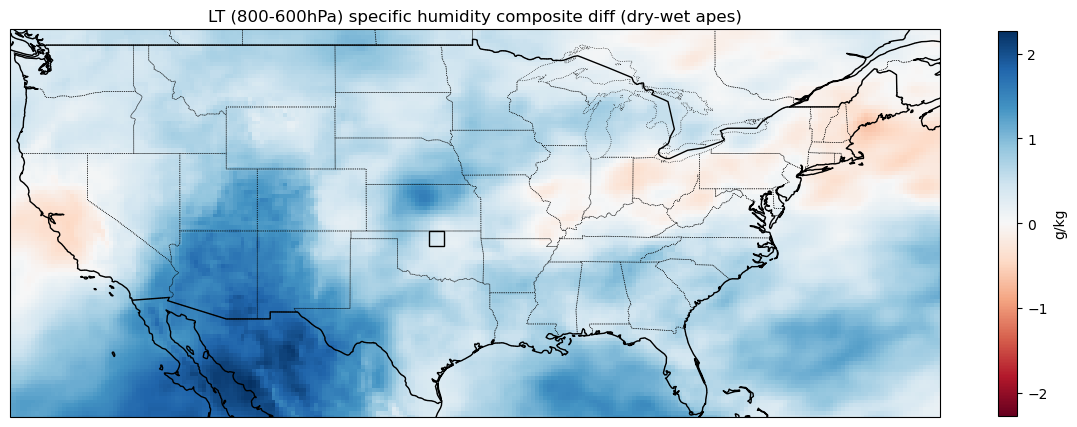

In [400]:
lon_mesh, lat_mesh = np.meshgrid(lon, lat)

# Set up the map projection and plot
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())  # US extent

global_max = max((abs(np.min(diffcomp)), abs(np.max(diffcomp))))

global_min = -global_max

norm = TwoSlopeNorm(vmin=global_min, vcenter=0, vmax=global_max)

# Plot the data
c = ax.pcolormesh(lon_mesh, lat_mesh, diffcomp, cmap='RdBu', norm=norm, transform=ccrs.PlateCarree())

# Add features (US state lines, coastlines, borders)
ax.add_feature(cfeature.BORDERS, linewidth=1)

ax.add_feature(cfeature.COASTLINE, linewidth=1)

ax.add_feature(cfeature.STATES, linestyle=':', linewidth=0.5)

sgp_box = Rectangle((sgp_lon_min, sgp_lat_min), sgp_lon_max - sgp_lon_min, 
                     sgp_lat_max - sgp_lat_min, edgecolor='black', 
                     facecolor='none', linewidth=1, transform=ccrs.PlateCarree())

ax.add_patch(sgp_box)

# Add color bar
cb = plt.colorbar(c, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)

cb.set_label('g/kg')

plt.title("LT (800-600hPa) specific humidity composite diff (dry-wet apes)")

# fig.text(0.45, 0.2, 'Caption: 800-600hPa averaged q (g/kg) for composite dry apes - wet apes', ha='center', fontsize=8)
# Show the plot
plt.show()


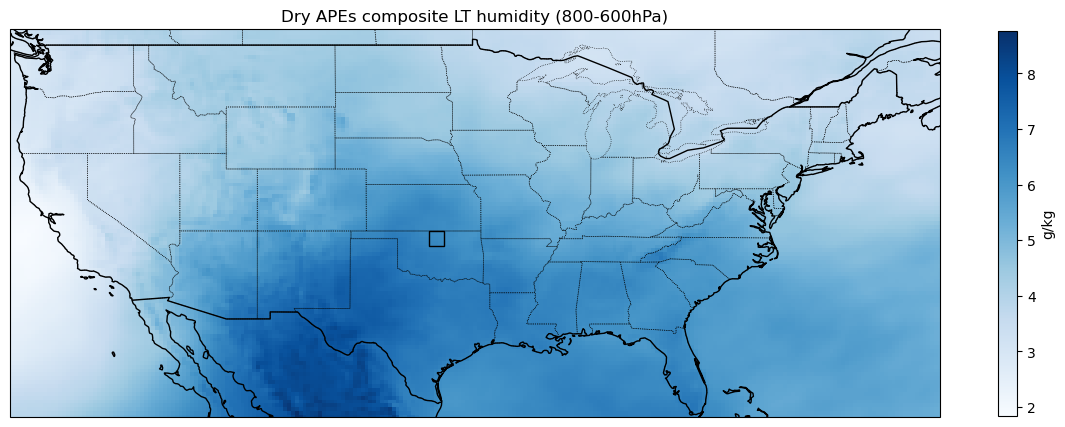

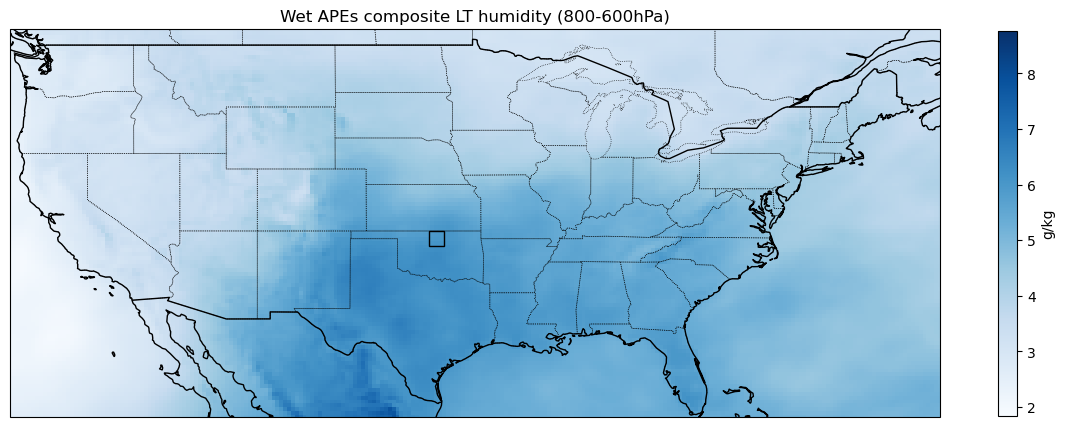

In [401]:
ltdfs = {'Dry APEs composite LT humidity': drycomp,
         
         'Wet APEs composite LT humidity': wetcomp}

global_min = min(np.min(df) for df in ltdfs.values())

global_max = max(np.max(df) for df in ltdfs.values())

# Create a Normalize object with global min and max
norm = Normalize(vmin=global_min, vmax=global_max)

for name, df in ltdfs.items(): 

    lon_mesh, lat_mesh = np.meshgrid(lon, lat)

    # Set up the map projection and plot
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())  # US extent

    global_max = max((abs(np.min(df)), abs(np.max(df))))

    global_min = -global_max 

    # Plot the data
    c = ax.pcolormesh(lon_mesh, lat_mesh, df, norm=norm, cmap='Blues', transform=ccrs.PlateCarree())

    # Add features (US state lines, coastlines, borders)
    ax.add_feature(cfeature.BORDERS, linewidth=1)

    ax.add_feature(cfeature.COASTLINE, linewidth=1)

    ax.add_feature(cfeature.STATES, linestyle=':', linewidth=0.5)
    
    sgp_box = Rectangle((sgp_lon_min, sgp_lat_min), sgp_lon_max - sgp_lon_min, 
                     sgp_lat_max - sgp_lat_min, edgecolor='black', 
                     facecolor='none', linewidth=1, transform=ccrs.PlateCarree())

    ax.add_patch(sgp_box)

    # Add color bar
    cb = plt.colorbar(c, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)

    cb.set_label('g/kg')

    plt.title("{} (800-600hPa)".format(name))

    # Show the plot
    plt.show()


## Composite split by precip threshold

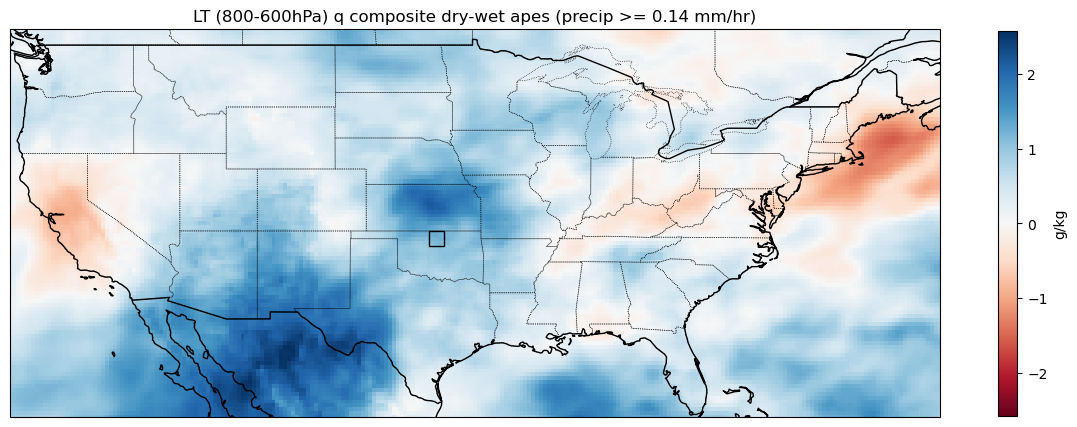

In [402]:
lon_mesh, lat_mesh = np.meshgrid(lon, lat)

# Set up the map projection and plot
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())  # US extent

global_max = max((abs(np.min(diffthresh)), abs(np.max(diffthresh))))

global_min = -global_max

norm = TwoSlopeNorm(vmin=global_min, vcenter=0, vmax=global_max)

# Plot the data
c = ax.pcolormesh(lon_mesh, lat_mesh, diffthresh, cmap='RdBu', norm=norm, transform=ccrs.PlateCarree())

# Add features (US state lines, coastlines, borders)
ax.add_feature(cfeature.BORDERS, linewidth=1)

ax.add_feature(cfeature.COASTLINE, linewidth=1)

ax.add_feature(cfeature.STATES, linestyle=':', linewidth=0.5)

sgp_box = Rectangle((sgp_lon_min, sgp_lat_min), sgp_lon_max - sgp_lon_min, 
                     sgp_lat_max - sgp_lat_min, edgecolor='black', 
                     facecolor='none', linewidth=1, transform=ccrs.PlateCarree())

ax.add_patch(sgp_box)

# Add color bar
cb = plt.colorbar(c, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)

cb.set_label('g/kg')

plt.title("LT (800-600hPa) q composite dry-wet apes (precip >= 0.14 mm/hr)")

# fig.text(0.45, 0.2, 'Caption: 800-600hPa averaged q (g/kg) for composite dry apes - wet apes', ha='center', fontsize=8)
# Show the plot
plt.show()

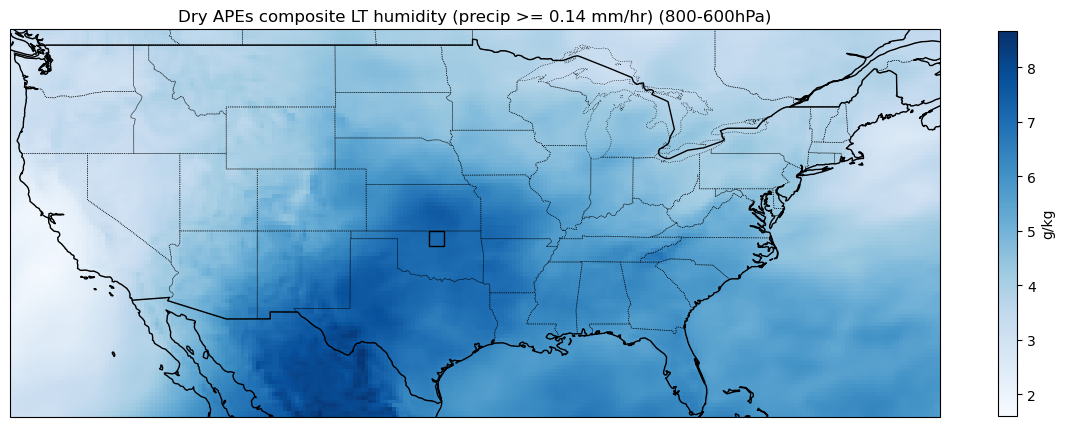

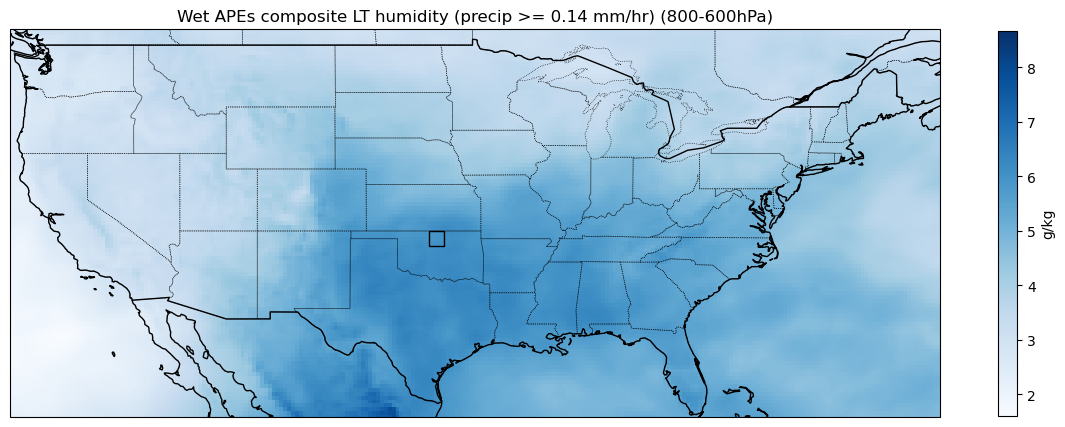

In [403]:
ltdfs = {'Dry APEs composite LT humidity (precip >= 0.14 mm/hr)': drytcomp,
         
         'Wet APEs composite LT humidity (precip >= 0.14 mm/hr)': wettcomp}

global_min = min(np.min(df) for df in ltdfs.values())

global_max = max(np.max(df) for df in ltdfs.values())

# Create a Normalize object with global min and max
norm = Normalize(vmin=global_min, vmax=global_max)

for name, df in ltdfs.items(): 

    lon_mesh, lat_mesh = np.meshgrid(lon, lat)

    # Set up the map projection and plot
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())  # US extent

    global_max = max((abs(np.min(df)), abs(np.max(df))))

    global_min = -global_max 

    # Plot the data
    c = ax.pcolormesh(lon_mesh, lat_mesh, df, norm=norm, cmap='Blues', transform=ccrs.PlateCarree())

    # Add features (US state lines, coastlines, borders)
    ax.add_feature(cfeature.BORDERS, linewidth=1)

    ax.add_feature(cfeature.COASTLINE, linewidth=1)

    ax.add_feature(cfeature.STATES, linestyle=':', linewidth=0.5)
    
    sgp_box = Rectangle((sgp_lon_min, sgp_lat_min), sgp_lon_max - sgp_lon_min, 
                     sgp_lat_max - sgp_lat_min, edgecolor='black', 
                     facecolor='none', linewidth=1, transform=ccrs.PlateCarree())

    ax.add_patch(sgp_box)

    # Add color bar
    cb = plt.colorbar(c, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)

    cb.set_label('g/kg')

    plt.title("{} (800-600hPa)".format(name))

    # Show the plot
    plt.show()
